Summer MGMT 59000: AI-Assisted Big Data Analytics in the Cloud
# Final Project: Strategic Analytics & AI-Driven Insights
## <u>Business Challenge:</u> **Option C: Education Investment Strategy**

* Client: $50M non-profit foundation
* Dataset: Global education metrics and outcomes
* Question: Where should we invest for maximum educational impact?

### <u>Role:</u> Operational Excellence Analyst
* Efficiency, processes, performance metrics


### Name: Michael Yudanin, myudanin@purdue.edu

In [3]:
task = """
We are working on the Education Investment Strategy
for a $50M non-profit foundation.
Our main question is: Where should we invest for maximum educational impact?
"""

In [4]:
role = """
You are an experienced Operational Excellence Analyst, and your main concerns are efficiency, processes, and performance metrics.
"""

In [ ]:
# --- Install Apache Beam and its dependencies in a single command ---
!pip install --upgrade pip
!pip install --upgrade dill
!pip install --upgrade google-cloud-bigquery
!pip install --quiet apache-beam[gcp]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires dill<0.3.9,>=0.3.0, but you have dill 0.4.0 which is incompatible.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'crcmod' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour cha

In [5]:
import requests
import pandas as pd
import json

import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Data Cleanup and Engineering

## PISA Education factors and outcomes dataset

We will be using the education factors and outcomes dataset built from the 2015, 2018, and 2022 datasets provided by the Programme for International Student Assessment (PISA) [link text](https://www.oecd.org/en/about/programmes/pisa.html). We combined the data for a varity of educational indicators into two BigQuery data tables. For the process of bulding the dataset, go to https://github.com/myudaninpu/Team_DN3_FinalProject/blob/main/Individual_Analyses/Operations_Analyst/Michael%20Yudanin_Final%20Project_DIVE%20Analysis.ipynb.

In [7]:
from google.colab import auth
from google.cloud import bigquery

# Authenticate your Google account
auth.authenticate_user()

PROJECT_ID = "mgmt599-dn3-final-project"
REGION = "us-central1"

BQ_DATASET = "edu"

client = bigquery.Client(project=PROJECT_ID)

## Data Quality

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [10]:
query = f"SELECT * FROM `{PROJECT_ID}.{BQ_DATASET}.pisa_data`"
df = pd.read_gbq(query, project_id=PROJECT_ID)
df.head()

CNT  CNTRYID   CNTSCHID   CYC  SC001Q01TA  SC013Q01TA  SC002Q01TA  \
0  ALB      8.0   800111.0  08MS         2.0         1.0       240.0   
1  ALB      8.0   800128.0  08MS         4.0         1.0       692.0   
2  QAZ     31.0  3100006.0  08MS         4.0         1.0      1261.0   
3  QAZ     31.0  3100018.0  08MS         2.0         1.0       521.0   
4  QAZ     31.0  3100040.0  08MS         2.0         1.0       117.0   

   SC002Q02TA  SC018Q01TA01  SC018Q01TA02  SC018Q02TA01  SC018Q02TA02  \
0       211.0          34.0           0.0          34.0           0.0   
1       353.0          59.0           NaN           4.0           NaN   
2      1057.0         115.0           NaN           NaN           NaN   
3       548.0          70.0          11.0           0.0           0.0   
4       119.0          23.0           NaN           0.0           NaN   

   SC012Q04TA  SC012Q05TA  SC012Q06TA  SC004Q05NA  SC004Q06NA  SC004Q07NA  \
0         2.0         2.0         2.0         0.0         2.0         1.0   
1         3.0         3.0         2.0         2.0        15.0         NaN   
2         3.0         3.0         2.0        30.0        53.0        49.0   
3         3.0         3.0         3.0        25.0        30.0        43.0   
4         NaN         NaN         1.0         5.0         5.0        29.0   

   SC037Q01TA  SC037Q02TA  SC037Q03TA  SC037Q04TA  SC037Q05NA  SC037Q06NA  \
0         1.0         1.0         2.0         3.0         3.0         2.0   
1         1.0         1.0         1.0         1.0         1.0         1.0   
2         2.0         3.0         2.0         3.0         2.0         2.0   
3         1.0         3.0         1.0         1.0         1.0         1.0   
4         1.0         3.0         1.0         2.0         2.0         1.0   

   SC037Q07TA  SC037Q08TA  SC037Q09TA  SC025Q01NA  SC017Q01NA  SC017Q02NA  \
0         2.0         2.0         2.0         7.0         1.0         1.0   
1         1.0         1.0         2.0         3.0         2.0         1.0   
2         2.0         NaN         2.0        27.0         3.0         2.0   
3         2.0         3.0         1.0        20.0         3.0         2.0   
4         2.0         2.0         2.0         0.0         4.0         3.0   

   SC017Q03NA  SC017Q04NA  SC017Q05NA  SC017Q06NA  SC017Q07NA  SC017Q08NA  \
0         2.0         1.0         4.0         4.0         1.0         1.0   
1         3.0         3.0         2.0         3.0         3.0         1.0   
2         NaN         NaN         NaN         3.0         2.0         2.0   
3         1.0         1.0         3.0         3.0         3.0         3.0   
4         1.0         1.0         3.0         1.0         1.0         1.0   

   SC061Q01TA  SC061Q02TA  SC061Q03TA  SC061Q04TA  SC061Q05TA  SC061Q06TA  \
0         2.0         1.0         2.0         2.0         2.0         2.0   
1         2.0         1.0         2.0         2.0         2.0         1.0   
2         1.0         2.0         3.0         1.0         3.0         2.0   
3         3.0         2.0         3.0         1.0         1.0         3.0   
4         3.0         3.0         1.0         1.0         1.0         1.0   

   SC061Q07TA  SC061Q08TA  SC061Q09TA  SC061Q10TA  SC064Q01TA  SC064Q02TA  \
0         2.0         2.0         1.0         1.0        65.0        49.0   
1         2.0         2.0         3.0         2.0        55.0        81.0   
2         2.0         2.0         3.0         2.0        24.0        44.0   
3         3.0         3.0         2.0         1.0        30.0        20.0   
4         1.0         1.0         1.0         1.0         NaN         NaN   

   SC064Q04NA  SC064Q03TA  SC003Q01TA  SC053Q01TA  SC053Q02TA  SC053Q03TA  \
0        25.0        74.0         4.0         NaN         NaN         NaN   
1        32.0        30.0         4.0         NaN         NaN         NaN   
2        38.0        15.0         4.0         NaN         NaN         NaN   
3        50.0        80.0         3.0        

In [9]:
query = f"SELECT * FROM `{PROJECT_ID}.{BQ_DATASET}.pisa_codebooks`"
codebooks_df = pd.read_gbq(query, project_id=PROJECT_ID)
codebooks_df.head()

field_id  \
0    CLSIZE   
1       CNT   
2   CNTRYID   
3  CNTSCHID   
4  CREACTIV   

                                                                                                                                                      field_name  \
0                                                                                     2015: Class Size; 2018: Class Size; 2022: Class size (test language class)   
1                                                                                                                                       Country code 3-character   
2                                                                                                                                             Country Identifier   
3                                                                                                                                                Intl. School ID   
4  2015: Creative extra-curricular activities (Sum); 2018: Creative extra-curricular activities (Sum); 2022: Creative extra-curricular activities (3 activities)   

   if_found_in_codebook                      source  
0                  True  codebooks 2015, 2018, 2022  
1                  True  codebooks 2015, 2018, 2022  
2                  True  codebooks 2015, 2018, 2022  
3                  True  codebooks 2015, 2018, 2022  
4                  True  codebooks 2015, 2018, 2022

In [10]:
# Enhance categories_df:
field_type = """
CLSIZE:numeric
CNT:categorical
CNTRYID:categorical
CNTSCHID:categorical
CREACTIV:ordinal
CYC:categorical
EDUSHORT:numeric
PROATCE:proportion
RATCMP1:numeric
RATCMP2:proportion
SC001Q01TA:ordinal
SC002Q01TA:numeric
SC002Q02TA:numeric
SC003Q01TA:categorical
SC004Q05NA:numeric
SC004Q06NA:numeric
SC004Q07NA:numeric
SC012Q04TA:ordinal
SC012Q05TA:ordinal
SC012Q06TA:ordinal
SC013Q01TA:categorical
SC017Q01NA:ordinal
SC017Q02NA:ordinal
SC017Q03NA:ordinal
SC017Q04NA:ordinal
SC017Q05NA:ordinal
SC017Q06NA:ordinal
SC017Q07NA:ordinal
SC017Q08NA:ordinal
SC018Q01TA01:numeric
SC018Q01TA02:numeric
SC018Q02TA01:numeric
SC018Q02TA02:numeric
SC025Q01NA:percentage
SC037Q01TA:categorical
SC037Q02TA:categorical
SC037Q03TA:categorical
SC037Q04TA:categorical
SC037Q05NA:categorical
SC037Q06NA:categorical
SC037Q07TA:categorical
SC037Q08TA:categorical
SC037Q09TA:categorical
SC042Q01TA:categorical
SC042Q02TA:categorical
SC053Q01TA:categorical
SC053Q02TA:categorical
SC053Q03TA:categorical
SC053Q04TA:categorical
SC053Q09TA:categorical
SC053Q10TA:categorical
SC061Q01TA:ordinal
SC061Q02TA:ordinal
SC061Q03TA:ordinal
SC061Q04TA:ordinal
SC061Q05TA:ordinal
SC061Q06TA:ordinal
SC061Q07TA:ordinal
SC061Q08TA:ordinal
SC061Q09TA:ordinal
SC061Q10TA:ordinal
SC064Q01TA:percentage
SC064Q02TA:percentage
SC064Q03TA:percentage
SC064Q04NA:percentage
SCHSIZE:numeric
STAFFSHORT:numeric
STRATIO:percentage
STUBEHA:numeric
TEACHBEHA:numeric
TOTAT:numeric
math:numeric
read:numeric
sci:numeric
year:categorical
"""

In [11]:
# Turn field_type into a dataframe
field_type_df = pd.DataFrame([line.split(':') for line in field_type.strip().split('\n')],
                            columns=['field_id', 'field_type'])

# Join dataframes
codebooks_df = codebooks_df.merge(field_type_df, on='field_id', how='left')

In [12]:
codebooks_df.head()

field_id  \
0    CLSIZE   
1       CNT   
2   CNTRYID   
3  CNTSCHID   
4  CREACTIV   

                                                                                                                                                      field_name  \
0                                                                                     2015: Class Size; 2018: Class Size; 2022: Class size (test language class)   
1                                                                                                                                       Country code 3-character   
2                                                                                                                                             Country Identifier   
3                                                                                                                                                Intl. School ID   
4  2015: Creative extra-curricular activities (Sum); 2018: Creative extra-curricular activities (Sum); 2022: Creative extra-curricular activities (3 activities)   

   if_found_in_codebook                      source   field_type  
0                  True  codebooks 2015, 2018, 2022      numeric  
1                  True  codebooks 2015, 2018, 2022  categorical  
2                  True  codebooks 2015, 2018, 2022  categorical  
3                  True  codebooks 2015, 2018, 2022  categorical  
4                  True  codebooks 2015, 2018, 2022      ordinal

### Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def comprehensive_data_quality_analysis(df, categories_df):
    """
    Comprehensive data quality analysis for PISA dataset with field type awareness
    Prints results AND returns detailed analysis as a string for external processing

    Parameters:
    df: pandas DataFrame - the PISA dataset
    categories_df: pandas DataFrame - contains field descriptions with columns 'field_id', 'field_name', and 'field_type'
    """

    # Create field name and type lookup dictionaries
    field_lookup = {}
    field_type_lookup = {}

    if categories_df is not None and 'field_id' in categories_df.columns:
        if 'field_name' in categories_df.columns:
            field_lookup = dict(zip(categories_df['field_id'], categories_df['field_name']))
        elif 'description' in categories_df.columns:
            field_lookup = dict(zip(categories_df['field_id'], categories_df['description']))

        if 'field_type' in categories_df.columns:
            field_type_lookup = dict(zip(categories_df['field_id'], categories_df['field_type']))

    def get_field_display_name(field_id):
        """Helper function to get field display name with type"""
        base_name = field_lookup.get(field_id, field_id)
        field_type = field_type_lookup.get(field_id, 'unknown')
        if field_id in field_lookup:
            return f"{field_id} ({base_name}) [{field_type}]"
        else:
            return f"{field_id} [{field_type}]"

    def get_field_type(field_id):
        """Helper function to get field type"""
        return field_type_lookup.get(field_id, 'unknown')

    # Categorize fields by type based on categories_df
    numeric_fields = [col for col in df.columns if get_field_type(col) == 'numeric']
    categorical_fields = [col for col in df.columns if get_field_type(col) == 'categorical']
    ordinal_fields = [col for col in df.columns if get_field_type(col) == 'ordinal']
    percentage_fields = [col for col in df.columns if get_field_type(col) == 'percentage']
    proportion_fields = [col for col in df.columns if get_field_type(col) in ['proportion', 'proprotion']]  # Handle typo in original data
    unknown_fields = [col for col in df.columns if get_field_type(col) == 'unknown']

    # Initialize output string
    output = []

    def add_and_print(text):
        """Helper function to both print and add to output string"""
        print(text)
        output.append(text)

    add_and_print("=" * 80)
    add_and_print("PISA DATASET DATA QUALITY ANALYSIS (FIELD TYPE-AWARE)")
    add_and_print("=" * 80)

    # Basic Dataset Information
    add_and_print("\n1. BASIC DATASET INFORMATION")
    add_and_print("-" * 40)
    add_and_print(f"Dataset Shape: {df.shape}")
    add_and_print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    add_and_print(f"Number of Variables: {len(df.columns)}")
    add_and_print(f"Number of Observations: {len(df)}")

    # Field Type Distribution
    add_and_print("\n2. FIELD TYPE DISTRIBUTION")
    add_and_print("-" * 40)
    add_and_print(f"Numeric fields: {len(numeric_fields)}")
    add_and_print(f"Categorical fields: {len(categorical_fields)}")
    add_and_print(f"Ordinal fields: {len(ordinal_fields)}")
    add_and_print(f"Percentage fields: {len(percentage_fields)}")
    add_and_print(f"Proportion fields: {len(proportion_fields)}")
    if unknown_fields:
        add_and_print(f"Unknown type fields: {len(unknown_fields)} - {unknown_fields[:5]}{'...' if len(unknown_fields) > 5 else ''}")

    # Missing Data Analysis
    add_and_print("\n3. MISSING DATA ANALYSIS")
    add_and_print("-" * 40)
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_summary = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Percentage': missing_percent.values
    }).sort_values('Missing_Percentage', ascending=False)

    # Add field types to missing summary
    missing_summary['Field_Type'] = missing_summary['Column'].apply(get_field_type)

    # Show columns with missing data
    columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]
    add_and_print(f"Columns with missing data: {len(columns_with_missing)} out of {len(df.columns)}")

    if len(columns_with_missing) > 0:
        add_and_print("\nTop 20 columns with highest missing data percentage:")
        missing_display = columns_with_missing.head(20).copy()
        missing_display['Column_Display'] = missing_display['Column'].apply(get_field_display_name)
        missing_display_output = missing_display[['Column_Display', 'Missing_Count', 'Missing_Percentage']].to_string(index=False)
        add_and_print(missing_display_output)

    # Missing data by field type
    add_and_print("\nMissing Data by Field Type:")
    for field_type, fields in [('numeric', numeric_fields), ('categorical', categorical_fields),
                              ('ordinal', ordinal_fields), ('percentage', percentage_fields),
                              ('proportion', proportion_fields)]:
        if fields:
            type_missing = missing_summary[missing_summary['Column'].isin(fields)]
            if len(type_missing) > 0:
                avg_missing = type_missing['Missing_Percentage'].mean()
                max_missing = type_missing['Missing_Percentage'].max()
                min_missing = type_missing['Missing_Percentage'].min()
                add_and_print(f"- {field_type.capitalize()}: {avg_missing:.1f}% avg (range: {min_missing:.1f}%-{max_missing:.1f}%)")

    # Completeness by severity
    add_and_print(f"\nMissing Data Severity:")
    add_and_print(f"- Complete columns (0% missing): {len(missing_summary[missing_summary['Missing_Percentage'] == 0])}")
    add_and_print(f"- Low missing (0-5%): {len(missing_summary[(missing_summary['Missing_Percentage'] > 0) & (missing_summary['Missing_Percentage'] <= 5)])}")
    add_and_print(f"- Moderate missing (5-20%): {len(missing_summary[(missing_summary['Missing_Percentage'] > 5) & (missing_summary['Missing_Percentage'] <= 20)])}")
    add_and_print(f"- High missing (20-50%): {len(missing_summary[(missing_summary['Missing_Percentage'] > 20) & (missing_summary['Missing_Percentage'] <= 50)])}")
    add_and_print(f"- Critical missing (>50%): {len(missing_summary[missing_summary['Missing_Percentage'] > 50])}")

    # Duplicate Analysis
    add_and_print("\n4. DUPLICATE ANALYSIS")
    add_and_print("-" * 40)
    total_duplicates = df.duplicated().sum()
    add_and_print(f"Total duplicate rows: {total_duplicates}")
    add_and_print(f"Duplicate percentage: {(total_duplicates / len(df)) * 100:.2f}%")

    # Check for duplicates based on key identifiers
    key_identifiers = [col for col in ['CNT', 'CNTSCHID', 'year'] if col in df.columns]
    if len(key_identifiers) >= 2:
        key_duplicates = df.duplicated(subset=key_identifiers).sum()
        add_and_print(f"Duplicate key combinations ({', '.join(key_identifiers)}): {key_duplicates}")

    # Numerical Variables Analysis
    add_and_print("\n5. NUMERICAL VARIABLES ANALYSIS")
    add_and_print("-" * 40)
    add_and_print(f"Number of numerical fields: {len(numeric_fields)}")

    if len(numeric_fields) > 0:
        # Basic statistics
        numeric_stats = df[numeric_fields].describe()
        add_and_print("\nBasic Statistics (first 10 numerical fields):")
        stats_display = numeric_stats.iloc[:, :min(10, len(numeric_fields))].round(2)
        stats_display.columns = [get_field_display_name(col) for col in stats_display.columns]
        add_and_print(str(stats_display))

        # Outlier detection using IQR method
        add_and_print("\nOutlier Analysis (using IQR method) - Top 10 fields:")
        outlier_summary = []

        for col in numeric_fields:
            if col in df.columns:
                data_clean = df[col].dropna()
                if len(data_clean) > 0:
                    Q1 = data_clean.quantile(0.25)
                    Q3 = data_clean.quantile(0.75)
                    IQR = Q3 - Q1
                    if IQR > 0:
                        lower_bound = Q1 - 1.5 * IQR
                        upper_bound = Q3 + 1.5 * IQR

                        outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
                        outlier_count = len(outliers)
                        outlier_percentage = (outlier_count / len(data_clean)) * 100

                        outlier_summary.append({
                            'Column': get_field_display_name(col),
                            'Outlier_Count': outlier_count,
                            'Outlier_Percentage': outlier_percentage,
                            'Lower_Bound': lower_bound,
                            'Upper_Bound': upper_bound
                        })

        if outlier_summary:
            outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Percentage', ascending=False)
            add_and_print(outlier_df.head(10).round(2).to_string(index=False))

    # Categorical Variables Analysis
    add_and_print("\n6. CATEGORICAL VARIABLES ANALYSIS")
    add_and_print("-" * 40)
    add_and_print(f"Number of categorical fields: {len(categorical_fields)}")

    if len(categorical_fields) > 0:
        add_and_print("\nCategorical Variables Summary:")
        for col in categorical_fields[:15]:
            if col in df.columns:
                unique_count = df[col].nunique()
                most_frequent = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'
                total_count = df[col].count()
                add_and_print(f"- {get_field_display_name(col)}: {unique_count} unique values, most frequent: '{most_frequent}' ({total_count} non-null)")

    # Ordinal Variables Analysis
    add_and_print("\n7. ORDINAL VARIABLES ANALYSIS")
    add_and_print("-" * 40)
    add_and_print(f"Number of ordinal fields: {len(ordinal_fields)}")

    if len(ordinal_fields) > 0:
        add_and_print("\nOrdinal Variables Summary:")
        for col in ordinal_fields[:15]:
            if col in df.columns:
                unique_count = df[col].nunique()
                try:
                    min_val = df[col].min()
                    max_val = df[col].max()
                    value_range = f"{min_val} to {max_val}"
                except:
                    value_range = "Mixed types"
                total_count = df[col].count()
                add_and_print(f"- {get_field_display_name(col)}: {unique_count} levels, range: {value_range} ({total_count} non-null)")

    # Data Consistency Checks by Field Type
    add_and_print("\n8. DATA CONSISTENCY CHECKS BY FIELD TYPE")
    add_and_print("-" * 40)

    consistency_issues = []

    # Check numeric fields for negative values where inappropriate
    add_and_print("Checking numeric fields for data integrity...")
    for col in numeric_fields:
        if col in df.columns:
            # Check for negative values in fields that should be positive
            if col in ['SCHSIZE', 'TOTAT', 'SC002Q01TA', 'SC002Q02TA', 'SC018Q01TA01', 'SC018Q01TA02', 'math', 'read', 'sci']:
                negative_count = (df[col] < 0).sum()
                if negative_count > 0:
                    consistency_issues.append(f"{get_field_display_name(col)}: {negative_count} negative values (unexpected)")

            # Check for extreme outliers (beyond 6 standard deviations)
            data_clean = df[col].dropna()
            if len(data_clean) > 0:
                mean_val = data_clean.mean()
                std_val = data_clean.std()
                if std_val > 0:
                    extreme_outliers = len(data_clean[abs(data_clean - mean_val) > 6 * std_val])
                    if extreme_outliers > 0:
                        consistency_issues.append(f"{get_field_display_name(col)}: {extreme_outliers} extreme outliers (>6σ)")

    # Check percentage fields (should be 0-100)
    add_and_print("Checking percentage fields for valid ranges...")
    for col in percentage_fields:
        if col in df.columns:
            out_of_range = ((df[col] < 0) | (df[col] > 100)).sum()
            if out_of_range > 0:
                consistency_issues.append(f"{get_field_display_name(col)}: {out_of_range} values outside 0-100 range")

    # Check proportion fields (should be 0-1)
    add_and_print("Checking proportion fields for valid ranges...")
    for col in proportion_fields:
        if col in df.columns:
            out_of_range = ((df[col] < 0) | (df[col] > 1)).sum()
            if out_of_range > 0:
                consistency_issues.append(f"{get_field_display_name(col)}: {out_of_range} values outside 0-1 range")

    # Check ordinal fields for unexpected values
    add_and_print("Checking ordinal fields for consistency...")
    for col in ordinal_fields:
        if col in df.columns:
            unique_vals = df[col].dropna().unique()
            # Check if ordinal field has too many unique values (might indicate data entry errors)
            if len(unique_vals) > 20:
                consistency_issues.append(f"{get_field_display_name(col)}: {len(unique_vals)} unique values (unusually high for ordinal)")

    # Check test scores (PISA scores typically 200-800)
    test_cols = ['math', 'read', 'sci']
    add_and_print("Checking test scores for realistic ranges...")
    for col in test_cols:
        if col in df.columns:
            unrealistic_scores = ((df[col] < 100) | (df[col] > 900)).sum()
            if unrealistic_scores > 0:
                consistency_issues.append(f"{get_field_display_name(col)}: {unrealistic_scores} unrealistic test scores (outside 100-900)")

    if consistency_issues:
        add_and_print("\nPotential consistency issues found:")
        for issue in consistency_issues:
            add_and_print(f"- {issue}")
    else:
        add_and_print("\nNo major consistency issues detected in key variables.")

    # Temporal Analysis
    add_and_print("\n9. TEMPORAL ANALYSIS")
    add_and_print("-" * 40)
    if 'year' in df.columns:
        year_dist = df['year'].value_counts().sort_index()
        add_and_print("Distribution by year:")
        for year, count in year_dist.items():
            percentage = (count/len(df)*100)
            add_and_print(f"- {year}: {count} observations ({percentage:.1f}%)")

        # Check for expected PISA cycles
        expected_years = [2015, 2018, 2022]
        missing_years = [year for year in expected_years if year not in df['year'].unique()]
        if missing_years:
            add_and_print(f"Missing expected PISA cycles: {missing_years}")

        # Analyze data quality by year
        add_and_print("\nData completeness by year:")
        for year in sorted(df['year'].unique()):
            year_data = df[df['year'] == year]
            year_completeness = ((year_data.count().sum()) / (len(year_data) * len(year_data.columns))) * 100
            add_and_print(f"- {year}: {year_completeness:.1f}% complete")

    # Country Coverage Analysis
    add_and_print("\n10. COUNTRY COVERAGE ANALYSIS")
    add_and_print("-" * 40)
    if 'CNT' in df.columns:
        country_count = df['CNT'].nunique()
        add_and_print(f"Number of countries/territories: {country_count}")

        country_dist = df['CNT'].value_counts()
        add_and_print(f"\nTop 10 countries by number of schools:")
        for i, (country, count) in enumerate(country_dist.head(10).items()):
            percentage = (count/len(df)*100)
            add_and_print(f"{i+1:2d}. {country}: {count} schools ({percentage:.1f}%)")

        # Check for countries with very few schools
        low_representation = country_dist[country_dist < 10]
        if len(low_representation) > 0:
            add_and_print(f"\nCountries with fewer than 10 schools: {len(low_representation)}")
            add_and_print("Countries with low representation:")
            for country, count in low_representation.items():
                add_and_print(f"- {country}: {count} schools")

    # Field Type-Specific Missing Data Analysis
    add_and_print("\n11. DETAILED MISSING DATA BY FIELD TYPE")
    add_and_print("-" * 40)

    field_type_groups = {
        'Numeric_Fields': numeric_fields,
        'Categorical_Fields': categorical_fields,
        'Ordinal_Fields': ordinal_fields,
        'Percentage_Fields': percentage_fields,
        'Proportion_Fields': proportion_fields
    }

    for group_name, columns in field_type_groups.items():
        if columns:
            group_missing = missing_summary[missing_summary['Column'].isin(columns)]
            if len(group_missing) > 0:
                avg_missing = group_missing['Missing_Percentage'].mean()
                add_and_print(f"\n{group_name} - Average Missing: {avg_missing:.1f}%")
                # Show top 5 most missing in each category
                for _, row in group_missing.head(5).iterrows():
                    add_and_print(f"  {get_field_display_name(row['Column'])}: {row['Missing_Percentage']:.1f}% missing")

    # Data Quality Issues Summary
    add_and_print("\n12. CRITICAL DATA QUALITY ISSUES SUMMARY")
    add_and_print("-" * 40)

    critical_issues = []

    # High missing data columns
    high_missing = missing_summary[missing_summary['Missing_Percentage'] > 20]
    if len(high_missing) > 0:
        critical_issues.append(f"HIGH MISSING DATA: {len(high_missing)} columns have >20% missing data")
        for _, row in high_missing.head(5).iterrows():
            critical_issues.append(f"  - {get_field_display_name(row['Column'])}: {row['Missing_Percentage']:.1f}% missing")

    # Consistency issues
    if consistency_issues:
        critical_issues.append(f"CONSISTENCY ISSUES: {len(consistency_issues)} issues detected")
        for issue in consistency_issues[:5]:
            critical_issues.append(f"  - {issue}")

    # Duplicate issues
    if total_duplicates > 0:
        critical_issues.append(f"DUPLICATE DATA: {total_duplicates} duplicate rows found")

    # Missing key variables
    key_vars = ['CNT', 'CNTSCHID', 'year', 'math', 'read', 'sci']
    missing_key_vars = [var for var in key_vars if var not in df.columns or df[var].isnull().sum() > 0]
    if missing_key_vars:
        critical_issues.append(f"MISSING KEY VARIABLES: Issues with {missing_key_vars}")

    # Field type coverage issues
    if unknown_fields:
        critical_issues.append(f"UNKNOWN FIELD TYPES: {len(unknown_fields)} fields have unknown types")

    if critical_issues:
        for issue in critical_issues:
            add_and_print(issue)
    else:
        add_and_print("No critical data quality issues identified.")

    # Key Performance Indicators
    add_and_print("\n13. DATA QUALITY SUMMARY")
    add_and_print("-" * 40)
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    completeness_rate = ((total_cells - missing_cells) / total_cells) * 100

    add_and_print(f"Overall Data Completeness: {completeness_rate:.2f}%")
    add_and_print(f"Total Missing Cells: {missing_cells:,} out of {total_cells:,}")
    add_and_print(f"Field Type Coverage: {len(df.columns) - len(unknown_fields)}/{len(df.columns)} fields have defined types")

    # Enhanced Data Quality Score considering field types
    score = 100
    score -= min(20, (missing_cells / total_cells) * 100 * 2)  # Penalize missing data
    score -= min(10, total_duplicates / len(df) * 100 * 5)     # Penalize duplicates
    score -= min(15, len(consistency_issues) * 2)              # Enhanced penalty for consistency issues
    score -= min(5, len(unknown_fields) / len(df.columns) * 100)  # Penalize unknown field types

    # Additional penalties for field type violations
    type_violation_penalty = 0
    if percentage_fields:
        for col in percentage_fields:
            if col in df.columns:
                violations = ((df[col] < 0) | (df[col] > 100)).sum()
                type_violation_penalty += violations

    if proportion_fields:
        for col in proportion_fields:
            if col in df.columns:
                violations = ((df[col] < 0) | (df[col] > 1)).sum()
                type_violation_penalty += violations

    score -= min(10, (type_violation_penalty / len(df)) * 100)

    add_and_print(f"\nData Quality Score: {max(0, score):.1f}/100")

    quality_rating = "Excellent" if score >= 90 else "Good" if score >= 75 else "Fair" if score >= 60 else "Poor"
    add_and_print(f"Data Quality Rating: {quality_rating}")

    # Enhanced Recommendations section
    add_and_print("\n14. FIELD TYPE-AWARE RECOMMENDATIONS")
    add_and_print("-" * 40)
    recommendations = []

    if completeness_rate < 90:
        recommendations.append("PRIORITY: Address missing data issues - overall completeness below 90%")

    if len(high_missing) > 5:
        recommendations.append("PRIORITY: Consider removing or imputing variables with >20% missing data")

    if total_duplicates > 0:
        recommendations.append("MEDIUM: Remove duplicate observations to ensure data integrity")

    if consistency_issues:
        recommendations.append("MEDIUM: Investigate and resolve data consistency issues by field type")

    # Field type specific recommendations
    if percentage_fields:
        pct_issues = [col for col in percentage_fields if col in df.columns and ((df[col] < 0) | (df[col] > 100)).any()]
        if pct_issues:
            recommendations.append(f"MEDIUM: Fix percentage fields with out-of-range values: {pct_issues[:3]}")

    if proportion_fields:
        prop_issues = [col for col in proportion_fields if col in df.columns and ((df[col] < 0) | (df[col] > 1)).any()]
        if prop_issues:
            recommendations.append(f"MEDIUM: Fix proportion fields with out-of-range values: {prop_issues[:3]}")

    if unknown_fields:
        recommendations.append(f"LOW: Define field types for {len(unknown_fields)} unknown fields")

    if 'year' in df.columns and len(df['year'].unique()) < 3:
        recommendations.append("LOW: Consider collecting data from additional PISA cycles for temporal analysis")

    if recommendations:
        for i, rec in enumerate(recommendations, 1):
            add_and_print(f"{i}. {rec}")
    else:
        add_and_print("Data quality appears satisfactory - no major issues requiring immediate attention")

    add_and_print("\n" + "=" * 80)

    # Return both the string output and structured results
    result_string = "\n".join(output)

    structured_results = {
        'missing_summary': missing_summary,
        'outlier_summary': outlier_df if 'outlier_df' in locals() else None,
        'consistency_issues': consistency_issues,
        'completeness_rate': completeness_rate,
        'quality_score': max(0, score),
        'critical_issues': critical_issues,
        'recommendations': recommendations,
        'field_type_summary': {
            'numeric': len(numeric_fields),
            'categorical': len(categorical_fields),
            'ordinal': len(ordinal_fields),
            'percentage': len(percentage_fields),
            'proportion': len(proportion_fields),
            'unknown': len(unknown_fields)
        },
        'field_types': {
            'numeric_fields': numeric_fields,
            'categorical_fields': categorical_fields,
            'ordinal_fields': ordinal_fields,
            'percentage_fields': percentage_fields,
            'proportion_fields': proportion_fields,
            'unknown_fields': unknown_fields
        }
    }

    return result_string, structured_results




In [14]:
analysis_string, structured_results = comprehensive_data_quality_analysis(df, codebooks_df)

print(f"Quality Score: {structured_results['quality_score']}")
print(f"Completeness: {structured_results['completeness_rate']:.1f}%")

PISA DATASET DATA QUALITY ANALYSIS (FIELD TYPE-AWARE)

1. BASIC DATASET INFORMATION
----------------------------------------
Dataset Shape: (54212, 75)
Memory Usage: 36.50 MB
Number of Variables: 75
Number of Observations: 54212

2. FIELD TYPE DISTRIBUTION
----------------------------------------
Numeric fields: 20
Categorical fields: 24
Ordinal fields: 23
Percentage fields: 6
Proportion fields: 2

3. MISSING DATA ANALYSIS
----------------------------------------
Columns with missing data: 70 out of 75

Top 20 columns with highest missing data percentage:
                                                                                                                                                                                                                                                                                                                                                                                                                                 Column_Display  Missi

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap # Import the textwrap module for automatic text wrapping

def create_data_quality_visualizations(df, results, categories_df=None):
    """
    Create visualizations for data quality analysis with field type awareness
    All charts have 1px gray borders
    """

    # Create field name and type lookup dictionaries
    field_lookup = {}
    field_type_lookup = {}

    if categories_df is not None and 'field_id' in categories_df.columns:
        if 'field_name' in categories_df.columns:
            field_lookup = dict(zip(categories_df['field_id'], categories_df['field_name']))
        elif 'description' in categories_df.columns:
            field_lookup = dict(zip(categories_df['field_id'], categories_df['description']))

        if 'field_type' in categories_df.columns:
            field_type_lookup = dict(zip(categories_df['field_id'], categories_df['field_type']))

    def get_field_display_parts(field_id):
        """Helper function to get field display name with character-based wrapping."""
        if field_id in field_lookup:
            # Get the descriptive text
            description = field_lookup[field_id]
            # Use textwrap to wrap the description for a more readable title
            wrapped_description = textwrap.fill(description, width=50)
            return field_id, wrapped_description
        return field_id, ""

    # Create main dashboard with 2x3 layout
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('PISA Dataset Data Quality Dashboard', fontsize=16, fontweight='bold')

    # Add gray borders to all subplots
    for ax in axes.flat:
        for spine in ax.spines.values():
            spine.set_linewidth(1)
            spine.set_color('gray')

    # 1. Missing Data Heatmap (top 20 columns) - SIMPLIFIED
    missing_cols = results['missing_summary'][results['missing_summary']['Missing_Count'] > 0].head(20)
    if len(missing_cols) > 0:
        missing_data = df[missing_cols['Column']].isnull()
        # Use just field IDs, no descriptions
        field_ids = [col for col in missing_cols['Column']]
        sns.heatmap(missing_data.T, cbar=True, ax=axes[0,0], cmap='Reds',
                   yticklabels=field_ids, xticklabels=False,
                   cbar_kws={'label': 'Missing Data'})
        axes[0,0].set_title('Missing Data Pattern (Top 20 Columns)', fontweight='bold')
        axes[0,0].set_xlabel('Observations')
        axes[0,0].tick_params(axis='y', labelsize=8)


    # 2. Quality Score Gauge
    score = results['quality_score']
    # Create a more robust pie chart
    sizes = [score, 100-score]
    colors = ['lightblue', 'lightgray']
    explode = (0.05, 0)  # explode the score slice

    wedges, texts = axes[1,1].pie(sizes, labels=['', ''], colors=colors,
                                 startangle=90, explode=explode,
                                 wedgeprops=dict(width=0.3, edgecolor='gray', linewidth=1))

    # Add text in center
    axes[1,1].text(0, 0.1, f'{score:.1f}', ha='center', va='center',
                   fontsize=20, fontweight='bold')
    axes[1,1].text(0, -0.15, 'Quality Score', ha='center', va='center',
                   fontsize=10, fontweight='bold')
    axes[1,1].set_title('Overall Data Quality Score', fontweight='bold')

    # Ensure the pie chart is circular
    axes[1,1].set_aspect('equal')



    # 3. Field Type Distribution
    if 'field_type_summary' in results:
        field_types = list(results['field_type_summary'].keys())
        counts = list(results['field_type_summary'].values())
        colors = ['steelblue', 'orange', 'green', 'red', 'purple', 'brown']

        bars = axes[0,2].bar(field_types, counts, color=colors[:len(field_types)],
                            alpha=0.7, edgecolor='gray', linewidth=1)
        axes[0,2].set_title('Field Type Distribution', fontweight='bold')
        axes[0,2].set_ylabel('Number of Fields')
        axes[0,2].tick_params(axis='x', rotation=45)
        axes[0,2].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                          f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    # 4. Completeness by Category
    categories = ['Complete\n(0%)', 'Low\n(0-5%)', 'Moderate\n(5-20%)', 'High\n(20-50%)', 'Critical\n(>50%)']
    complete = len(results['missing_summary'][results['missing_summary']['Missing_Percentage'] == 0])
    low = len(results['missing_summary'][(results['missing_summary']['Missing_Percentage'] > 0) &
                                       (results['missing_summary']['Missing_Percentage'] <= 5)])
    moderate = len(results['missing_summary'][(results['missing_summary']['Missing_Percentage'] > 5) &
                                            (results['missing_summary']['Missing_Percentage'] <= 20)])
    high = len(results['missing_summary'][(results['missing_summary']['Missing_Percentage'] > 20) &
                                        (results['missing_summary']['Missing_Percentage'] <= 50)])
    critical = len(results['missing_summary'][results['missing_summary']['Missing_Percentage'] > 50])

    counts = [complete, low, moderate, high, critical]
    colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

    bars = axes[1,0].bar(categories, counts, color=colors, alpha=0.7,
                        edgecolor='gray', linewidth=1)
    axes[1,0].set_title('Data Completeness Categories', fontweight='bold')
    axes[1,0].set_ylabel('Number of Columns')
    axes[1,0].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{int(height)}', ha='center', va='bottom', fontweight='bold')



    # 6. Missing Data by Field Type
    if categories_df is not None and 'field_type' in categories_df.columns:
        field_types = ['numeric', 'categorical', 'ordinal', 'percentage', 'proportion']
        missing_by_type = []

        for field_type in field_types:
            # Handle typo in original data
            type_variants = [field_type]
            if field_type == 'proportion':
                type_variants.append('proprotion')

            type_fields = []
            for variant in type_variants:
                variant_fields = categories_df[categories_df['field_type'] == variant]['field_id'].tolist()
                type_fields.extend(variant_fields)

            type_fields = [f for f in type_fields if f in df.columns]
            if type_fields:
                type_missing = results['missing_summary'][results['missing_summary']['Column'].isin(type_fields)]
                avg_missing = type_missing['Missing_Percentage'].mean() if len(type_missing) > 0 else 0
                missing_by_type.append(avg_missing)
            else:
                missing_by_type.append(0)

        bars = axes[1,2].bar(field_types, missing_by_type, color='coral', alpha=0.7,
                            edgecolor='gray', linewidth=1)
        axes[1,2].set_title('Average Missing Data by Field Type', fontweight='bold')
        axes[1,2].set_ylabel('Average Missing Percentage')
        axes[1,2].tick_params(axis='x', rotation=45)
        axes[1,2].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for bar, value in zip(bars, missing_by_type):
            height = bar.get_height()
            axes[1,2].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                          f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    # 5. Distribution of Observations by PISA Cycle Year
    if 'year' in df.columns:
        ax = axes[0,1] # Assign to the target subplot
        year_counts = df['year'].value_counts().sort_index()

        # Calculate missing data for each year (focusing on test scores)
        test_cols = ['math', 'read', 'sci']
        available_test_cols = [col for col in test_cols if col in df.columns]

        if available_test_cols:
            # For each year, calculate percentage with complete vs missing test data
            year_data = []
            for year in year_counts.index:
                year_df = df[df['year'] == year]
                total_records = len(year_df)

                # Count records with at least one test score
                complete_test_data = year_df[available_test_cols].dropna(how='all')
                complete_count = len(complete_test_data)
                missing_count = total_records - complete_count

                complete_pct = (complete_count / total_records) * 100 if total_records > 0 else 0
                missing_pct = (missing_count / total_records) * 100 if total_records > 0 else 0

                year_data.append({
                    'year': year,
                    'total': total_records,
                    'complete_count': complete_count,
                    'missing_count': missing_count,
                    'complete_pct': complete_pct,
                    'missing_pct': missing_pct
                })

            # Create stacked bar chart
            years = [d['year'] for d in year_data]
            complete_counts = [d['complete_count'] for d in year_data]
            missing_counts = [d['missing_count'] for d in year_data]

            bars1 = ax.bar(years, complete_counts, label='Complete Test Data', color='green', alpha=0.7, edgecolor='gray', linewidth=1, width=1)
            bars2 = ax.bar(years, missing_counts, bottom=complete_counts,label='Missing Test Data', color='red', alpha=0.7, edgecolor='gray', linewidth=1, width=1)

            # Add percentage labels
            for i, d in enumerate(year_data):
                # Label for complete data (green)
                if d['complete_count'] > 0:
                    ax.text(d['year'], d['complete_count']/2, f"{d['complete_pct']:.1f}%",
                            ha='center', va='center', fontweight='bold', color='white')
                # Label for missing data (red)
                if d['missing_count'] > 0:
                    ax.text(d['year'], d['complete_count'] + d['missing_count']/2, f"{d['missing_pct']:.1f}%",
                            ha='center', va='center', fontweight='bold', color='white')

                # Total count at top
                ax.text(d['year'], d['total'] + max(year_counts) * 0.02, str(d['total']),
                        ha='center', va='bottom', fontweight='bold')

        else:
            # Fallback to simple year distribution if no test columns available
            bars = ax.bar(year_counts.index, year_counts.values, alpha=0.7,
                          edgecolor='gray', linewidth=1, color='steelblue')
            for i, v in enumerate(year_counts.values):
                ax.text(year_counts.index[i], v + max(year_counts) * 0.02, str(v),
                        ha='center', va='bottom', fontweight='bold')

        ax.set_ylim(0, 21000)

        ax.set_title('Distribution of Observations by PISA Cycle Year\n(with Test Data Completeness)',
                     fontsize=12, fontweight='bold')
        ax.set_xlabel('Year', fontweight='bold')
        ax.set_ylabel('Number of Schools', fontweight='bold')
        ax.grid(axis='y', alpha=0.3)

        if available_test_cols:
            ax.legend(frameon=True, fancybox=True, shadow=True)


    plt.tight_layout()

    # Add gray border around the entire figure
    fig.patch.set_linewidth(1)
    fig.patch.set_edgecolor('gray')

    plt.show()

    # Box Plots for ALL Consistency Issue Fields
    consistency_fields = []
    if results.get('consistency_issues'):
        for issue in results['consistency_issues']:
            # Extract field name from consistency issue
            # Format: "FIELD_ID (description) [type]: X issue_description"
            if ':' in issue:
                field_part = issue.split(':')[0].strip()
                # Remove leading "- " if present
                field_part = field_part.replace('- ', '').strip()

                # Extract just the field ID (before any parentheses)
                if '(' in field_part:
                    field_id = field_part.split('(')[0].strip()
                else:
                    field_id = field_part.strip()

                if field_id in df.columns and field_id not in consistency_fields:
                    consistency_fields.append(field_id)

    if consistency_fields and len(consistency_fields) > 1:
        print(f"\nShowing detailed box plots for all {len(consistency_fields)} fields with consistency issues:")

        # Create comprehensive box plots for all consistency issue fields
        fields_per_plot = 6
        num_plots = (len(consistency_fields) + fields_per_plot - 1) // fields_per_plot

        for plot_idx in range(num_plots):
            start_idx = plot_idx * fields_per_plot
            end_idx = min(start_idx + fields_per_plot, len(consistency_fields))
            current_fields = consistency_fields[start_idx:end_idx]

            # Calculate subplot layout
            n_fields = len(current_fields)
            if n_fields <= 3:
                rows, cols = 1, n_fields
                figsize = (5 * n_fields, 6)
            else:
                rows, cols = 2, 3
                figsize = (15, 10)

            fig, axes = plt.subplots(rows, cols, figsize=figsize)
            fig.suptitle(f'Consistency Issue Fields - Box Plots (Set {plot_idx + 1}/{num_plots})',
                       fontsize=14, fontweight='bold')

            # Handle single subplot case
            if n_fields == 1:
                axes = [axes]
            elif rows == 1:
                axes = axes if hasattr(axes, '__len__') else [axes]
            else:
                axes = axes.flatten()

            # Add gray borders to all subplots
            for ax in axes:
                for spine in ax.spines.values():
                    spine.set_linewidth(1)
                    spine.set_color('gray')

            for i, field in enumerate(current_fields):
                ax = axes[i]
                field_data = df[field].dropna()

                if len(field_data) > 0 and pd.api.types.is_numeric_dtype(field_data):
                    # Create box plot
                    bp = ax.boxplot(field_data, patch_artist=True,
                                  boxprops=dict(facecolor='lightcoral', alpha=0.7, color='darkred'),
                                  medianprops=dict(color='darkred', linewidth=2),
                                  flierprops=dict(marker='o', markerfacecolor='red',
                                                markersize=3, alpha=0.8),
                                  whiskerprops=dict(color='darkred'),
                                  capprops=dict(color='darkred'))

                    # Get the field ID and wrapped description
                    field_id, description = get_field_display_parts(field)

                    # Set the title with both parts, bolded
                    ax.set_title(f"{field_id} ({description})" if description else field_id,
                                 fontsize=11, fontweight='regular')

                    ax.set_ylabel('Values')
                    ax.grid(axis='y', alpha=0.3)

                    # Add statistics
                    stats_text = (f"n={len(field_data)}\n"
                                f"μ={field_data.mean():.1f}\n"
                                f"σ={field_data.std():.1f}")
                    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                           fontsize=9, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

                    # Add field type validation lines
                    field_type = field_type_lookup.get(field, 'unknown') if 'field_type_lookup' in locals() else 'unknown'

                    if field_type == 'percentage':
                        ax.axhline(y=0, color='green', linestyle='--', alpha=0.8, linewidth=1.5)
                        ax.axhline(y=100, color='green', linestyle='--', alpha=0.8, linewidth=1.5)
                        ax.text(0.5, 0.02, 'Valid: 0-100', transform=ax.transAxes,
                               ha='center', fontsize=9, color='green', fontweight='bold')
                    elif field_type in ['proportion', 'proprotion']:
                        ax.axhline(y=0, color='green', linestyle='--', alpha=0.8, linewidth=1.5)
                        ax.axhline(y=1, color='green', linestyle='--', alpha=0.8, linewidth=1.5)
                        ax.text(0.5, 0.02, 'Valid: 0-1', transform=ax.transAxes,
                               ha='center', fontsize=9, color='green', fontweight='bold')
                    elif field in ['math', 'read', 'sci']:
                        ax.axhline(y=100, color='green', linestyle='--', alpha=0.8, linewidth=1.5)
                        ax.axhline(y=900, color='green', linestyle='--', alpha=0.8, linewidth=1.5)
                        ax.text(0.5, 0.02, 'Typical: 100-900', transform=ax.transAxes,
                               ha='center', fontsize=9, color='green', fontweight='bold')
                    elif field in ['SCHSIZE', 'TOTAT', 'SC002Q01TA', 'SC002Q02TA', 'SC018Q01TA01', 'SC018Q01TA02']:
                        ax.axhline(y=0, color='red', linestyle='--', alpha=0.8, linewidth=1.5)
                        ax.text(0.5, 0.02, 'Should be ≥ 0', transform=ax.transAxes,
                               ha='center', fontsize=9, color='red', fontweight='bold')

                    # Highlight problematic values count
                    if field_type == 'percentage':
                        bad_values = ((field_data < 0) | (field_data > 100)).sum()
                    elif field_type in ['proportion', 'proprotion']:
                        bad_values = ((field_data < 0) | (field_data > 1)).sum()
                    elif field in ['math', 'read', 'sci']:
                        bad_values = ((field_data < 100) | (field_data > 900)).sum()
                    elif field in ['SCHSIZE', 'TOTAT', 'SC002Q01TA', 'SC002Q02TA', 'SC018Q01TA01', 'SC018Q01TA02']:
                        bad_values = (field_data < 0).sum()
                    else:
                        bad_values = 0

                    if bad_values > 0:
                        ax.text(0.98, 0.98, f'⚠️ {bad_values} invalid', transform=ax.transAxes,
                               ha='right', va='top', fontsize=9, color='red', fontweight='bold',
                               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

                else:
                    field_id, description = get_field_display_parts(field)

                    ax.set_title(f"{field_id} ({description})" if description else field_id,
                                 fontsize=11, fontweight='regular')

                    ax.text(0.5, 0.5, f'Non-numeric\n{field}',
                           transform=ax.transAxes, ha='center', va='center',
                           fontsize=11, bbox=dict(boxstyle='round', facecolor='lightgray'))

            # Hide unused subplots
            for i in range(len(current_fields), len(axes)):
                axes[i].set_visible(False)

            plt.tight_layout()

            # Add gray border around the entire figure
            fig.patch.set_linewidth(1)
            fig.patch.set_edgecolor('gray')

            plt.show()

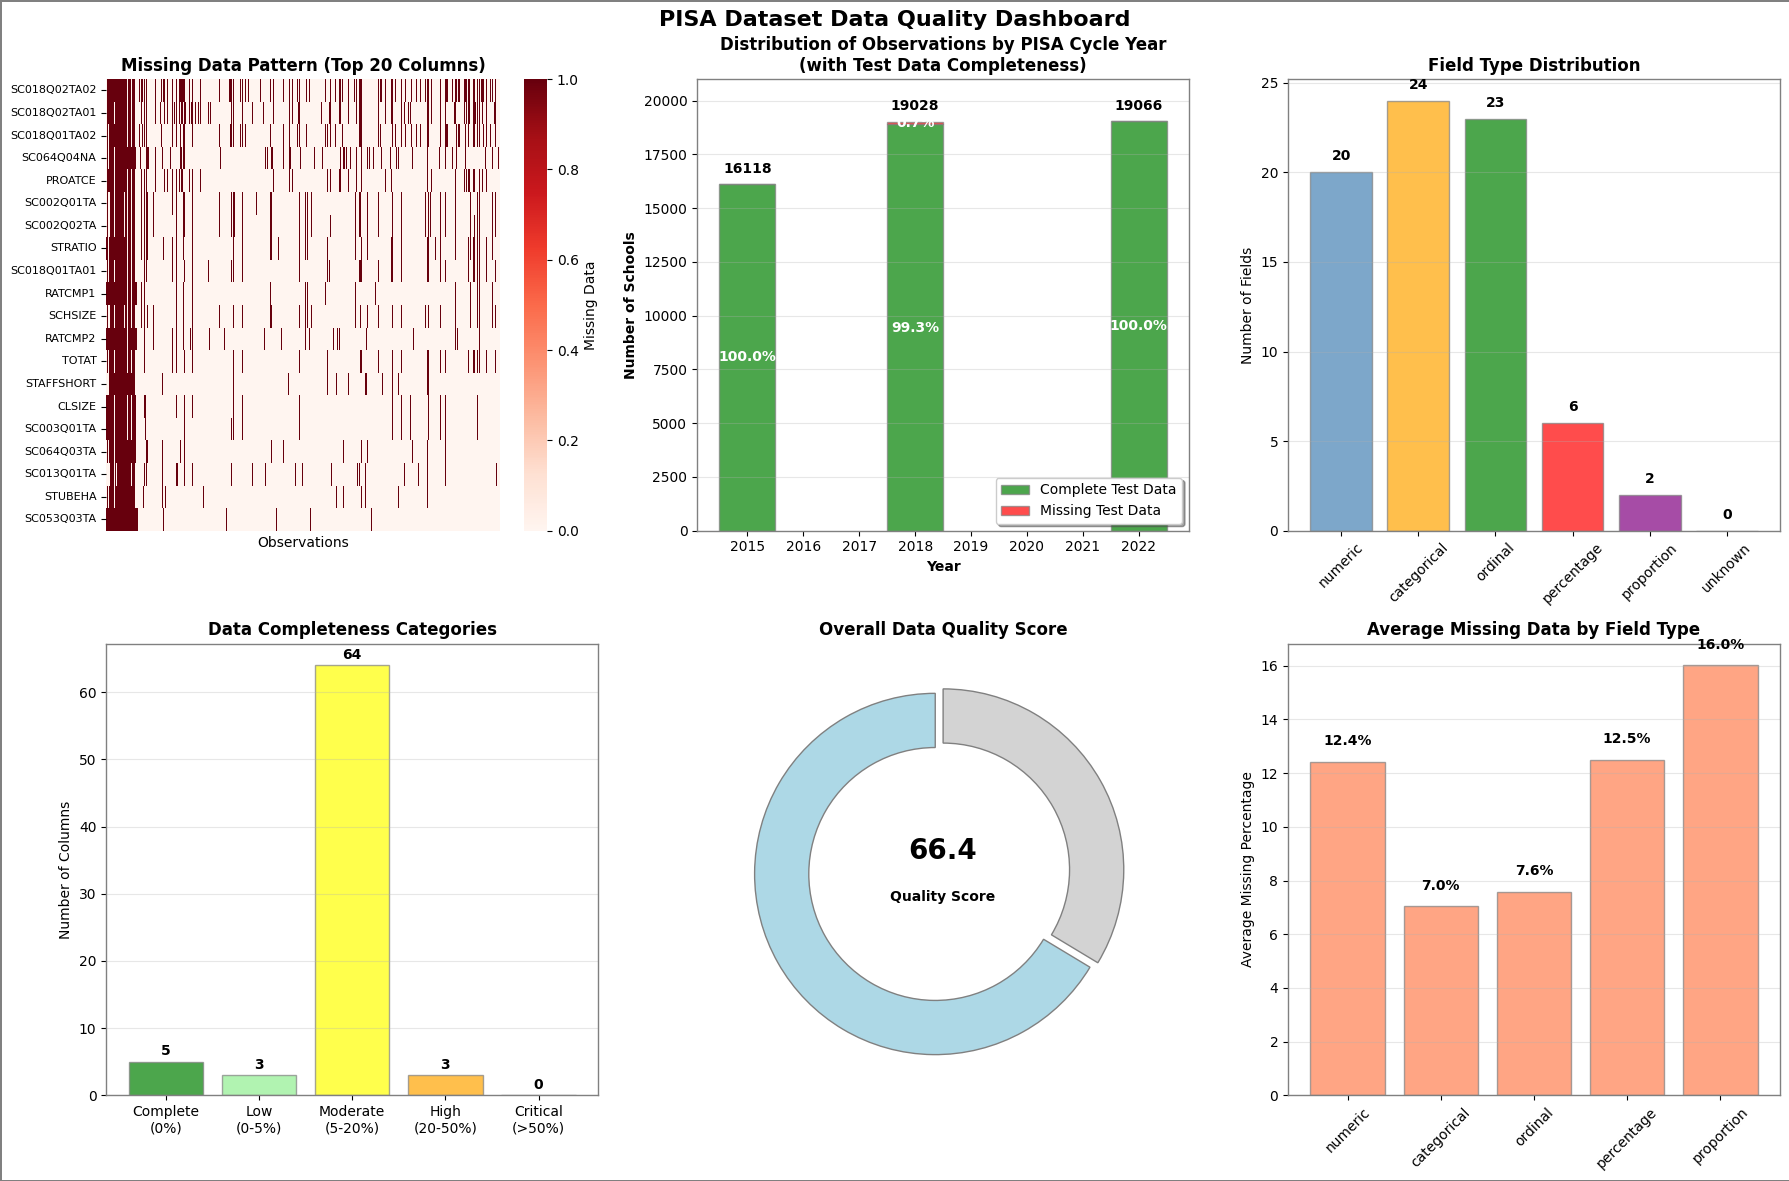


Showing detailed box plots for all 12 fields with consistency issues:


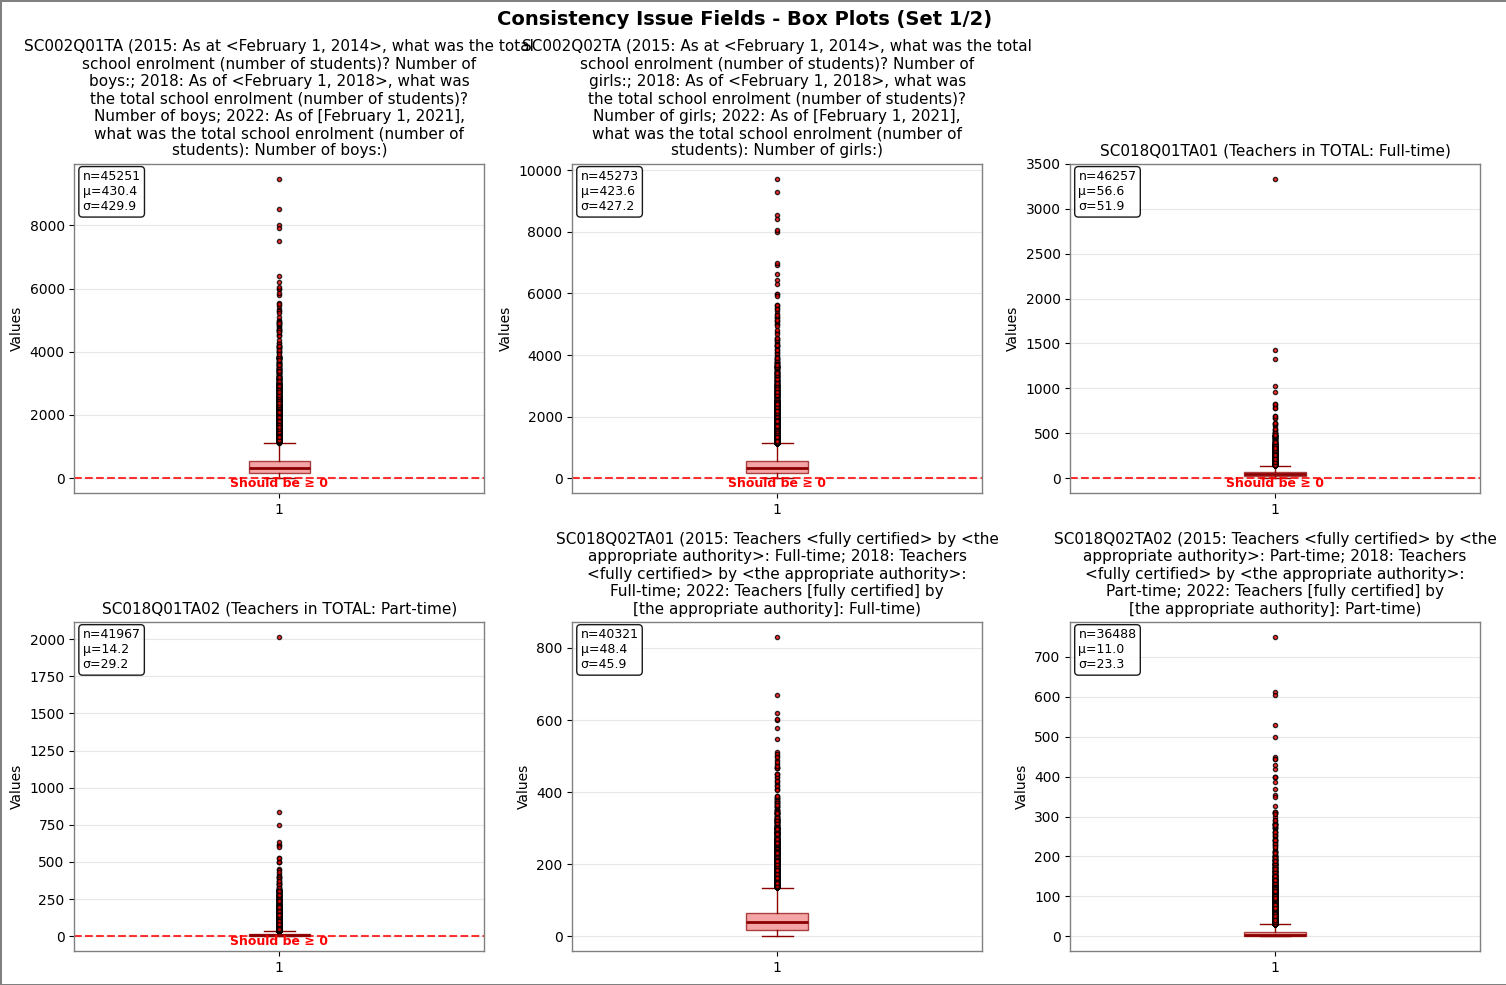

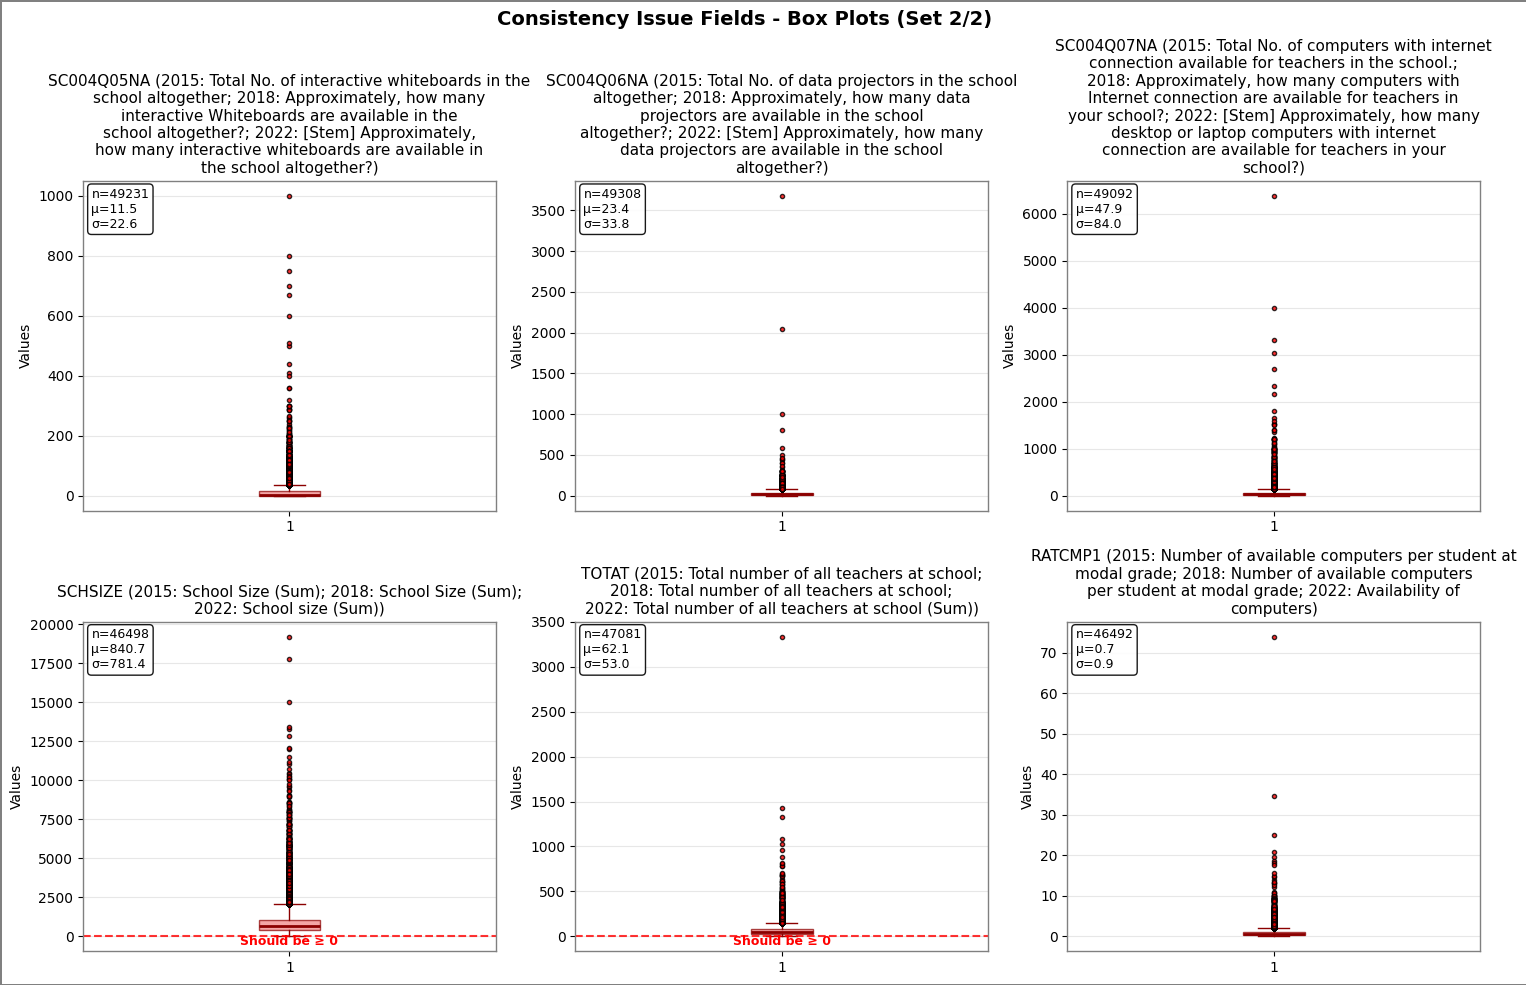

In [18]:
create_data_quality_visualizations(df, structured_results, codebooks_df)

### Cleanup

In [1]:
import google.generativeai as genai
from getpass import getpass

api_key = getpass("Enter your Gemini API key: ")

genai.configure(api_key=api_key)

Enter your Gemini API key: ··········


In [12]:
model = genai.GenerativeModel('models/gemini-1.5-pro')

In [ ]:
prompt = task + role + f""" Here are the results of data quality analysis: {analysis_string}.
What actions would you suggest to take to clean up the data?"""

response = model.generate_content(prompt)
print(response.text)

The PISA dataset has several data quality issues that need addressing before it can be reliably used for analysis and decision-making related to the Education Investment Strategy. Here’s a breakdown of recommended actions, categorized by issue and priority:

**High Priority:**

* **Missing Key Variables (Critical):** The report flags missing data for 'math', 'read', and 'sci'. These are likely core metrics for educational performance and their absence renders the dataset almost useless for impact assessment.  **Action:** Immediately investigate why these core subject scores are missing. Determine if this is a data extraction error, a systemic issue with data collection for certain countries/years, or if these fields are simply not available in the provided dataset.  If they aren't available, acquiring a dataset with these variables is paramount.  If they are available but missing, explore imputation techniques (discussed below) only as a last resort if retrieval is impossible.

* **Hig

#### Missing data

Outcomes

In [21]:
df[df['math'].isna() | df['read'].isna() | df['sci'].isna()]

CNT  CNTRYID    CNTSCHID   CYC  SC001Q01TA  SC013Q01TA  SC002Q01TA  \
238    VNM    704.0  70400018.0  07MS         1.0         1.0       558.0   
6253   VNM    704.0  70400030.0  07MS         1.0         1.0       547.0   
6254   VNM    704.0  70400084.0  07MS         2.0         1.0        41.0   
6255   VNM    704.0  70400121.0  07MS         2.0         1.0       653.0   
6256   VNM    704.0  70400138.0  07MS         2.0         1.0        37.0   
15176  VNM    704.0  70400001.0  07MS         1.0         1.0       177.0   
15177  VNM    704.0  70400008.0  07MS         1.0         1.0       439.0   
15178  VNM    704.0  70400016.0  07MS         2.0         1.0       661.0   
15179  VNM    704.0  70400028.0  07MS         1.0         1.0       422.0   
15180  VNM    704.0  70400031.0  07MS         1.0         1.0       574.0   
15181  VNM    704.0  70400045.0  07MS         1.0         1.0         NaN   
15182  VNM    704.0  70400048.0  07MS         2.0         1.0       237.0   
15183  VNM    704.0  70400052.0  07MS         3.0         1.0       696.0   
15184  VNM    704.0  70400055.0  07MS         5.0         2.0      1041.0   
15185  VNM    704.0  70400059.0  07MS         2.0         1.0       298.0   
15186  VNM    704.0  70400060.0  07MS         2.0         1.0       514.0   
15187  VNM    704.0  70400062.0  07MS         5.0         1.0       463.0   
15188  VNM    704.0  70400069.0  07MS         1.0         1.0       410.0   
15189  VNM    704.0  70400070.0  07MS         1.0         1.0       343.0   
15190  VNM    704.0  70400078.0  07MS         3.0         1.0       629.0   
15191  VNM    704.0  70400082.0  07MS         5.0         1.0       250.0   
15192  VNM    704.0  70400083.0  07MS         1.0         1.0       411.0   
15193  VNM    704.0  70400086.0  07MS         2.0         1.0       480.0   
15194  VNM    704.0  70400091.0  07MS         1.0         1.0       483.0   
15195  VNM    704.0  70400095.0  07MS         2.0         1.0       376.0   
15196  VNM    704.0  70400098.0  07MS         1.0         1.0       293.0   
15197  VNM    704.0  70400102.0  07MS         1.0         1.0       352.0   
15198  VNM    704.0  70400107.0  07MS         1.0         1.0       592.0   
15199  VNM    704.0  70400111.0  07MS         3.0         1.0       757.0   
15200  VNM    704.0  70400117.0  07MS         4.0         1.0      1122.0   
15201  VNM    704.0  70400125.0  07MS         NaN         1.0       437.0   
15202  VNM    704.0  70400128.0  07MS         1.0         1.0       119.0   
15203  VNM    704.0  70400129.0  07MS         2.0         1.0       310.0   
15204  VNM    704.0  70400142.0  07MS         1.0         1.0       574.0   
15205  VNM    704.0  70400147.0  07MS         1.0         NaN       683.0   
15206  VNM    704.0  70400149.0  07MS         2.0         1.0       669.0   
15207  VNM    704.0  70400152.0  07MS         2.0         1.0        83.0   
17470  VNM    704.0  70400094.0  07MS         3.0         2.0       403.0   
27783  VNM    704.0  70400002.0  07MS         1.0         1.0       931.0   
27784  VNM    704.0  70400004.0  07MS         2.0         1.0       677.0   
27785  VNM    704.0  70400006.0  07MS         1.0         1.0       322.0   
27786  VNM    704.0  70400009.0  07MS         4.0         1.0       647.0   
27787  VNM    704.0  70400010.0  07MS         2.0         1.0       651.0   
27788  VNM    704.0  70400011.0  07MS         1.0         1.0       896.0   
27789  VNM    704.0  70400012.0  07MS         5.0         1.0       848.0   
27790  VNM    704.0  70400013.0  07MS         1.0         1.0       550.0   
27791  VNM    704.0  70400014.0  07MS         1.0         1.0       656.0   
27792  VNM    704.0  70400019.0  07MS         2.0         1.0       482.0   
27793  VNM    704.0  70400021.0  07MS         1.0         1.0       618.0   
27794  VNM    704.0  70400022.0  07MS         1.0         1.0       250.0   
27795  VNM    704.0  70400023.0  07MS         1.0         1.0       567.0   
277

- All the missing outcomes are for Vietnam
- Will remove

In [22]:
print(f'Before removing records with empty outcomes: {len(df)}')
df = df.dropna(subset=['math', 'read', 'sci'])
print(f'After removing records with empty outcomes: {len(df)}')

Before removing records with empty outcomes: 54212
After removing records with empty outcomes: 54080


Now, let's investigate fields with high percentage of data missing:

- SC018Q02TA02 (2015: Teachers <fully certified> by <the appropriate authority>: Part-time; 2018: Teachers <fully certified> by <the appropriate authority>: Part-time; 2022: Teachers [fully certified] by [the appropriate authority]: Part-time) [numeric]: 32.7% missing
- SC018Q02TA01 (2015: Teachers <fully certified> by <the appropriate authority>: Full-time; 2018: Teachers <fully certified> by <the appropriate authority>: Full-time; 2022: Teachers [fully certified] by [the appropriate authority]: Full-time) [numeric]: 25.6% missing
- SC018Q01TA02 (Teachers in TOTAL: Part-time) [numeric]: 22.6% missing


In [23]:
missing_cols = ['SC018Q02TA02', 'SC018Q02TA01', 'SC018Q01TA02']

In [24]:
missing_by_country = df.groupby('CNT')[missing_cols].apply(lambda x: x.isnull().sum()).reset_index()
missing_by_country['total_schools'] = df.groupby('CNT').size().values

# Calculate percentages
for col in missing_cols:
    missing_by_country[f'{col}_pct_missing'] = (missing_by_country[col] / missing_by_country['total_schools'] * 100).round(1)

missing_summary_df = missing_by_country.sort_values('SC018Q02TA02_pct_missing', ascending=False)
missing_summary_df

CNT  SC018Q02TA02  SC018Q02TA01  SC018Q01TA02  total_schools  \
18  DNK           954           954           298            954   
84  SWE           617           617           617            617   
31  HUN           525           525            57            525   
19  DOM           502           430           315            572   
59  NZL           431           402           391            524   
11  CAN          1778          1684          1688           2168   
58  NOR           542           538           526            689   
69  QAZ           298           205           286            392   
47  LVA           440           426            54            616   
60  PAN           236           119           199            352   
1   ARE          1195           324          1043           1828   
37  JAM            87            47            71            139   
78  SAU           238            49           202            391   
87  TTO            83            26            75            142   
13  CHL           357           293           159            619   
28  GTM           113            47            99            200   
88  TUN            86            60            51            158   
92  USA           230            93           185            478   
43  KSV           197           111           115            443   
44  LBN           190           154           120            446   
9   BRA           701           723           574           1771   
80  SLV            81            52            55            211   
29  HKG           172           116           152            453   
48  MAC            48            45            46            127   
6   BGR           205            55           163            542   
25  GBR           546           504           439           1462   
0   ALB           208            77           115            571   
57  NLD           172           180           155            489   
49  MAR           112            77            53            347   
23  FIN           190            50            95            593   
33  IRL           157            80            92            490   
35  ISR           167           169            84            527   
5   BEL           248           251           135            806   
65  PRY            58            78            23            189   
3   AUS           649           521           453           2133   
14  COL           242           210           214            805   
36  ITA           346           274           232           1222   
34  ISL            75            45            28            265   
32  IDN           266           129           181            948   
52  MKD            90            73            52            321   
26  GEO           167            65            76            613   
17  DEU           183           186           149            697   
21  ESP           576           479           270           2203   
89  TUR           139            11           114            534   
24  FRA           178           154           130            716   
27  GRC           145           101            62            585   
51  MEX           165           125            92            675   
62  PHL            86             6            71            371   
72  QES           220           184           105            958   
46  LUX            19            15             7             84   
64  PRT           153           111            99            681   
53  MLT            32            16            27            144   
2   ARG           189           243           119            866   
38  JOR           165            29           130            789   
94  VNM            63            21            53            331   
83  SVN           137            89           105            736   
42  KOR            96            50            54            531   
12  CHE           112           125            68           

We have:
- TOTAT: Total number of teachers
- SC018Q01TA01: Teachers in TOTAL: Full-time

Thus, we can remove
- SC018Q01TA02 (Teachers in TOTAL: Part-time) [numeric]: 22.6% missing

and calculate
- _TAPARTTIME Teachers in TOTAL: Part-time = TOTAT - SC018Q01TA01 (in the next section, Data Engineering)

In [25]:
df.drop(columns=['SC018Q01TA02'], inplace=True)

For
- SC018Q02TA02 (2015: Teachers by : Part-time; 2018: Teachers by : Part-time; 2022: Teachers [fully certified] by [the appropriate authority]: Part-time) [numeric]: 32.7% missing
- SC018Q02TA01 (2015: Teachers by : Full-time; 2018: Teachers by : Full-time; 2022: Teachers [fully certified] by [the appropriate authority]: Full-time) [numeric]: 25.6% missing

we will remove the fields.

In [26]:
df.drop(columns=['SC018Q02TA02', 'SC018Q02TA01'], inplace=True)

#### Consistency - Outliers
- SC002Q01TA (2015: As at <February 1, 2014>, what was the total school enrolment (number of students)? Number of boys:; 2018: As of <February 1, 2018>, what was the total school enrolment (number of students)? Number of boys; 2022: As of [February 1, 2021], what was the total school enrolment (number of students): Number of boys:) [numeric]: 147 extreme outliers (>6σ)
- SC002Q02TA (2015: As at <February 1, 2014>, what was the total school enrolment (number of students)? Number of girls:; 2018: As of <February 1, 2018>, what was the total school enrolment (number of students)? Number of girls; 2022: As of [February 1, 2021], what was the total school enrolment (number of students): Number of girls:) [numeric]: 150 extreme outliers (>6σ)
- SC018Q01TA01 (Teachers in TOTAL: Full-time) [numeric]: 83 extreme outliers (>6σ)
- SC018Q01TA02 (Teachers in TOTAL: Part-time) [numeric]: 179 extreme outliers (>6σ)
- SC018Q02TA01 (2015: Teachers <fully certified> by <the appropriate authority>: Full-time; 2018: Teachers <fully certified> by <the appropriate authority>: Full-time; 2022: Teachers [fully certified] by [the appropriate authority]: Full-time) [numeric]: 86 extreme outliers (>6σ)
- SC018Q02TA02 (2015: Teachers <fully certified> by <the appropriate authority>: Part-time; 2018: Teachers <fully certified> by <the appropriate authority>: Part-time; 2022: Teachers [fully certified] by [the appropriate authority]: Part-time) [numeric]: 154 extreme outliers (>6σ)
- SC004Q05NA (2015: Total No. of interactive whiteboards in the school altogether; 2018: Approximately, how many interactive Whiteboards are available in the school altogether?; 2022: [Stem] Approximately, how many interactive whiteboards are available in the school altogether? ) [numeric]: 139 extreme outliers (>6σ)
- SC004Q06NA (2015: Total No. of data projectors in the school altogether; 2018: Approximately, how many data projectors are available in the school altogether?; 2022: [Stem] Approximately, how many data projectors are available in the school altogether? ) [numeric]: 52 extreme outliers (>6σ)
- SC004Q07NA (2015: Total No. of computers with internet connection available for teachers in the school.; 2018: Approximately, how many computers with Internet connection are available for teachers in your school?; 2022: [Stem] Approximately, how many desktop or laptop computers with internet connection are available for teachers in your school? ) [numeric]: 130 extreme outliers (>6σ)
- SCHSIZE (2015: School Size (Sum); 2018: School Size (Sum); 2022: School size (Sum)) [numeric]: 172 extreme outliers (>6σ)
- TOTAT (2015: Total number of all teachers at school; 2018: Total number of all teachers at school; 2022: Total number of all teachers at school (Sum)) [numeric]: 87 extreme outliers (>6σ)
- RATCMP1 (2015: Number of available computers per student at modal grade; 2018: Number of available computers per student at modal grade; 2022: Availability of computers) [numeric]: 128 extreme outliers (>6σ)


In [27]:
# List of fields with outliers
outlier_fields = [
    'SC002Q01TA', 'SC002Q02TA', 'SC018Q01TA01', 'SC018Q01TA02',
    'SC018Q02TA01', 'SC018Q02TA02', 'SC004Q05NA', 'SC004Q06NA',
    'SC004Q07NA', 'SCHSIZE', 'TOTAT', 'RATCMP1'
]

# Dictionary to store outlier dataframes
outlier_dfs = {}

In [28]:
def get_extreme_outliers(series, threshold=6):
    """
    Identify outliers beyond threshold standard deviations
    """
    mean = series.mean()
    std = series.std()

    # Calculate z-scores
    z_scores = np.abs((series - mean) / std)

    # Return boolean mask for extreme outliers
    return z_scores > threshold

# Create outlier dataframes for each field
for field in outlier_fields:
    if field in df.columns:
        # Get outlier mask
        outlier_mask = get_extreme_outliers(df[field])

        # Create dataframe with outliers
        outlier_df = df[outlier_mask].copy()

        # Add z-score column for reference
        if len(outlier_df) > 0:
            mean_val = df[field].mean()
            std_val = df[field].std()
            outlier_df[f'{field}_zscore'] = np.abs((outlier_df[field] - mean_val) / std_val)

            # Sort by z-score (most extreme first)
            outlier_df = outlier_df.sort_values(f'{field}_zscore', ascending=False)

        # Store in dictionary
        outlier_dfs[field] = outlier_df

        field_name = codebooks_df[codebooks_df['field_id'] == field]['field_name'].iloc[0] if len(codebooks_df[codebooks_df['field_id'] == field]) > 0 else "Field name not found"

        print(f"\n{field}")
        print(f"{field_name}")
        print(f"{len(outlier_df)} extreme outliers")
        if len(outlier_df) > 0:
            print(f"Range: {outlier_df[field].min()} to {outlier_df[field].max()}")
            print(f"Z-score range: {outlier_df[f'{field}_zscore'].min():.2f} to {outlier_df[f'{field}_zscore'].max():.2f}")

            # Print the full outlier dataframe for this field
            print(f"\nOutlier records for {field}:")
            print(outlier_df[['CNT', 'CNTSCHID', field]].to_string())
            print("\n" + "="*80)  # Separator line between fields


SC002Q01TA
2015: As at <February 1, 2014>, what was the total school enrolment (number of students)? Number of boys:; 2018: As of <February 1, 2018>, what was the total school enrolment (number of students)? Number of boys; 2022: As of [February 1, 2021], what was the total school enrolment (number of students): Number of boys:
147 extreme outliers
Range: 3019.0 to 9473.0
Z-score range: 6.02 to 21.01

Outlier records for SC002Q01TA:
       CNT    CNTSCHID  SC002Q01TA
31289  PHL  60800173.0      9473.0
35602  IDN  36000092.0      8500.0
30090  THA  76400261.0      8000.0
54114  QCI  97500225.0      7912.0
32266  PRT  62000019.0      7500.0
5330   PHL  60800059.0      6387.0
33476  PHL  60800032.0      6201.0
52631  PHL  60800064.0      6063.0
15005  PHL  60800170.0      5993.0
31938  TAP  15800053.0      5982.0
53209  PHL  60800149.0      5852.0
50488  TAP  15800108.0      5804.0
42538  QCH  97000060.0      5547.0
48060  THA  76400089.0      5498.0
15386  THA  76400153.0      5434.0
10

For these fields, the extreme values seem legit. However, to account for the possibility of the diminishing returns of the increase, we will bucket the data in these fields - see Data Engineering.

## Data Engineering

### Adding fields to account for removed fields

Add field: _TAPARTTIME Teachers in TOTAL: Part-time = TOTAT - SC018Q01TA01

In [29]:
codebooks_df.columns

Index(['field_id', 'field_name', 'if_found_in_codebook', 'source',
       'field_type'],
      dtype='object')

In [30]:
new_rec = pd.DataFrame({'field_id':'_TAPARTTIME', 'field_name':'Teachers in TOTAL: Part-time',
                        'if_found_in_codebook':False, 'source':'Engineered', 'field_type':'numeric'}, index=[0])
codebooks_df = pd.concat([codebooks_df, new_rec], ignore_index=True)

In [31]:
df['_TAPARTTIME'] = df['TOTAT'] - df['SC018Q01TA01']

In [32]:
codebooks_df.tail()

field_id                    field_name  if_found_in_codebook  \
71         math               NOT FOUND: math                 False   
72         read               NOT FOUND: read                 False   
73          sci                NOT FOUND: sci                 False   
74         year               NOT FOUND: year                 False   
75  _TAPARTTIME  Teachers in TOTAL: Part-time                 False   

        source   field_type  
71  engineered      numeric  
72  engineered      numeric  
73  engineered      numeric  
74  engineered  categorical  
75  Engineered      numeric

### Bucketing fields

We will bucket the fields noted for consistency issues:

In [33]:
import pandas as pd
import numpy as np

# Define bucketing strategies for each field
bucketing_config = {
    # Student enrollment fields - similar ranges and nature
    'SC002Q01TA': {
        'bins': [0, 500, 1000, 2000, 3000, 5000, float('inf')],
        'labels': ['Very Small (0-500)', 'Small (501-1000)', 'Medium (1001-2000)',
                  'Large (2001-3000)', 'Very Large (3001-5000)', 'Extremely Large (5000+)']
    },
    'SC002Q02TA': {
        'bins': [0, 500, 1000, 2000, 3000, 5000, float('inf')],
        'labels': ['Very Small (0-500)', 'Small (501-1000)', 'Medium (1001-2000)',
                  'Large (2001-3000)', 'Very Large (3001-5000)', 'Extremely Large (5000+)']
    },

    # School size - broader ranges
    'SCHSIZE': {
        'bins': [0, 1000, 2000, 4000, 6000, 10000, float('inf')],
        'labels': ['Very Small (0-1000)', 'Small (1001-2000)', 'Medium (2001-4000)',
                  'Large (4001-6000)', 'Very Large (6001-10000)', 'Extremely Large (10000+)']
    },

    # Teacher counts - similar patterns
    'SC018Q01TA01': {
        'bins': [0, 50, 100, 200, 300, 500, float('inf')],
        'labels': ['Very Small (0-50)', 'Small (51-100)', 'Medium (101-200)',
                  'Large (201-300)', 'Very Large (301-500)', 'Extremely Large (500+)']
    },
    'TOTAT': {
        'bins': [0, 50, 100, 200, 300, 500, float('inf')],
        'labels': ['Very Small (0-50)', 'Small (51-100)', 'Medium (101-200)',
                  'Large (201-300)', 'Very Large (301-500)', 'Extremely Large (500+)']
    },

    # Technology equipment - different scales
    'SC004Q05NA': {  # Interactive whiteboards
        'bins': [0, 10, 25, 50, 100, 200, float('inf')],
        'labels': ['Minimal (0-10)', 'Low (11-25)', 'Moderate (26-50)',
                  'High (51-100)', 'Very High (101-200)', 'Extremely High (200+)']
    },
    'SC004Q06NA': {  # Data projectors
        'bins': [0, 20, 50, 100, 200, 500, float('inf')],
        'labels': ['Minimal (0-20)', 'Low (21-50)', 'Moderate (51-100)',
                  'High (101-200)', 'Very High (201-500)', 'Extremely High (500+)']
    },
    'SC004Q07NA': {  # Computers with internet
        'bins': [0, 50, 100, 200, 400, 800, float('inf')],
        'labels': ['Minimal (0-50)', 'Low (51-100)', 'Moderate (101-200)',
                  'High (201-400)', 'Very High (401-800)', 'Extremely High (800+)']
    },

    # Computer ratio - different scale entirely
    'RATCMP1': {
        'bins': [0, 0.5, 1.0, 2.0, 5.0, 10.0, float('inf')],
        'labels': ['Very Low (0-0.5)', 'Low (0.51-1.0)', 'Moderate (1.01-2.0)',
                  'High (2.01-5.0)', 'Very High (5.01-10.0)', 'Extremely High (10.0+)']
    }
}

def create_bucketed_fields(df, codebooks_df, bucketing_config):
    """
    Create bucketed versions of fields and add them to both dataframes
    """

    for field_id, config in bucketing_config.items():
        if field_id in df.columns:
            # Create new field name
            new_field_id = f"_BUCK_{field_id}"

            # Create bucketed field
            df[new_field_id] = pd.cut(df[field_id],
                                     bins=config['bins'],
                                     labels=config['labels'],
                                     include_lowest=True)

            # Get original field name from codebooks
            original_field_name = codebooks_df[codebooks_df['field_id'] == field_id]['field_name'].iloc[0] if len(codebooks_df[codebooks_df['field_id'] == field_id]) > 0 else field_id

            # Add to codebooks_df
            new_record = pd.DataFrame({
                'field_id': [new_field_id],
                'field_name': [f"BUCKETED: {original_field_name}"],
                'if_found_in_codebook': [False],
                'source': ['Engineered'],
                'field_type': ['ordinal']
            })

            codebooks_df = pd.concat([codebooks_df, new_record], ignore_index=True)

            print(f"Created {new_field_id}")
            print(f"Value counts:")
            print(df[new_field_id].value_counts().sort_index())
            print("-" * 50)

    return df, codebooks_df

In [34]:
# Apply the bucketing
df, codebooks_df = create_bucketed_fields(df, codebooks_df, bucketing_config)

# Verify the new fields
print("New bucketed fields created:")
bucketed_fields = [col for col in df.columns if col.startswith('_BUCK_')]
print(bucketed_fields)

# Check a few examples
print("\nExample: School size buckets")
print(df[['SCHSIZE', '_BUCK_SCHSIZE']].head(10))

Created _BUCK_SC002Q01TA
Value counts:
_BUCK_SC002Q01TA
Very Small (0-500)         31835
Small (501-1000)           10158
Medium (1001-2000)          2662
Large (2001-3000)            315
Very Large (3001-5000)       130
Extremely Large (5000+)       20
Name: count, dtype: int64
--------------------------------------------------
Created _BUCK_SC002Q02TA
Value counts:
_BUCK_SC002Q02TA
Very Small (0-500)         31885
Small (501-1000)           10258
Medium (1001-2000)          2560
Large (2001-3000)            294
Very Large (3001-5000)       117
Extremely Large (5000+)       28
Name: count, dtype: int64
--------------------------------------------------
Created _BUCK_SCHSIZE
Value counts:
_BUCK_SCHSIZE
Very Small (0-1000)         33574
Small (1001-2000)           10122
Medium (2001-4000)           2270
Large (4001-6000)             276
Very Large (6001-10000)       106
Extremely Large (10000+)       19
Name: count, dtype: int64
--------------------------------------------------
Created

### Engineering new fields

Let's see what engineered fields we can add to facilitate the analysis.

In [ ]:
prompt = f"""
{task} {role}
We have a dataset with the following fields: {codebooks_df}.
What fields would you suggest to engineer?
"""

response = model.generate_content(prompt)
print(response.text)

Given my focus on operational excellence (efficiency, processes, and performance metrics) and the provided data dictionary, I would suggest engineering the following fields, or focusing on these existing ones:

**1. Resource Allocation Metrics:**

* **Teacher-Student Ratio (STRATIO):**  This already exists and is crucial. Lower ratios are generally associated with better learning outcomes.  We can analyze this in relation to school performance.
* **Teacher Full-Time Equivalent (FTE):** Combine `TOTAT` (total teachers), `_TAPARTTIME` (part-time teachers), and teacher full-time/part-time status (`SC018Q01TA01`, `SC018Q01TA02`, etc.) to calculate FTE, allowing for more accurate resource comparisons between schools. This will help analyze teacher workload and its potential impact on student outcomes.
* **Students per Computer (SPC):** Combine school size (`SCHSIZE` or `_BUCK_SCHSIZE`) and computer availability (`RATCMP1`, potentially also factoring in internet connectivity `RATCMP2`) to ca

We will create the following fields:

**Resource Allocation Metrics:**

* _FTE - Teacher Full-Time Equivalent
* _SPC - Students per Computer
* _SPWB - Students per Interactive Whiteboard
* _SPDP - Students per Data Projector

**School Climate & Operational Efficiency:**

* _TSSI - Teacher and Staff Shortage Index
* _IIH - Index of Instructional Hindrances
* _PEI - Parent Engagement Index
* _SQAI - School Quality Assurance Index

**Student/Teacher Behavior & Learning Environment:**

* _SBPI - Student Behavior Problems Index
* _TBPI - Teacher Behavior Problems Index
* _TAC - Technology Access Composite
* _PRI - Physical Resources Index

In [35]:
codebooks_df[codebooks_df['field_id'].isin(['TOTAT', 'SC018Q01TA01', 'SC018Q01TA02'])]

field_id  \
29  SC018Q01TA01   
30  SC018Q01TA02   
70         TOTAT   

                                                                                                                                        field_name  \
29                                                                                                                    Teachers in TOTAL: Full-time   
30                                                                                                                    Teachers in TOTAL: Part-time   
70  2015: Total number of all teachers at school; 2018: Total number of all teachers at school; 2022: Total number of all teachers at school (Sum)   

    if_found_in_codebook                      source field_type  
29                  True  codebooks 2015, 2018, 2022    numeric  
30                  True  codebooks 2015, 2018, 2022    numeric  
70                  True  codebooks 2015, 2018, 2022    numeric

In [36]:
import pandas as pd
import numpy as np

def create_engineered_fields(df, codebooks_df):
    """
    Create comprehensive engineered fields and add them to both dataframes
    """

    # Dictionary to store new fields and their metadata
    new_fields = {}

    # 1. RESOURCE ALLOCATION METRICS

    # Teacher Full-Time Equivalent (_FTE)
    if all(col in df.columns for col in ['TOTAT', 'SC018Q01TA01', 'SC018Q01TA02']):
        # Calculate FTE assuming part-time = 0.5 FTE
        df['_FTE'] = df['SC018Q01TA01'] + (df['SC018Q01TA02'] * 0.5)
        new_fields['_FTE'] = {
            'field_name': 'Teacher Full-Time Equivalent (FTE)',
            'field_type': 'numeric',
            'description': 'Full-time teachers + (Part-time teachers * 0.5)'
        }

    # Students per Computer (_SPC)
    if all(col in df.columns for col in ['SCHSIZE', 'RATCMP1']):
        # Calculate students per computer (inverse of computers per student)
        df['_SPC'] = np.where(df['RATCMP1'] > 0, 1 / df['RATCMP1'], np.nan)
        new_fields['_SPC'] = {
            'field_name': 'Students per Computer',
            'field_type': 'numeric',
            'description': '1 / (Number of available computers per student)'
        }

    # Students per Interactive Whiteboard (_SPWB)
    if all(col in df.columns for col in ['SCHSIZE', 'SC004Q05NA']):
        df['_SPWB'] = np.where(df['SC004Q05NA'] > 0, df['SCHSIZE'] / df['SC004Q05NA'], np.nan)
        new_fields['_SPWB'] = {
            'field_name': 'Students per Interactive Whiteboard',
            'field_type': 'numeric',
            'description': 'School size / Number of interactive whiteboards'
        }

    # Students per Data Projector (_SPDP)
    if all(col in df.columns for col in ['SCHSIZE', 'SC004Q06NA']):
        df['_SPDP'] = np.where(df['SC004Q06NA'] > 0, df['SCHSIZE'] / df['SC004Q06NA'], np.nan)
        new_fields['_SPDP'] = {
            'field_name': 'Students per Data Projector',
            'field_type': 'numeric',
            'description': 'School size / Number of data projectors'
        }

    # 2. SCHOOL CLIMATE & OPERATIONAL EFFICIENCY METRICS

    # Teacher and Staff Shortage Index (_TSSI)
    shortage_cols = ['SC017Q01NA', 'SC017Q02NA', 'SC017Q03NA', 'SC017Q04NA']
    available_shortage_cols = [col for col in shortage_cols if col in df.columns]
    if available_shortage_cols:
        # Average the shortage indicators (assuming higher values = more shortage)
        df['_TSSI'] = df[available_shortage_cols].mean(axis=1)
        new_fields['_TSSI'] = {
            'field_name': 'Teacher and Staff Shortage Index',
            'field_type': 'numeric',
            'description': f'Average of shortage indicators: {", ".join(available_shortage_cols)}'
        }

    # Index of Instructional Hindrances (_IIH)
    hindrance_cols = ['SC017Q01NA', 'SC017Q02NA', 'SC017Q03NA', 'SC017Q04NA',
                      'SC017Q05NA', 'SC017Q06NA', 'SC017Q07NA', 'SC017Q08NA']
    available_hindrance_cols = [col for col in hindrance_cols if col in df.columns]
    if available_hindrance_cols:
        df['_IIH'] = df[available_hindrance_cols].mean(axis=1)
        new_fields['_IIH'] = {
            'field_name': 'Index of Instructional Hindrances',
            'field_type': 'numeric',
            'description': f'Average of instructional hindrance factors: {", ".join(available_hindrance_cols)}'
        }

    # Parent Engagement Index (_PEI)
    parent_cols = ['SC061Q01TA', 'SC061Q02TA', 'SC061Q03TA', 'SC064Q01TA',
                   'SC064Q02TA', 'SC064Q03TA', 'SC064Q04NA']
    available_parent_cols = [col for col in parent_cols if col in df.columns]
    if available_parent_cols:
        df['_PEI'] = df[available_parent_cols].mean(axis=1)
        new_fields['_PEI'] = {
            'field_name': 'Parent Engagement Index',
            'field_type': 'numeric',
            'description': f'Average of parent participation indicators: {", ".join(available_parent_cols)}'
        }

    # School Quality Assurance Index (_SQAI)
    qa_cols = ['SC037Q01TA', 'SC037Q02TA', 'SC037Q03TA', 'SC037Q04TA',
               'SC037Q05NA', 'SC037Q06NA', 'SC037Q07TA', 'SC037Q08TA', 'SC037Q09TA']
    available_qa_cols = [col for col in qa_cols if col in df.columns]
    if available_qa_cols:
        # For categorical yes/no fields, convert to numeric if needed
        qa_data = df[available_qa_cols].copy()
        for col in available_qa_cols:
            if qa_data[col].dtype == 'object':
                # Convert Yes/No to 1/0, assuming 'Yes' indicates quality assurance
                qa_data[col] = qa_data[col].map({'Yes': 1, 'No': 0, 1: 1, 0: 0})

        df['_SQAI'] = qa_data.mean(axis=1)
        new_fields['_SQAI'] = {
            'field_name': 'School Quality Assurance Index',
            'field_type': 'numeric',
            'description': f'Average of quality assurance indicators: {", ".join(available_qa_cols)}'
        }

    # 3. STUDENT BEHAVIOR AND LEARNING ENVIRONMENT

    # Student Behavior Problems Index (_SBPI)
    behavior_cols = ['SC061Q01TA', 'SC061Q02TA', 'SC061Q03TA', 'SC061Q04TA', 'SC061Q05TA']
    available_behavior_cols = [col for col in behavior_cols if col in df.columns]
    if available_behavior_cols:
        df['_SBPI'] = df[available_behavior_cols].mean(axis=1)
        new_fields['_SBPI'] = {
            'field_name': 'Student Behavior Problems Index',
            'field_type': 'numeric',
            'description': f'Average of student behavior hindrance factors: {", ".join(available_behavior_cols)}'
        }

    # Teacher Behavior Problems Index (_TBPI)
    teacher_behavior_cols = ['SC061Q06TA', 'SC061Q07TA', 'SC061Q08TA', 'SC061Q09TA', 'SC061Q10TA']
    available_teacher_behavior_cols = [col for col in teacher_behavior_cols if col in df.columns]
    if available_teacher_behavior_cols:
        df['_TBPI'] = df[available_teacher_behavior_cols].mean(axis=1)
        new_fields['_TBPI'] = {
            'field_name': 'Teacher Behavior Problems Index',
            'field_type': 'numeric',
            'description': f'Average of teacher behavior hindrance factors: {", ".join(available_teacher_behavior_cols)}'
        }

    # Technology Access Composite (_TAC)
    if all(col in df.columns for col in ['_SPC', 'RATCMP2']):
        # Combine students per computer with internet connectivity
        # Lower SPC is better, higher connectivity is better
        # Normalize and combine (this is a simplified approach)
        spc_norm = 1 / (1 + df['_SPC'])  # Inverse so higher is better
        df['_TAC'] = (spc_norm + df['RATCMP2']) / 2
        new_fields['_TAC'] = {
            'field_name': 'Technology Access Composite',
            'field_type': 'numeric',
            'description': 'Composite of computer access and internet connectivity'
        }

    # Physical Resources Index (_PRI)
    physical_resource_cols = ['SC004Q05NA', 'SC004Q06NA', 'SC004Q07NA']
    if all(col in df.columns for col in physical_resource_cols):
        # Standardize each resource by school size for comparability
        for col in physical_resource_cols:
            df[f'{col}_per_student'] = df[col] / df['SCHSIZE']

        # Average the per-student resources
        per_student_cols = [f'{col}_per_student' for col in physical_resource_cols]
        df['_PRI'] = df[per_student_cols].mean(axis=1)
        new_fields['_PRI'] = {
            'field_name': 'Physical Resources Index',
            'field_type': 'numeric',
            'description': 'Average of whiteboards, projectors, and computers per student'
        }

        # Clean up temporary columns
        for col in per_student_cols:
            df.drop(columns=[col], inplace=True)

    # Add all new fields to codebooks_df
    for field_id, metadata in new_fields.items():
        new_record = pd.DataFrame({
            'field_id': [field_id],
            'field_name': [metadata['field_name']],
            'if_found_in_codebook': [False],
            'source': ['Engineered'],
            'field_type': [metadata['field_type']]
        })

        codebooks_df = pd.concat([codebooks_df, new_record], ignore_index=True)

        # Print creation confirmation
        print(f"Created {field_id}: {metadata['field_name']}")
        if field_id in df.columns:
            print(f"  Description: {metadata['description']}")
            print(f"  Non-null values: {df[field_id].notna().sum()}")
            print(f"  Range: {df[field_id].min():.3f} to {df[field_id].max():.3f}")
            print("-" * 60)

    return df, codebooks_df

In [37]:
df, codebooks_df = create_engineered_fields(df, codebooks_df)

Created _SPC: Students per Computer
  Description: 1 / (Number of available computers per student)
  Non-null values: 45172
  Range: 0.014 to 1428.571
------------------------------------------------------------
Created _SPWB: Students per Interactive Whiteboard
  Description: School size / Number of interactive whiteboards
  Non-null values: 31525
  Range: 0.000 to 11990.000
------------------------------------------------------------
Created _SPDP: Students per Data Projector
  Description: School size / Number of data projectors
  Non-null values: 43664
  Range: 0.000 to 7123.000
------------------------------------------------------------
Created _TSSI: Teacher and Staff Shortage Index
  Description: Average of shortage indicators: SC017Q01NA, SC017Q02NA, SC017Q03NA, SC017Q04NA
  Non-null values: 50203
  Range: 1.000 to 4.000
------------------------------------------------------------
Created _IIH: Index of Instructional Hindrances
  Description: Average of instructional hindrance

Now, let's save the dataframes with engineered fields in BQ:

In [38]:
from google.colab import auth
from google.cloud import bigquery

# Authenticate your Google account
auth.authenticate_user()

# --- CONFIGURATION ---
PROJECT_ID = "mgmt599-dn3-final-project"
REGION = "us-central1"

BQ_DATASET = "edu"

client = bigquery.Client(project=PROJECT_ID)

In [39]:
def create_table_upload_data(dataset_id, table_name, df):
    """Create table and upload DataFrame to BigQuery."""
    df.to_gbq(
        destination_table=f'{dataset_id}.{table_name}',
        project_id=PROJECT_ID,
        if_exists='replace'
    )

In [ ]:
create_table_upload_data(BQ_DATASET, '_pisa_data', df)

100%|██████████| 1/1 [00:00<00:00, 2147.62it/s]


In [ ]:
create_table_upload_data(BQ_DATASET, '_pisa_codebooks', codebooks_df)

100%|██████████| 1/1 [00:00<00:00, 9597.95it/s]


# DIVE Analysis

Operational Excellence Analyst:
* Discover: Process efficiency, resource utilization, operational metrics
* Investigate: What operational factors drive success? Where are bottlenecks?
* Validate: Test operational improvement hypotheses
* Extend: Operational optimization roadmap


## 1 - Discover

*Process efficiency, resource utilization, operational metrics*

In [41]:
# get data from BQ
df = pd.read_gbq(f"""
SELECT *
FROM `{PROJECT_ID}.{BQ_DATASET}._pisa_data`
""", project_id=PROJECT_ID)

codebooks_df = pd.read_gbq(f"""
SELECT *
FROM `{PROJECT_ID}.{BQ_DATASET}._pisa_codebooks`
""", project_id=PROJECT_ID)

In [42]:
codebooks_df.loc[codebooks_df['field_id'].isin(['math', 'read', 'sci']), 'field_name'] = ''
codebooks_df['field_id'] = codebooks_df['field_id'].replace({'math': 'MATH', 'read': 'READ', 'sci': 'SCI'})
df = df.rename(columns={'math': 'MATH', 'read': 'READ', 'sci': 'SCI'})

In [43]:
# Field type mapping from the codebook
type_mapping = dict(zip(codebooks_df['field_id'], codebooks_df['field_type']))

# Create mapping for both field_id and field_name
field_name_mapping = dict(zip(codebooks_df['field_id'], codebooks_df['field_name']))

### Correlation patterns

First, let's start with the correlation matrix:

In [84]:
from scipy.stats import pearsonr, spearmanr
from scipy.stats.contingency import association

# Set up plotting style
plt.style.use('default')
sns.set_palette("viridis")

class EducationalDataAnalyzer:

    font_size = 8

    def __init__(self, df, codebooks_df):
        self.df = df.copy()
        self.codebooks_df = codebooks_df
        self.type_mapping = dict(zip(codebooks_df['field_id'], codebooks_df['field_type']))
        self.name_mapping = dict(zip(codebooks_df['field_id'], codebooks_df['field_name']))

        # Create unique school identifier
        self.df['school_id'] = self.df['CNT'].astype(str) + '_' + self.df['CNTSCHID'].astype(str)

        # Apply proper data types
        self._apply_data_types()

    def _apply_data_types(self):
        """Apply correct data types based on codebook"""
        for col in self.df.columns:
            if col in self.type_mapping:
                field_type = self.type_mapping[col]

                if field_type == 'numeric':
                    self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
                elif field_type == 'categorical':
                    self.df[col] = self.df[col].astype('category')
                elif field_type == 'ordinal':
                    self.df[col] = pd.Categorical(self.df[col], ordered=True)
                elif field_type in ['proportion', 'percentage']:
                    self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

    def get_correlation_method(self, col1, col2):
        """Determine appropriate correlation method based on data types"""
        type1 = self.type_mapping.get(col1, 'unknown')
        type2 = self.type_mapping.get(col2, 'unknown')

        # Both numeric/proportion/percentage -> Pearson
        if type1 in ['numeric', 'proportion', 'percentage'] and type2 in ['numeric', 'proportion', 'percentage']:
            return 'pearson'

        # At least one ordinal -> Spearman
        elif type1 == 'ordinal' or type2 == 'ordinal':
            return 'spearman'

        # Both categorical -> Cramér's V (or skip)
        elif type1 == 'categorical' and type2 == 'categorical':
            return 'cramer'

        # Mixed categorical with numeric/ordinal -> point-biserial or skip
        else:
            return 'spearman'  # Default to Spearman for mixed types

    def calculate_correlation(self, col1, col2, method='auto'):
        """Calculate correlation using appropriate method"""
        if method == 'auto':
            method = self.get_correlation_method(col1, col2)

        # Get non-null values
        mask = ~(pd.isna(self.df[col1]) | pd.isna(self.df[col2]))
        if mask.sum() < 10:  # Need at least 10 observations
            return np.nan

        x = self.df.loc[mask, col1]
        y = self.df.loc[mask, col2]

        try:
            if method == 'pearson':
                corr, _ = pearsonr(x, y)
                return corr
            elif method == 'spearman':
                corr, _ = spearmanr(x, y)
                return corr
            elif method == 'cramer':
                # Cramér's V for categorical variables
                confusion_matrix = pd.crosstab(x, y)
                chi2 = association(confusion_matrix, method='cramer')
                return chi2
            else:
                return np.nan
        except:
            return np.nan

    def create_correlation_matrix(self, variables=None, filter_country=None, filter_year=None,
                                filter_schools=None, method='auto'):
        """Create correlation matrix with appropriate methods"""

        # Filter data
        data_subset = self.df.copy()

        if filter_country:
            data_subset = data_subset[data_subset['CNT'].isin(filter_country)]

        if filter_year:
            data_subset = data_subset[data_subset['year'].isin(filter_year)]

        if filter_schools:
            data_subset = data_subset[data_subset['school_id'].isin(filter_schools)]

        # Select variables
        if variables is None:
            # Exclude identifier columns and bucketed variables for cleaner matrix
            exclude_cols = ['CNT', 'CNTRYID', 'CNTSCHID', 'school_id'] + \
                          [col for col in data_subset.columns if col.startswith('_BUCK')]
            variables = [col for col in data_subset.columns if col not in exclude_cols]

        # Create correlation matrix
        corr_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
        method_matrix = pd.DataFrame(index=variables, columns=variables, dtype=object)

        for i, var1 in enumerate(variables):
            for j, var2 in enumerate(variables):
                if i == j:
                    corr_matrix.loc[var1, var2] = 1.0
                    method_matrix.loc[var1, var2] = 'identity'
                elif i > j:  # Use symmetry
                    corr_matrix.loc[var1, var2] = corr_matrix.loc[var2, var1]
                    method_matrix.loc[var1, var2] = method_matrix.loc[var2, var1]
                else:
                    # Temporarily set data for correlation calculation
                    temp_df = self.df
                    self.df = data_subset

                    corr_val = self.calculate_correlation(var1, var2, method)
                    corr_method = self.get_correlation_method(var1, var2) if method == 'auto' else method

                    corr_matrix.loc[var1, var2] = corr_val
                    method_matrix.loc[var1, var2] = corr_method

                    # Restore original data
                    self.df = temp_df

        return corr_matrix.astype(float), method_matrix

    def plot_correlation_heatmap(self, corr_matrix, title="Correlation Matrix",
                               figsize=(15, 12), show_values=True):
        """Plot correlation heatmap with proper formatting"""

        plt.figure(figsize=figsize)

        # Create readable labels
        labels = []
        for col in corr_matrix.index:
            field_name = self.name_mapping.get(col, col)
            if len(field_name) > 30:
                field_name = field_name[:27] + "..."
            labels.append(f"{col}\n{field_name}")

        # Create mask for missing values
        mask = corr_matrix.isna()

        # Plot heatmap
        ax = sns.heatmap(corr_matrix,
                        xticklabels=labels,
                        yticklabels=labels,
                        annot=show_values and len(corr_matrix) < 20,  # Only show values if matrix isn't too large
                        fmt='.2f',
                        cmap='RdBu_r',
                        center=0,
                        vmin=-1, vmax=1,
                        mask=mask,
                        square=True,
                        linewidths=0.5,
                        cbar_kws={'label': 'Correlation'}, annot_kws={'size': 8})

        plt.title(title, fontsize=16, pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        return ax

    def analyze_by_country_year(self, variables=['math', 'read', 'sci', 'SCHSIZE', 'STRATIO']):
        """Analyze correlations by country and year"""

        countries = self.df['CNT'].unique()[:5]  # Limit to first 5 countries for readability
        years = sorted(self.df['year'].unique())

        fig, axes = plt.subplots(len(countries), len(years),
                               figsize=(5*len(years), 4*len(countries)))

        if len(countries) == 1:
            axes = axes.reshape(1, -1)
        if len(years) == 1:
            axes = axes.reshape(-1, 1)

        for i, country in enumerate(countries):
            for j, year in enumerate(years):
                corr_matrix, _ = self.create_correlation_matrix(
                    variables=variables,
                    filter_country=[country],
                    filter_year=[year]
                )

                # Plot subplot
                ax = axes[i, j] if len(countries) > 1 else axes[j]

                sns.heatmap(corr_matrix,
                           annot=True,
                           fmt='.2f',
                           cmap='RdBu_r',
                           center=0,
                           vmin=-1, vmax=1,
                           ax=ax,
                           square=True,
                           cbar_kws={'label': 'Correlation'}, annot_kws={'size': 8})

                ax.set_title(f'{country} - {year}')
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
                ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

        plt.tight_layout()
        return fig

    def get_summary_stats_by_groups(self):
        """Get summary statistics by country, year, and school"""

        # Summary by country and year
        country_year_stats = self.df.groupby(['CNT', 'year']).agg({
            'math': ['mean', 'std', 'count'],
            'read': ['mean', 'std', 'count'],
            'sci': ['mean', 'std', 'count'],
            'SCHSIZE': ['mean', 'std', 'count']
        }).round(2)

        # Summary by school (top 10 schools by size)
        school_stats = self.df.groupby('school_id').agg({
            'math': 'mean',
            'read': 'mean',
            'sci': 'mean',
            'SCHSIZE': 'first',
            'CNT': 'first',
            'year': 'first'
        }).sort_values('SCHSIZE', ascending=False).head(10)

        return country_year_stats, school_stats


<Axes: title={'center': 'Overall Educational Data Correlations'}>

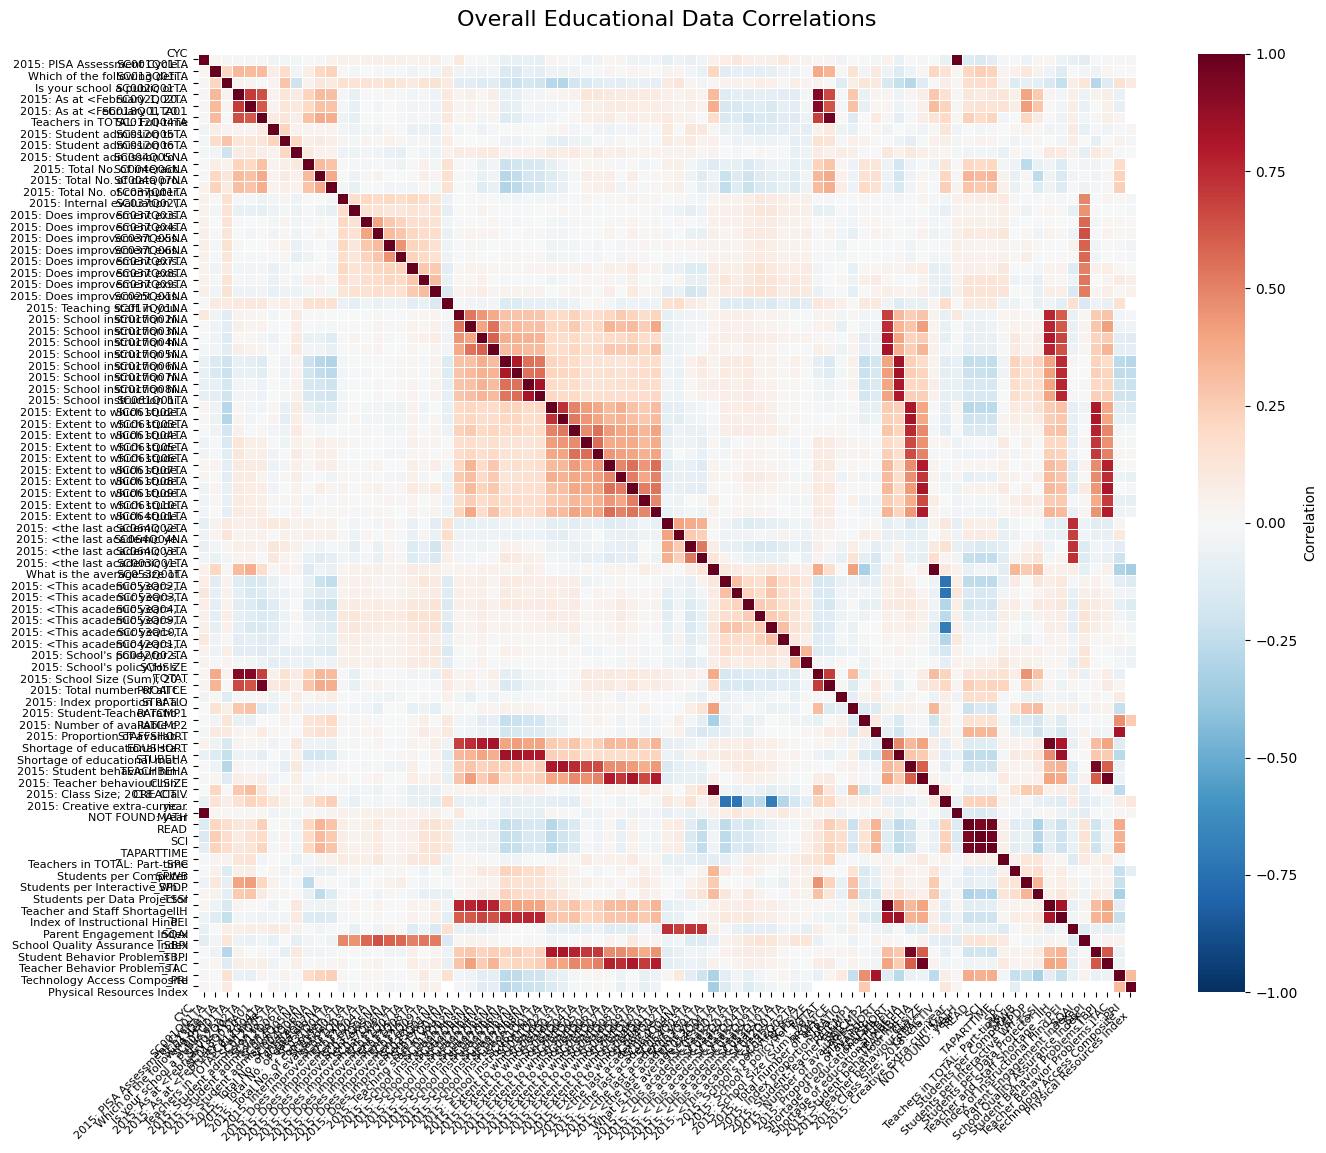

In [85]:
analyzer = EducationalDataAnalyzer(df, codebooks_df)

# Overall correlation matrix
corr_matrix, method_matrix = analyzer.create_correlation_matrix()
analyzer.plot_correlation_heatmap(corr_matrix, "Overall Educational Data Correlations")

It is clear that there are several highly correlated dimensions:

<Axes: title={'center': 'Strong Correlations'}>

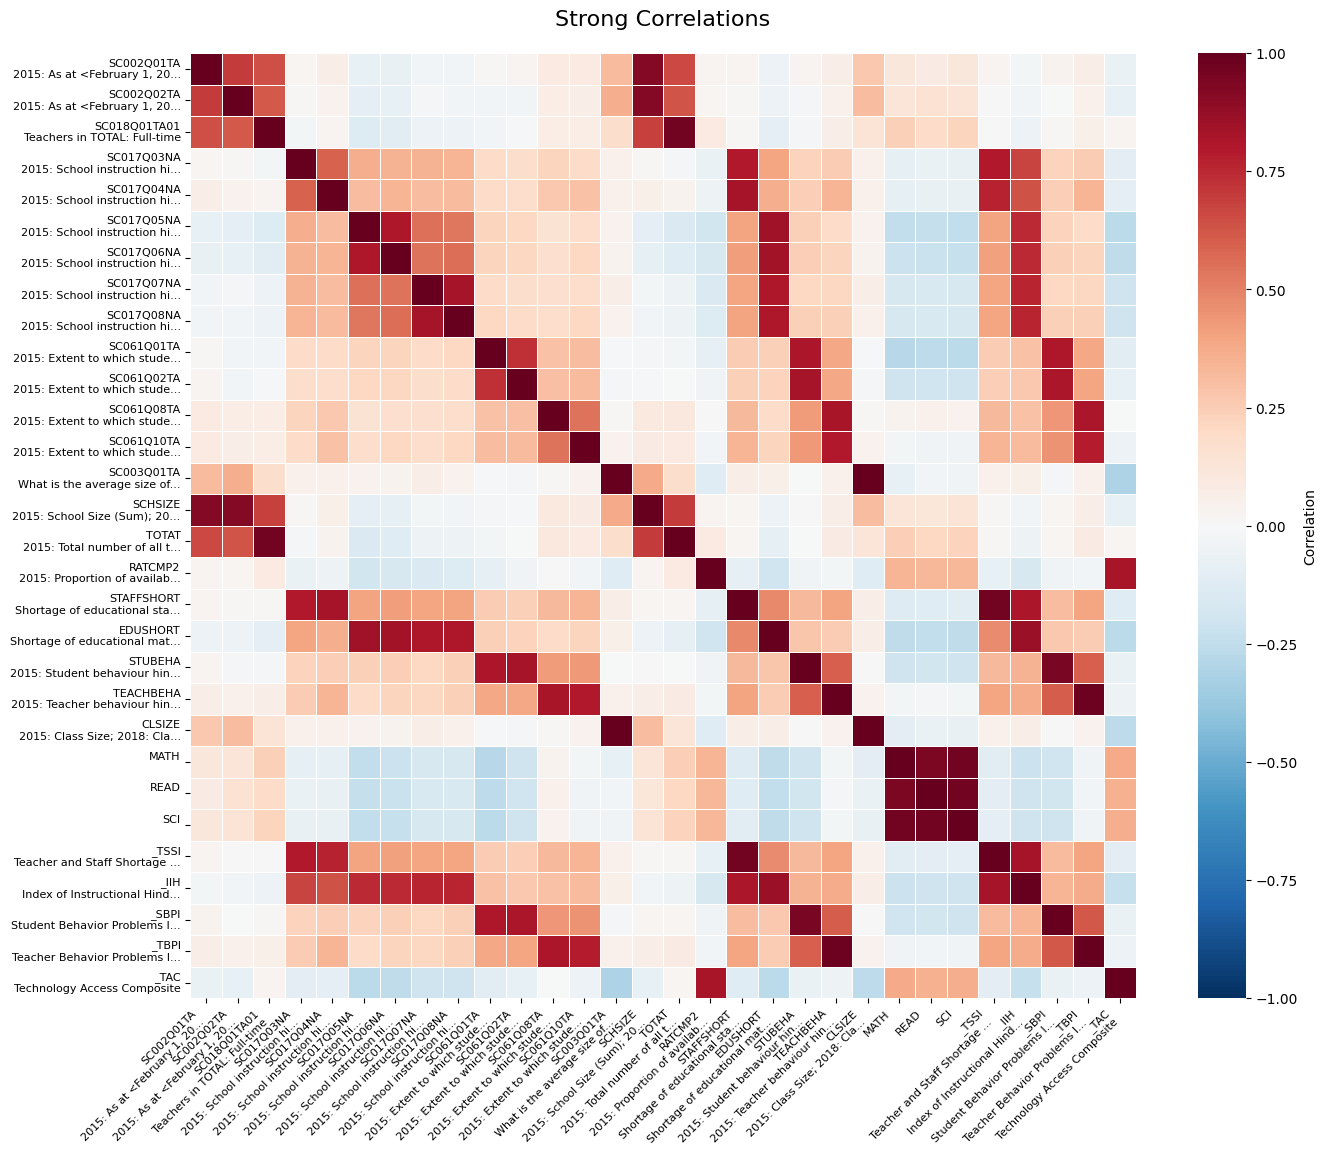

In [86]:
mask = (corr_matrix.abs() > 0.8) & (corr_matrix != 1.0)
high_corr_vars = mask.any(axis=1)
high_corr_matrix = corr_matrix.loc[high_corr_vars, high_corr_vars]

analyzer.plot_correlation_heatmap(high_corr_matrix, "Strong Correlations")

Now, let's find the highest correlations between various dimensions and the educaiotnal outcomes: MATH, READ, and SCI:

In [89]:
# Get correlation matrix for all variables
corr_matrix, _ = analyzer.create_correlation_matrix()

# Define target variables and exclude variables
target_vars = ['MATH', 'READ', 'SCI']
exclude_vars = ['CNT', 'CNTRYID', 'CNTSCHID', 'year', 'school_id']

# Get predictor variables (all except targets and excluded)
predictor_vars = [col for col in corr_matrix.columns
                  if col not in target_vars and col not in exclude_vars]

# Extract correlations between predictors and targets
target_corr_matrix = corr_matrix.loc[predictor_vars, target_vars]

MATH      READ       SCI
CYC          -0.135260 -0.141949 -0.104351
SC001Q01TA    0.214060  0.243403  0.227779
SC013Q01TA    0.171122  0.183518  0.180623
SC002Q01TA    0.116696  0.082589  0.111109
SC002Q02TA    0.125643  0.150891  0.138789
SC018Q01TA01  0.234585  0.194777  0.220039
SC012Q04TA   -0.006192 -0.031082 -0.020386
SC012Q05TA    0.019320  0.037592  0.028353
SC012Q06TA   -0.041283 -0.035793 -0.036924
SC004Q05NA    0.207538  0.195027  0.204555
SC004Q06NA    0.341199  0.319501  0.336345
SC004Q07NA    0.288276  0.263454  0.284368
SC037Q01TA    0.064379  0.069051  0.064087
SC037Q02TA    0.031520  0.040099  0.037782
SC037Q03TA    0.056090  0.056050  0.050281
SC037Q04TA    0.099575  0.090098  0.086678
SC037Q05NA    0.041235  0.026864  0.027498
SC037Q06NA    0.050588  0.044227  0.042687
SC037Q07TA    0.058396  0.061201  0.052026
SC037Q08TA    0.138861  0.140499  0.133389
SC037Q09TA    0.142034  0.138574  0.137103
SC025Q01NA    0.100458  0.099603  0.106856
SC017Q01NA   -0.052000 -0.048927 -0.037080
SC017Q02NA   -0.063379 -0.072067 -0.061073
SC017Q03NA   -0.092424 -0.068617 -0.076698
SC017Q04NA   -0.086303 -0.077212 -0.078077
SC017Q05NA   -0.245135 -0.241112 -0.249813
SC017Q06NA   -0.218624 -0.221299 -0.226995
SC017Q07NA   -0.167806 -0.158577 -0.168688
SC017Q08NA   -0.167769 -0.160815 -0.170259
SC061Q01TA   -0.279946 -0.258987 -0.271018
SC061Q02TA   -0.206811 -0.197245 -0.209032
SC061Q03TA   -0.143141 -0.148883 -0.149979
SC061Q04TA   -0.022055 -0.010665 -0.017610
SC061Q05TA   -0.040196 -0.046117 -0.044198
SC061Q06TA    0.020064  0.025890  0.022591
SC061Q07TA   -0.098496 -0.066172 -0.081172
SC061Q08TA    0.037698  0.054170  0.042348
SC061Q09TA   -0.022346 -0.025490 -0.027878
SC061Q10TA   -0.030849 -0.039248 -0.039343
SC064Q01TA    0.075495  0.056202  0.056845
SC064Q02TA    0.091237  0.079802  0.076691
SC064Q04NA   -0.115320 -0.148240 -0.134982
SC064Q03TA   -0.237360 -0.249068 -0.247497
SC003Q01TA   -0.084529 -0.032556 -0.046807
SC053Q01TA   -0.251871 -0.261516 -0.265030
SC053Q02TA   -0.150012 -0.164445 -0.156047
SC053Q03TA   -0.193196 -0.162657 -0.180275
SC053Q04TA   -0.121437 -0.100494 -0.116441
SC053Q09TA   -0.069397 -0.066234 -0.073540
SC053Q10TA   -0.034957 -0.024382 -0.034833
SC042Q01TA   -0.025052 -0.015292 -0.025382
SC042Q02TA    0.037666  0.056741  0.048339
SCHSIZE       0.130289  0.124233  0.134467
TOTAT         0.243714  0.208118  0.231784
PROATCE       0.177373  0.169040  0.177041
STRATIO      -0.214857 -0.154053 -0.182737
RATCMP1       0.148239  0.135368  0.145091
RATCMP2       0.341885  0.330557  0.330591
STAFFSHORT   -0.126608 -0.119780 -0.117110
EDUSHORT     -0.253063 -0.248097 -0.254199
STUBEHA      -0.209143 -0.191911 -0.206843
TEACHBEHA    -0.026139 -0.020246 -0.026583
CLSIZE       -0.102280 -0.066599 -0.073865
CREACTIV      0.223692  0.232909  0.234616
_TAPARTTIME   0.048782  0.069421  0.061063
_SPC         -0.114728 -0.092858 -0.102424
_SPWB        -0.094304 -0.069810 -0.077543
_SPDP        -0.310851 -0.276737 -0.289464
_TSSI        -0.113354 -0.103368 -0.099817
_IIH         -0.214671 -0.204579 -0.207877
_PEI         -0.063156 -0.084613 -0.082288
_SQAI         0.131304  0.134366  0.124947
_SBPI        -0.200023 -0.192538 -0.203544
_TBPI        -0.043786 -0.036453 -0.043618
_TAC          0.375412  0.356607  0.363293
_PRI               NaN       NaN       NaN

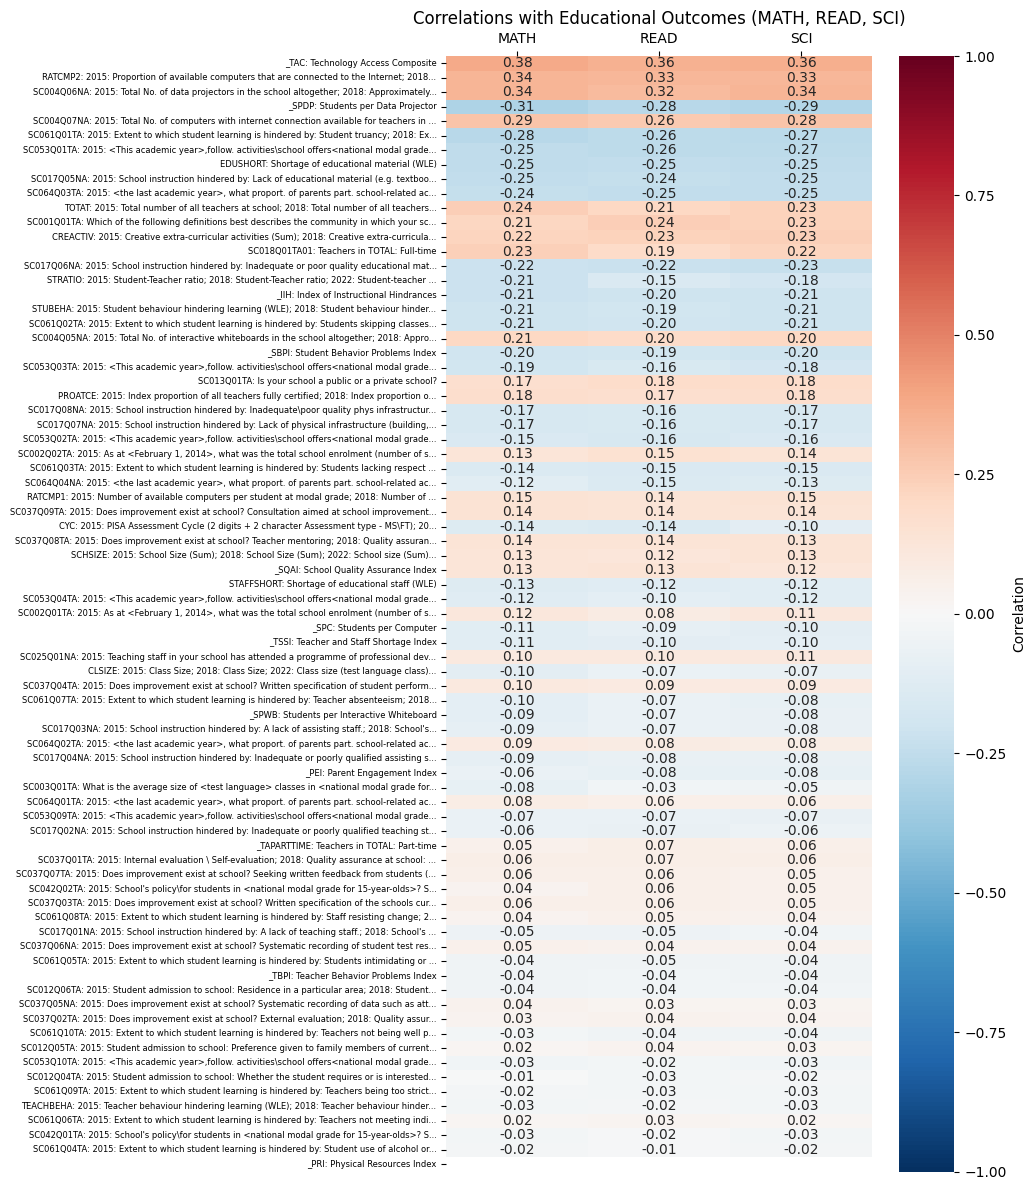

In [97]:
y_labels = []
for predictor in target_corr_matrix_sorted.index:
   field_name = analyzer.name_mapping.get(predictor, '')
   if field_name:
       y_labels.append(f"{predictor}: {field_name[:80] + '...' if len(field_name) > 50 else field_name}")
   else:
       y_labels.append(predictor)

plt.figure(figsize=(10, 12))
sns.heatmap(target_corr_matrix_sorted,
           annot=True,
           fmt='.2f',
           cmap='RdBu_r',
           center=0,
           vmin=-1, vmax=1,
           cbar_kws={'label': 'Correlation'},
           xticklabels=True,
           yticklabels=y_labels)
plt.title("Correlations with Educational Outcomes (MATH, READ, SCI)")
plt.xticks(rotation=0, ha='center')  # Center align x-axis labels
plt.gca().xaxis.tick_top()  # Move x-axis labels to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis title to top
plt.yticks(rotation=0, fontsize=6)
plt.tight_layout()
plt.show()

From the analysis of the correlations we can hypothesize that the main factors impacting educaiotnal outcomes migth be:
1. **Access to technology**
2. **Educational materials**
3. **Number of teachers**


### School outcomes per country

Now, let's build a chart for countries:

In [174]:
path = '/content/drive/MyDrive/Data/Personal/Education/Purdue/Courses/MGMT 59000-DY2-025 AI-Assisted Big Data Analytics in the Cloud/Assignments/Final Project/Data/PISA/'

In [175]:
countries_df = pd.read_csv(f"{path}countries.csv", usecols=['name', 'alpha-3', 'region', 'sub-region'])
countries_df = countries_df.rename(columns={'alpha-3': 'CNT'})
countries_df.head()

name  CNT   region       sub-region
0     Afghanistan  AFG     Asia    Southern Asia
1   Åland Islands  ALA   Europe  Northern Europe
2         Albania  ALB   Europe  Southern Europe
3         Algeria  DZA   Africa  Northern Africa
4  American Samoa  ASM  Oceania        Polynesia

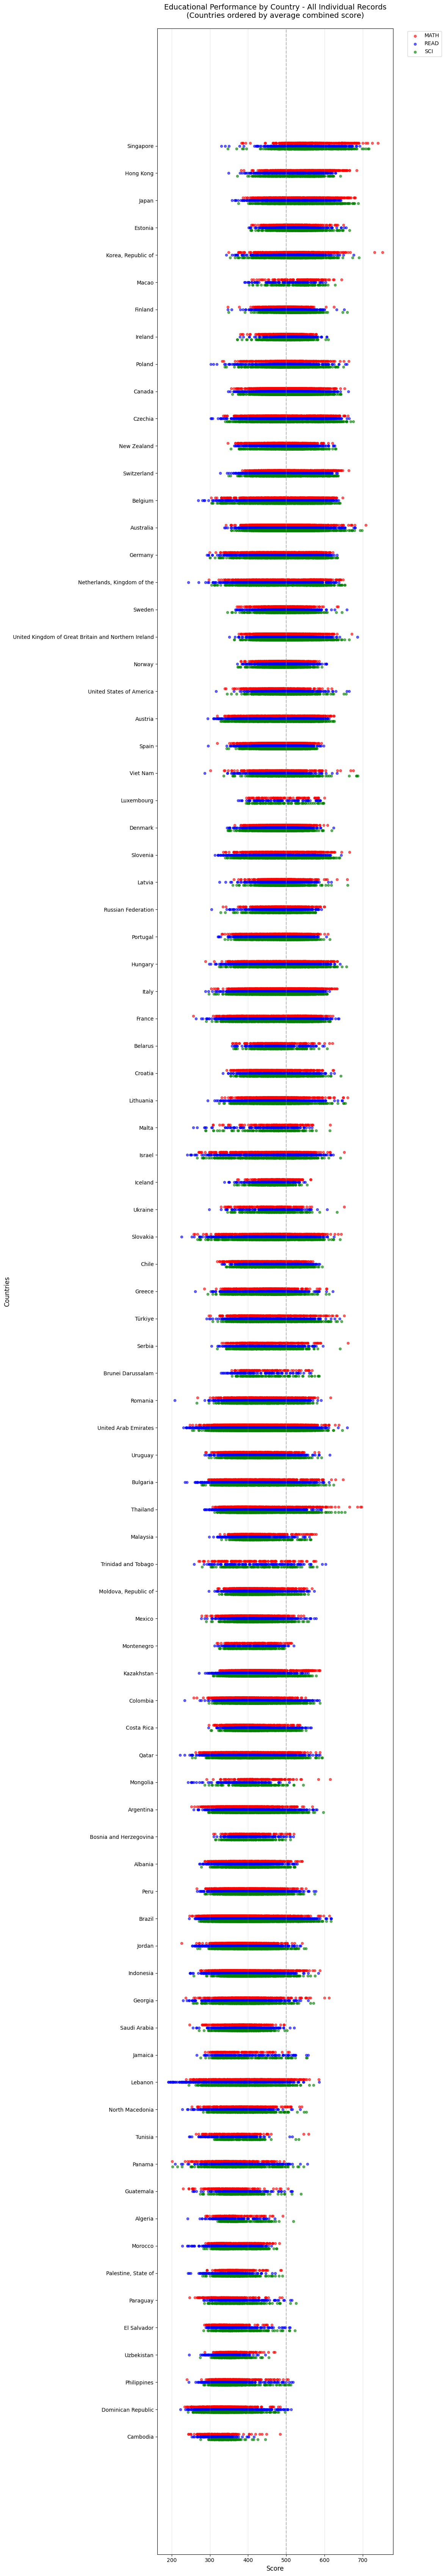


Total records plotted: 54080
Records per country range: 56 - 2203
Total dots per country: 3x number of records (MATH + READ + SCI)


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Merge df with country names
country_col = 'name'
df_with_names = df.merge(countries_df, on='CNT', how='left')

# Calculate average combined score by country for sorting
country_avg_scores = df_with_names.groupby(['CNT', country_col])[['MATH', 'READ', 'SCI']].mean()
country_avg_scores['combined_score'] = country_avg_scores.sum(axis=1)
country_order = country_avg_scores.sort_values('combined_score', ascending=True).reset_index()

# Create country position mapping
country_positions = {cnt: i for i, cnt in enumerate(country_order['CNT'])}

# Prepare data for plotting - all individual records
df_plot = df_with_names.copy()
df_plot['y_pos'] = df_plot['CNT'].map(country_positions)

# Create the plot
plt.figure(figsize=(12, max(8, len(country_order) * 0.8)))

# Add small vertical offsets to separate the three subjects
offset = 0.1
math_y = df_plot['y_pos'] + offset
read_y = df_plot['y_pos']
sci_y = df_plot['y_pos'] - offset

# Plot all individual dots for each record with vertical separation
plt.scatter(df_plot['MATH'], math_y, color='red', alpha=0.6, s=20, label='MATH')
plt.scatter(df_plot['READ'], read_y, color='blue', alpha=0.6, s=20, label='READ')
plt.scatter(df_plot['SCI'], sci_y, color='green', alpha=0.6, s=20, label='SCI')

# Set y-axis labels to country names
plt.yticks(range(len(country_order)), country_order[country_col])

# Formatting
plt.xlabel('Score', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.title('Educational Performance by Country - All Individual Records\n(Countries ordered by average combined score)', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='x')

# Add vertical lines for reference
plt.axvline(x=500, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print summary
print(f"\nTotal records plotted: {len(df_plot)}")
print(f"Records per country range: {df_plot.groupby('CNT').size().min()} - {df_plot.groupby('CNT').size().max()}")
print(f"Total dots per country: 3x number of records (MATH + READ + SCI)")

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


From this chart we can conclude that most countries are characterized by a fairly wide range of test performance.

### Differences between countries in correlation patterns?

It would be important to explore whether there is a dependency between a country and the correlations between the potential impacting and educational outcomes. Would teh correlations align similarly in, say, Singapore and Lebanon?

In [108]:
from scipy import stats
from scipy.stats import f_oneway, levene


def test_correlation_variance_across_countries(df, predictor_vars=None, min_obs_per_country=30):
    """
    Test whether correlation patterns between predictors and outcomes
    vary significantly across countries.

    Returns:
    - Statistical test results
    - Variance analysis
    - Visualization of correlation distributions
    """

    outcome_vars = ['MATH', 'READ', 'SCI']

    # Default predictor variables
    if predictor_vars is None:
        exclude_vars = ['CNT', 'CNTRYID', 'CNTSCHID', 'year', 'school_id'] + \
                      [col for col in df.columns if col.startswith('_BUCK')] + \
                      outcome_vars
        predictor_vars = [col for col in df.columns if col not in exclude_vars]

    # Store correlations by country
    country_correlations = {}

    print("Calculating correlations by country...")

    for country in df['CNT'].unique():
        country_data = df[df['CNT'] == country]

        if len(country_data) < min_obs_per_country:
            continue

        correlations = []

        for predictor in predictor_vars:
            for outcome in outcome_vars:
                # Calculate correlation
                mask = ~(pd.isna(country_data[predictor]) | pd.isna(country_data[outcome]))

                if mask.sum() < 10:
                    continue

                x = country_data.loc[mask, predictor]
                y = country_data.loc[mask, outcome]

                try:
                    corr, p_value = stats.pearsonr(x, y)
                    correlations.append({
                        'predictor': predictor,
                        'outcome': outcome,
                        'correlation': corr,
                        'p_value': p_value,
                        'pair': f"{predictor}-{outcome}"
                    })
                except:
                    continue

        if correlations:
            country_correlations[country] = pd.DataFrame(correlations)

    print(f"Found data for {len(country_correlations)} countries")

    # Analyze variance in correlations across countries
    results = {}

    # Get all unique predictor-outcome pairs
    all_pairs = set()
    for country_df in country_correlations.values():
        all_pairs.update(country_df['pair'].unique())

    print(f"Analyzing {len(all_pairs)} predictor-outcome pairs...")

    # Test for each predictor-outcome pair
    variance_tests = []

    for pair in all_pairs:
        # Collect correlations for this pair across countries
        pair_correlations = []
        countries_with_pair = []

        for country, country_df in country_correlations.items():
            pair_data = country_df[country_df['pair'] == pair]
            if not pair_data.empty:
                pair_correlations.append(pair_data['correlation'].iloc[0])
                countries_with_pair.append(country)

        if len(pair_correlations) >= 3:  # Need at least 3 countries
            # Test for variance
            variance = np.var(pair_correlations)
            mean_corr = np.mean(pair_correlations)
            std_corr = np.std(pair_correlations)

            variance_tests.append({
                'pair': pair,
                'predictor': pair.split('-')[0],
                'outcome': pair.split('-')[1],
                'n_countries': len(pair_correlations),
                'mean_correlation': mean_corr,
                'std_correlation': std_corr,
                'variance': variance,
                'min_correlation': min(pair_correlations),
                'max_correlation': max(pair_correlations),
                'range': max(pair_correlations) - min(pair_correlations),
                'correlations': pair_correlations,
                'countries': countries_with_pair
            })

    variance_df = pd.DataFrame(variance_tests)

    if variance_df.empty:
        print("No common predictor-outcome pairs found across countries")
        return None

    # Overall analysis
    print("\n" + "="*60)
    print("CORRELATION VARIANCE ANALYSIS ACROSS COUNTRIES")
    print("="*60)

    # 1. Overall variance test
    all_stds = variance_df['std_correlation'].values
    mean_std = np.mean(all_stds)
    median_std = np.median(all_stds)

    print(f"\nOVERALL FINDINGS:")
    print(f"Average standard deviation of correlations across countries: {mean_std:.3f}")
    print(f"Median standard deviation: {median_std:.3f}")
    print(f"Range of standard deviations: {np.min(all_stds):.3f} to {np.max(all_stds):.3f}")

    # 2. Statistical significance test
    # Test if variance is significantly different from zero
    # Using one-sample t-test against zero variance
    t_stat, p_value = stats.ttest_1samp(all_stds, 0)

    print(f"\nSTATISTICAL TEST:")
    print(f"H0: No variance in correlations across countries (std = 0)")
    print(f"H1: Variance exists (std > 0)")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.3e}")

    if p_value < 0.001:
        print("*** HIGHLY SIGNIFICANT: Correlations vary significantly across countries")
    elif p_value < 0.01:
        print("** SIGNIFICANT: Correlations vary across countries")
    elif p_value < 0.05:
        print("* MARGINALLY SIGNIFICANT: Some variation across countries")
    else:
        print("NOT SIGNIFICANT: No evidence of variation across countries")

    # 3. Identify most variable relationships
    print(f"\nMOST VARIABLE RELATIONSHIPS (Top 5):")
    top_variable = variance_df.nlargest(5, 'std_correlation')[['pair', 'std_correlation', 'range', 'n_countries']]
    for _, row in top_variable.iterrows():
        print(f"  {row['pair']}: std={row['std_correlation']:.3f}, range={row['range']:.3f} ({row['n_countries']} countries)")

    # 4. Most consistent relationships
    print(f"\nMOST CONSISTENT RELATIONSHIPS (Top 5):")
    top_consistent = variance_df.nsmallest(5, 'std_correlation')[['pair', 'std_correlation', 'range', 'n_countries']]
    for _, row in top_consistent.iterrows():
        print(f"  {row['pair']}: std={row['std_correlation']:.3f}, range={row['range']:.3f} ({row['n_countries']} countries)")

    # 5. Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Distribution of standard deviations
    axes[0,0].hist(variance_df['std_correlation'], bins=20, alpha=0.7, edgecolor='black')
    axes[0,0].axvline(mean_std, color='red', linestyle='--', label=f'Mean: {mean_std:.3f}')
    axes[0,0].set_xlabel('Standard Deviation of Correlations')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_title('Distribution of Correlation Variability Across Countries')
    axes[0,0].legend()

    # Scatter: Mean vs Std
    axes[0,1].scatter(variance_df['mean_correlation'], variance_df['std_correlation'], alpha=0.6)
    axes[0,1].set_xlabel('Mean Correlation')
    axes[0,1].set_ylabel('Standard Deviation')
    axes[0,1].set_title('Mean vs Variability of Correlations')

    # Box plot of top variable relationships
    top_5_variable = variance_df.nlargest(5, 'std_correlation')
    box_data = [row['correlations'] for _, row in top_5_variable.iterrows()]
    box_labels = [row['pair'][:20] + '...' if len(row['pair']) > 20 else row['pair']
                  for _, row in top_5_variable.iterrows()]

    axes[1,0].boxplot(box_data, labels=box_labels)
    axes[1,0].set_title('Distribution of Most Variable Correlations')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Heatmap of variance by outcome
    outcome_variance = variance_df.groupby('outcome')['std_correlation'].agg(['mean', 'std', 'count'])

    axes[1,1].bar(outcome_variance.index, outcome_variance['mean'],
                  yerr=outcome_variance['std'], alpha=0.7, capsize=5)
    axes[1,1].set_xlabel('Educational Outcome')
    axes[1,1].set_ylabel('Average Std of Correlations')
    axes[1,1].set_title('Variability by Educational Outcome')

    plt.tight_layout()
    plt.show()

    # 6. Conclusion
    print(f"\n" + "="*60)
    print("CONCLUSION:")

    effect_size = mean_std / 0.1  # Rough effect size (std relative to small correlation)

    if mean_std > 0.2:
        conclusion = "STRONG country dependency"
    elif mean_std > 0.1:
        conclusion = "MODERATE country dependency"
    elif mean_std > 0.05:
        conclusion = "WEAK country dependency"
    else:
        conclusion = "NO meaningful country dependency"

    print(f"There is {conclusion} in correlation patterns.")
    print(f"Effect size: {effect_size:.1f}x a small correlation difference")
    print("="*60)

    return {
        'variance_df': variance_df,
        'mean_std': mean_std,
        'p_value': p_value,
        'conclusion': conclusion,
        'country_correlations': country_correlations
    }

Calculating correlations by country...
Found data for 95 countries
Analyzing 228 predictor-outcome pairs...

CORRELATION VARIANCE ANALYSIS ACROSS COUNTRIES

OVERALL FINDINGS:
Average standard deviation of correlations across countries: nan
Median standard deviation: nan
Range of standard deviations: nan to nan

STATISTICAL TEST:
H0: No variance in correlations across countries (std = 0)
H1: Variance exists (std > 0)
T-statistic: nan
P-value: nan
NOT SIGNIFICANT: No evidence of variation across countries

MOST VARIABLE RELATIONSHIPS (Top 5):
  _TAC-READ: std=0.199, range=0.908 (95 countries)
  _TAC-SCI: std=0.196, range=0.853 (95 countries)
  _TAC-MATH: std=0.196, range=0.936 (95 countries)
  STRATIO-READ: std=0.184, range=1.131 (95 countries)
  STRATIO-SCI: std=0.183, range=1.139 (95 countries)

MOST CONSISTENT RELATIONSHIPS (Top 5):
  SC061Q09TA-READ: std=0.088, range=0.403 (95 countries)
  SC037Q09TA-SCI: std=0.089, range=0.515 (95 countries)
  SC061Q08TA-READ: std=0.090, range=0.465

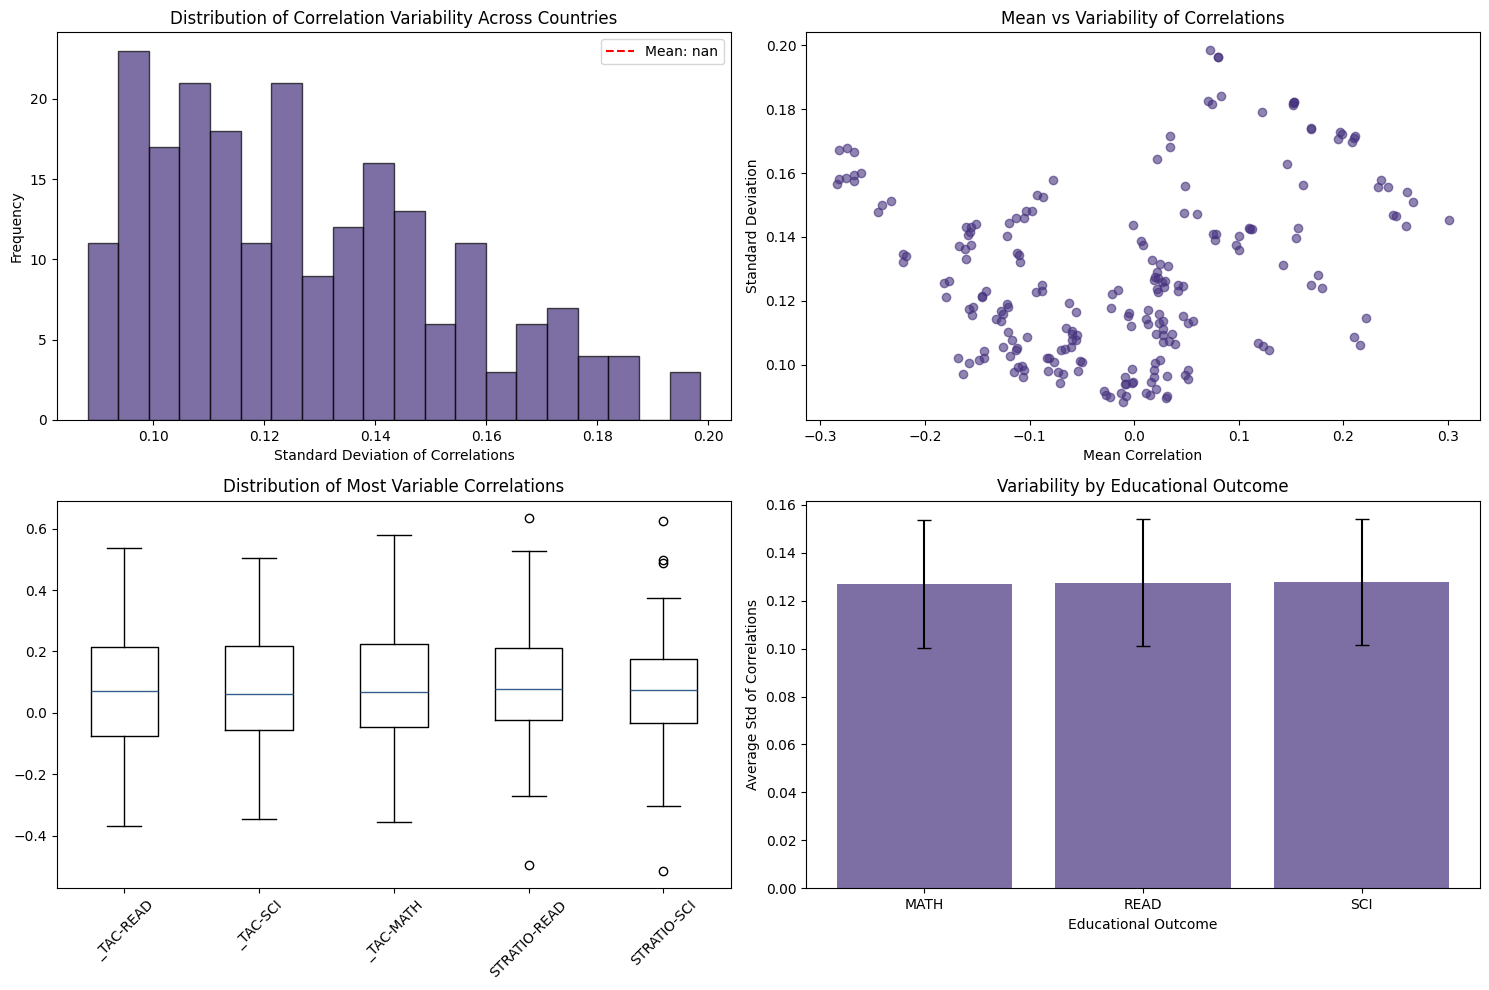


CONCLUSION:
There is NO meaningful country dependency in correlation patterns.
Effect size: nanx a small correlation difference


In [109]:
results = test_correlation_variance_across_countries(df)

There is no meaningful difference between correlation patterns across different countries.

## 2 - Investigate

*What operational factors drive success? Where are bottlenecks?*

In [44]:
prompt = task + role + f""" We have a dataset of a variety of factors that can impact educational outcomes and the outcomes, MATH, READ, and SCI; the dataset has the following fields: {', '.join(df.columns)}.
From data exploration that focused on correlations, we have the following hypotheses:
The main factors impacting educational outcomes might be:
a. Access to technology
b. Educational materials
c. Number of teachers
Now we need to build a model to predict the impact of the investment on the outcome and answer two questions:
1. What operational factors drive success?
2. Where are bottlenecks?"""

response = model.generate_content(prompt)
print(response.text)

Let's address the challenge of optimizing the $50M education investment using an operational excellence lens.  We'll focus on building a model and interpreting it to identify operational drivers of success and bottlenecks.

**1. Data Preprocessing and Feature Engineering:**

* **Variable Selection:** Given the hypotheses regarding access to technology, educational materials, and the number of teachers, we'll start by selecting relevant variables.  These might include:
    * **Technology Access:** `SC037Q01TA` to `SC037Q09TA` (questions related to computer availability and usage)
    * **Educational Materials:** `SC004Q05NA` to `SC004Q07NA` (textbooks, workbooks), potentially others related to school resources.
    * **Number of Teachers:** `TOTAT` (total teaching staff), `STRATIO` (student-teacher ratio), potentially `EDUSHORT` (teacher shortage).
    * **Outcome Variables:** `MATH`, `READ`, `SCI`.
    * **Control Variables:**  Important to include other factors that could influence ou

*Some of the recommendations Gemini provided had already been applied, e.g., feature engineering.*

*Due to the nature of the dataset, i.e., schools in different countries and regions, it will not be appropriate to follow this recommendation. We will rely on BigQuery handling missing data.*

Considering Gemini recommendations above, we will build and test two models:

1. **Linear regression with Lasso (L1) regularization**

  While basic Linear regression seems to be a decent choice for our case, it is pront to overfitting, so regularization is in order. L1 regularization is preferred in our case, as we are concerned with feature selection, and L1 can drive coefficients to zero; L2 (Ridge), on the other hand, always keeps the coefficients, so it can muddle the picture.

2. **Random Forest**

  This technique is less prone to overfitting than Gradient Boosting. It provides clear, stable, and reliable importance rankings, which is what we are looking for.

In [54]:
BQ_TABLE = 'pisa_data'

In [59]:
# Features that will not be used for prediction
no_use_features = ['CNT', 'CNTRYID', 'CNTSCHID', 'CYC', 'year']

In [60]:
labels = ['math', 'read', 'sci']

In [65]:
# Get features
table_ref = client.dataset(BQ_DATASET).table(BQ_TABLE)
table = client.get_table(table_ref)
all_columns = [field.name for field in table.schema]

# Create a list of features to use in the model by excluding labels and other unwanted columns
all_excluded_columns = set(labels + no_use_features)
feature_columns = [col for col in all_columns if col not in all_excluded_columns]

# Create the column selection string for the SQL query
columns_string_base = ', '.join(feature_columns)
print(columns_string_base)

SC001Q01TA, SC013Q01TA, SC002Q01TA, SC002Q02TA, SC018Q01TA01, SC018Q01TA02, SC018Q02TA01, SC018Q02TA02, SC012Q04TA, SC012Q05TA, SC012Q06TA, SC004Q05NA, SC004Q06NA, SC004Q07NA, SC037Q01TA, SC037Q02TA, SC037Q03TA, SC037Q04TA, SC037Q05NA, SC037Q06NA, SC037Q07TA, SC037Q08TA, SC037Q09TA, SC025Q01NA, SC017Q01NA, SC017Q02NA, SC017Q03NA, SC017Q04NA, SC017Q05NA, SC017Q06NA, SC017Q07NA, SC017Q08NA, SC061Q01TA, SC061Q02TA, SC061Q03TA, SC061Q04TA, SC061Q05TA, SC061Q06TA, SC061Q07TA, SC061Q08TA, SC061Q09TA, SC061Q10TA, SC064Q01TA, SC064Q02TA, SC064Q04NA, SC064Q03TA, SC003Q01TA, SC053Q01TA, SC053Q02TA, SC053Q03TA, SC053Q04TA, SC053Q09TA, SC053Q10TA, SC042Q01TA, SC042Q02TA, SCHSIZE, TOTAT, PROATCE, STRATIO, RATCMP1, RATCMP2, STAFFSHORT, EDUSHORT, STUBEHA, TEACHBEHA, CLSIZE, CREACTIV


### ML Analysis

#### Linear Regression with Lasso (L1) Regularization

In [66]:
MODEL_NAME_PREFIX = 'pisa_reg_lasso_model' # will create three models: for MATH, READ, and SCI

In [84]:
import time

We will use BigQuery ML's hyperparameter tuning feature to automatically find the optimal regularization value and optimize for the highest percentage of the target value, i.e., educational outcomes, explained ($r^2$).

In [86]:
for label in labels:
    model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"
    columns_string_for_model = f"{label}, {columns_string_base}"

    create_model_query = f"""
    CREATE OR REPLACE MODEL
      `{PROJECT_ID}.{BQ_DATASET}.{model_name}`
    OPTIONS(
      model_type='linear_reg',
      input_label_cols=['{label}'],
      num_trials=5,
      hparam_tuning_objectives=['r2_score'],
      l1_reg=HPARAM_RANGE(0.01, 1.0)
    ) AS
    SELECT
      {columns_string_for_model}
    FROM
      `{PROJECT_ID}.{BQ_DATASET}.{BQ_TABLE}`
    WHERE
      {label} IS NOT NULL
    """

    print(f"\nCreating and training the model for label: {label}...")

    max_retries = 3
    retries = 0
    while retries < max_retries:
        try:
            create_job = client.query(create_model_query)
            create_job.result()  # Wait for the job to complete
            print(f"Model `{PROJECT_ID}.{BQ_DATASET}.{model_name}` created and trained successfully.")
            break # Exit the while loop on success
        except Exception as e:
            if "Model can not be updated by multiple create model query jobs at the same time" in str(e) and retries < max_retries - 1:
                retries += 1
                print(f"  Transient error detected. Retrying in 10 seconds... (Retry {retries}/{max_retries-1})")
                time.sleep(20)
            else:
                print(f"  An error occurred while creating model for label {label}: {e}")
                raise # Re-raise the exception if it's not the specific one we're handling or we've run out of retries
    if retries == max_retries:
        print(f"Failed to create model for label {label} after {max_retries} attempts.")



Creating and training the model for label: math...
Model `mgmt599-dn3-final-project.edu.pisa_reg_lasso_model_math` created and trained successfully.

Creating and training the model for label: read...
Model `mgmt599-dn3-final-project.edu.pisa_reg_lasso_model_read` created and trained successfully.

Creating and training the model for label: sci...
Model `mgmt599-dn3-final-project.edu.pisa_reg_lasso_model_sci` created and trained successfully.


In [87]:
# Evaluate the models
print("\n--- Evaluating Models ---")
for label in labels:
    model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"
    evaluate_query = f"""
    SELECT
      *
    FROM
      ML.EVALUATE(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`)
    """
    evaluate_job = client.query(evaluate_query)
    evaluation_results = evaluate_job.result()
    print(f"\nEvaluation for Model: `{model_name}` (Label: {label})")

    for row in evaluation_results:
      print(f"  Mean Absolute Error: {row.mean_absolute_error:.2f}")
      print(f"  Mean Squared Error: {row.mean_squared_error:.2f}")
      print(f"  R-squared: {row.r2_score:.2f}")


--- Evaluating Models ---

Evaluation for Model: `pisa_reg_lasso_model_math` (Label: math)
  Mean Absolute Error: 46.68
  Mean Squared Error: 3624.90
  R-squared: 0.35

Evaluation for Model: `pisa_reg_lasso_model_read` (Label: read)
  Mean Absolute Error: 49.06
  Mean Squared Error: 3743.13
  R-squared: 0.36

Evaluation for Model: `pisa_reg_lasso_model_sci` (Label: sci)
  Mean Absolute Error: 45.58
  Mean Squared Error: 3243.20
  R-squared: 0.38


The variance explained by the models for reading, math, and sciences scores ranges from 35% to 38%. While this is generally considered low, for predicting educational outcomes, this is decent, given the variety of unaccounted factors involved.

Now we will create predictions and vizualize predicted vs actual values for MATH, READ, and SCI:


--- Generating Visualization Charts ---

Creating scatter plot for math...


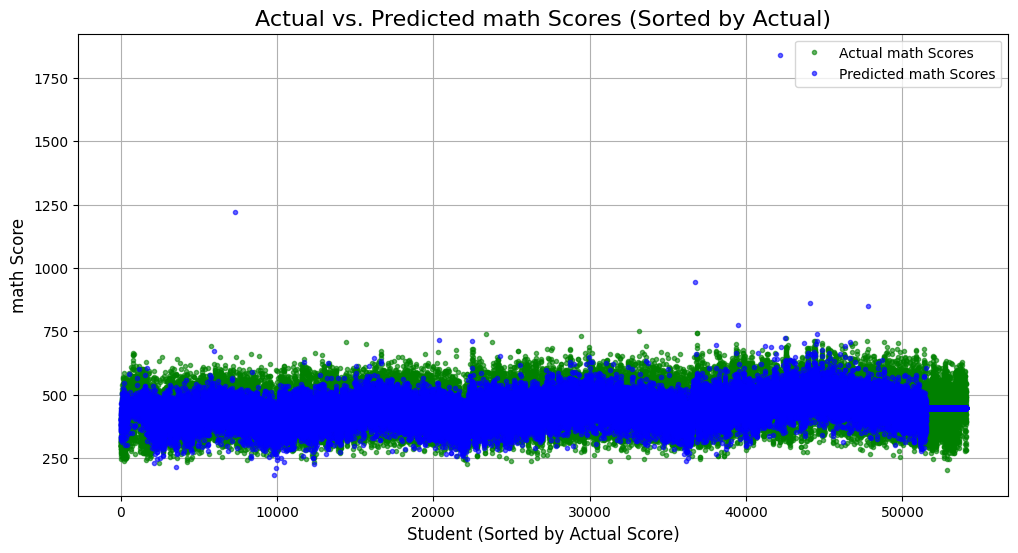


Creating scatter plot for read...


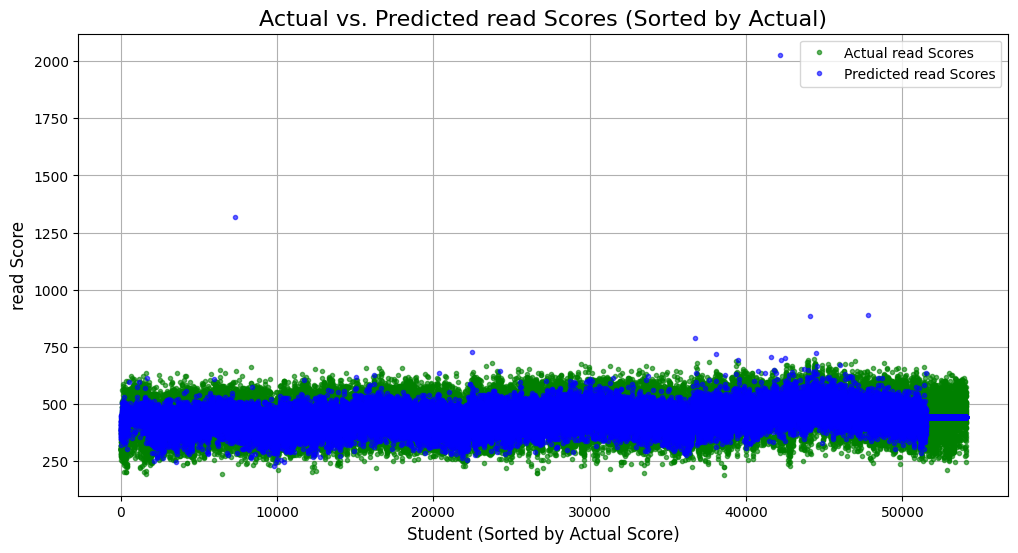


Creating scatter plot for sci...


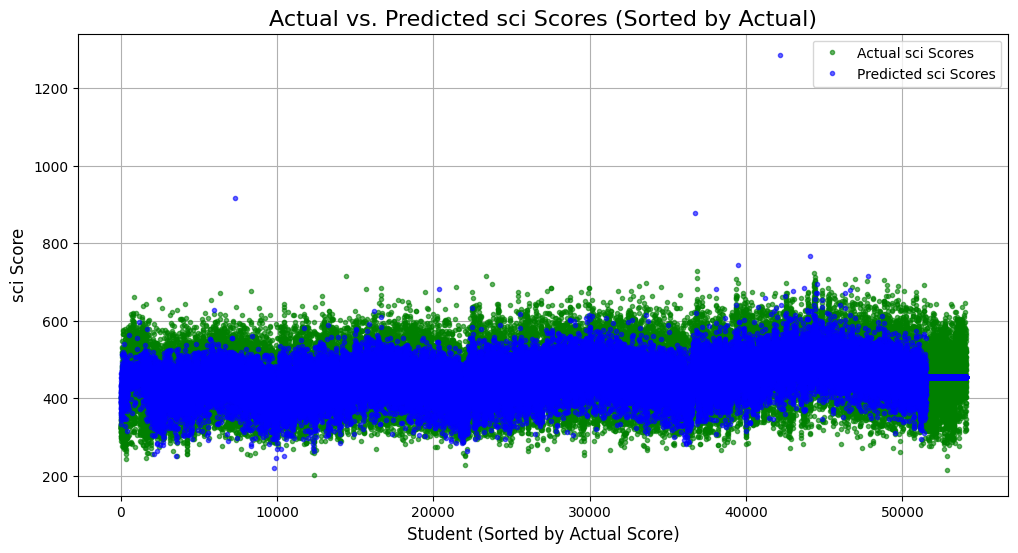

In [88]:
print("\n--- Generating Visualization Charts ---")
for label in labels:
    model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"

    # We query for both the actual label and the predicted label
    visualization_query = f"""
    SELECT
      {label},
      predicted_{label.lower()}
    FROM
      ML.PREDICT(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`,
        (SELECT
          {label},
          {columns_string_base}
        FROM
          `{PROJECT_ID}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE
          {label} IS NOT NULL))
    """

    print(f"\nCreating scatter plot for {label}...")

    # Fetch data into a Pandas DataFrame
    query_job = client.query(visualization_query)
    df = query_job.to_dataframe()

    # Sort the DataFrame by the actual score
    df = df.sort_values(by=label)

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[label], 'o', color='green', label=f'Actual {label} Scores', alpha=0.6, markersize=3)
    plt.plot(df.index, df[f"predicted_{label.lower()}"], 'o', color='blue', label=f'Predicted {label} Scores', alpha=0.6, markersize=3)

    plt.title(f'Actual vs. Predicted {label} Scores (Sorted by Actual)', fontsize=16)
    plt.xlabel('Student (Sorted by Actual Score)', fontsize=12)
    plt.ylabel(f'{label} Score', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

As we can see, the models have a decent level of prediction when general rather than individual success is concerned.

Next, let's see what are the contributing factors:

In [118]:
# Quick way to check trial info
def show_trial_info():
    model_name = f"{MODEL_NAME_PREFIX}_math"  # Check the math model first

    query = f"""
    SELECT *
    FROM ML.TRIAL_INFO(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`)
    ORDER BY trial_id
    """

    job = client.query(query)
    results = job.result()

    # Show columns
    columns = [field.name for field in results.schema]
    print(f"Available columns: {columns}")

    # Show all trial data
    print("\nAll trials:")
    for row in results:
        print(dict(row))

# Run this first
show_trial_info()

Available columns: ['trial_id', 'hyperparameters', 'hparam_tuning_evaluation_metrics', 'training_loss', 'eval_loss', 'status', 'error_message', 'is_optimal']

All trials:
{'trial_id': 1, 'hyperparameters': {'l1_reg': 0.01}, 'hparam_tuning_evaluation_metrics': {'r2_score': 0.31894804163836343}, 'training_loss': 3457.5181048080385, 'eval_loss': 3716.5698593920224, 'status': 'SUCCEEDED', 'error_message': None, 'is_optimal': False}
{'trial_id': 2, 'hyperparameters': {'l1_reg': 0.028840311006096568}, 'hparam_tuning_evaluation_metrics': {'r2_score': 0.31894805084174094}, 'training_loss': 3457.5180626165898, 'eval_loss': 3716.569809168241, 'status': 'SUCCEEDED', 'error_message': None, 'is_optimal': False}
{'trial_id': 3, 'hyperparameters': {'l1_reg': 0.0929904401282224}, 'hparam_tuning_evaluation_metrics': {'r2_score': 0.3189480821786028}, 'training_loss': 3457.517918957783, 'eval_loss': 3716.5696381598073, 'status': 'SUCCEEDED', 'error_message': None, 'is_optimal': False}
{'trial_id': 4, 'hy

In [125]:
def get_best_trial_weights(model_name):
    """
    Get feature weights from the best trial (highest R²) for a model.
    """
    query = f"""
    WITH best_trial AS (
      SELECT trial_id
      FROM ML.TRIAL_INFO(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`)
      ORDER BY hparam_tuning_evaluation_metrics.r2_score DESC
      LIMIT 1
    )
    SELECT
      w.processed_input as feature,
      w.weight
    FROM ML.WEIGHTS(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`) w
    JOIN best_trial b ON w.trial_id = b.trial_id
    WHERE w.processed_input IS NOT NULL
    ORDER BY ABS(w.weight) DESC
    """

    job = client.query(query)
    results = job.result()

    return pd.DataFrame([
        {"feature": row.feature, "weight": row.weight}
        for row in results
    ])

def calculate_feature_contributions(weights_df, r2_score):
    """
    Calculate contribution of each feature to explained variance.
    """
    weights_df['abs_weight'] = np.abs(weights_df['weight'])
    total_abs_weight = weights_df['abs_weight'].sum()
    weights_df['relative_contribution'] = weights_df['abs_weight'] / total_abs_weight
    weights_df['explained_variance_contribution'] = weights_df['relative_contribution'] * r2_score

    return weights_df.sort_values('explained_variance_contribution', ascending=False)

def get_feature_names(contributions_df, codebooks_df):
    """
    Add field names from codebooks_df to the contributions dataframe.
    """
    # Merge with codebooks to get field names
    contributions_with_names = contributions_df.merge(
        codebooks_df[['field_id', 'field_name']],
        left_on='feature',
        right_on='field_id',
        how='left'
    )

    # Fill missing field names with the feature ID
    contributions_with_names['field_name'] = contributions_with_names['field_name'].fillna(contributions_with_names['feature'])

    return contributions_with_names

def analyze_models():
    """
    Analyze feature importance for all models using best trials only.
    Returns dictionary with model results and top 10 features DataFrames.
    """
    model_performance = {
        'math': 0.35,
        'read': 0.36,
        'sci': 0.38
    }

    results = {}
    top_features_dict = {}

    for label in labels:
        model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"
        r2_score = model_performance[label]

        print(f"Analyzing {label.upper()} model...")

        # Get weights from best trial
        weights_df = get_best_trial_weights(model_name)

        if not weights_df.empty:
            # Calculate contributions
            contributions_df = calculate_feature_contributions(weights_df, r2_score)

            # Add field names from codebooks
            contributions_with_names = get_feature_names(contributions_df, codebooks_df)

            # Get top 10 features for DataFrame
            top_10 = contributions_with_names.head(10).copy()
            top_features_df = pd.DataFrame({
                'field_id': top_10['feature'],
                'field_name': top_10['field_name'],
                'weight': top_10['weight'],
                'contribution': top_10['explained_variance_contribution']
            })

            # Store results
            results[label] = {
                'contributions_df': contributions_with_names,
                'r2_score': r2_score
            }
            top_features_dict[label] = top_features_df

            # Show top 10 features with names
            print(f"Top 10 features for {label.upper()}:")
            for i, (_, row) in enumerate(contributions_with_names.head(10).iterrows(), 1):
                pct = (row['explained_variance_contribution'] / r2_score) * 100
                feature_display = f"{row['feature']} ({row['field_name']})" if row['feature'] != row['field_name'] else row['feature']
                print(f"  {i:2d}. {feature_display:<50} Weight: {row['weight']:8.4f} Contrib: {pct:5.1f}%")
        else:
            print(f"No weights found for {label.upper()} model")
            results[label] = {'contributions_df': pd.DataFrame(), 'r2_score': r2_score}
            top_features_dict[label] = pd.DataFrame(columns=['field_id', 'field_name', 'weight', 'contribution'])

        print()

    return results, top_features_dict

def create_pie_charts(model_results, top_n=8):
    """
    Create pie charts showing feature contributions and unexplained variance.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    colors = plt.cm.Set3(np.linspace(0, 1, top_n))

    for idx, (label, results) in enumerate(model_results.items()):
        ax = axes[idx]
        contributions_df = results['contributions_df']
        r2_score = results['r2_score']

        if contributions_df.empty:
            ax.text(0.5, 0.5, f'No data\navailable', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{label.upper()} Model\nR² = {r2_score:.3f}')
            continue

        # Get top features
        top_features = contributions_df.head(top_n)

        # Prepare pie chart data
        feature_contributions = top_features['explained_variance_contribution'].tolist()
        feature_names = [name[:12] + '...' if len(name) > 12 else name for name in top_features['feature']]

        explained_by_top = sum(feature_contributions)
        other_explained = max(0, r2_score - explained_by_top)
        unexplained = 1 - r2_score

        # Build pie chart
        pie_values = feature_contributions.copy()
        pie_labels = feature_names.copy()
        pie_colors = colors[:len(feature_contributions)].tolist()

        if other_explained > 0.01:
            pie_values.append(other_explained)
            pie_labels.append('Other Features')
            pie_colors.append('#D3D3D3')

        pie_values.append(unexplained)
        pie_labels.append(f'Unexplained\n({unexplained:.1%})')
        pie_colors.append('#808080')

        # Create pie chart
        ax.pie(pie_values, labels=pie_labels, colors=pie_colors,
               autopct=lambda pct: f'{pct:.1f}%' if pct > 3 else '',
               startangle=90)

        ax.set_title(f'{label.upper()} Model\nR² = {r2_score:.3f}', fontweight='bold')

    plt.suptitle('Feature Contributions to Model Performance', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def create_bar_charts(model_results):
    """
    Create horizontal bar charts showing feature importance.
    """
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    for idx, (label, results) in enumerate(model_results.items()):
        ax = axes[idx]
        contributions_df = results['contributions_df']
        r2_score = results['r2_score']

        if contributions_df.empty:
            ax.text(0.5, 0.5, f'No data available', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{label.upper()} Model')
            continue

        # Top 15 features
        top_features = contributions_df.head(15)

        y_pos = np.arange(len(top_features))
        bars = ax.barh(y_pos, top_features['explained_variance_contribution'],
                      color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))

        ax.set_yticks(y_pos)
        ax.set_yticklabels([name[:30] for name in top_features['feature']])
        ax.invert_yaxis()
        ax.set_xlabel('Contribution to Explained Variance')
        ax.set_title(f'{label.upper()} Model - Feature Importance (R² = {r2_score:.3f})', fontweight='bold')

        # Add value labels
        for bar, value in zip(bars, top_features['explained_variance_contribution']):
            if value > 0.005:
                ax.text(value + 0.001, bar.get_y() + bar.get_height()/2,
                       f'{value:.3f}', va='center', fontsize=9)

        # Add R² line
        ax.axvline(x=r2_score, color='red', linestyle='--', alpha=0.7,
                  label=f'Total R² = {r2_score:.3f}')
        ax.legend()

    plt.tight_layout()
    plt.show()

Feature Importance Analysis - Best Trials Only

Analyzing MATH model...
Top 10 features for MATH:
   1. __INTERCEPT__                                      Weight: 389.8677 Contrib:  63.1%
   2. RATCMP2 (2015: Proportion of available computers that are connected to the Internet; 2018: Proportion of available computers that are connected to the Internet; 2022: Computers connected to the Internet) Weight:  43.9729 Contrib:   7.1%
   3. PROATCE (2015: Index proportion of all teachers fully certified; 2018: Index proportion of all teachers fully certified; 2022: Proportion of all teachers fully certified) Weight:  18.9791 Contrib:   3.1%
   4. SC053Q01TA (2015: <This academic year>,follow. activities\school offers<national modal grade for 15-year-olds>? Band, orchestra\choir; 2018: <This academic year>, activities offered to <national modal grade for 15-year-olds>: Band, orchestra or choir; 2022: Does school offer this school yr: Band, orchestra or choir) Weight: -14.2381 Contrib:   2.3%
  

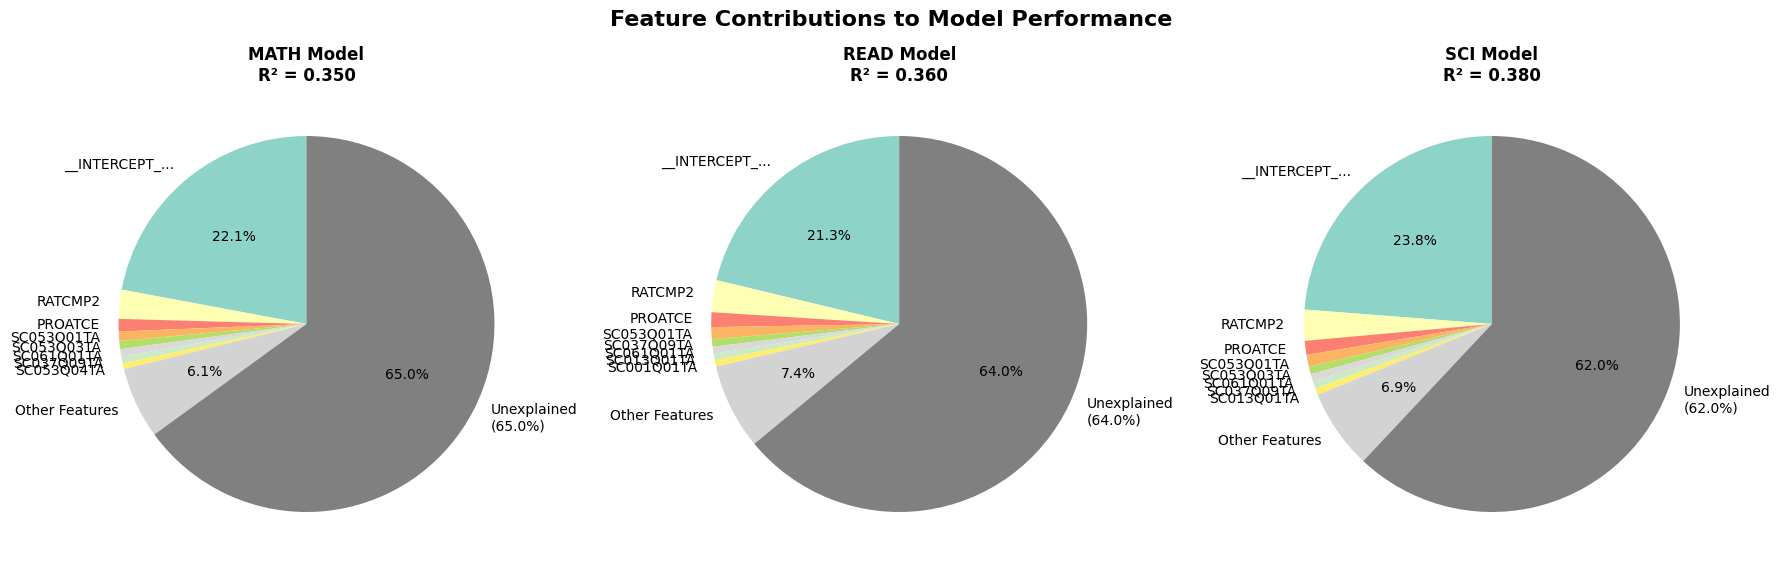

Creating bar charts...


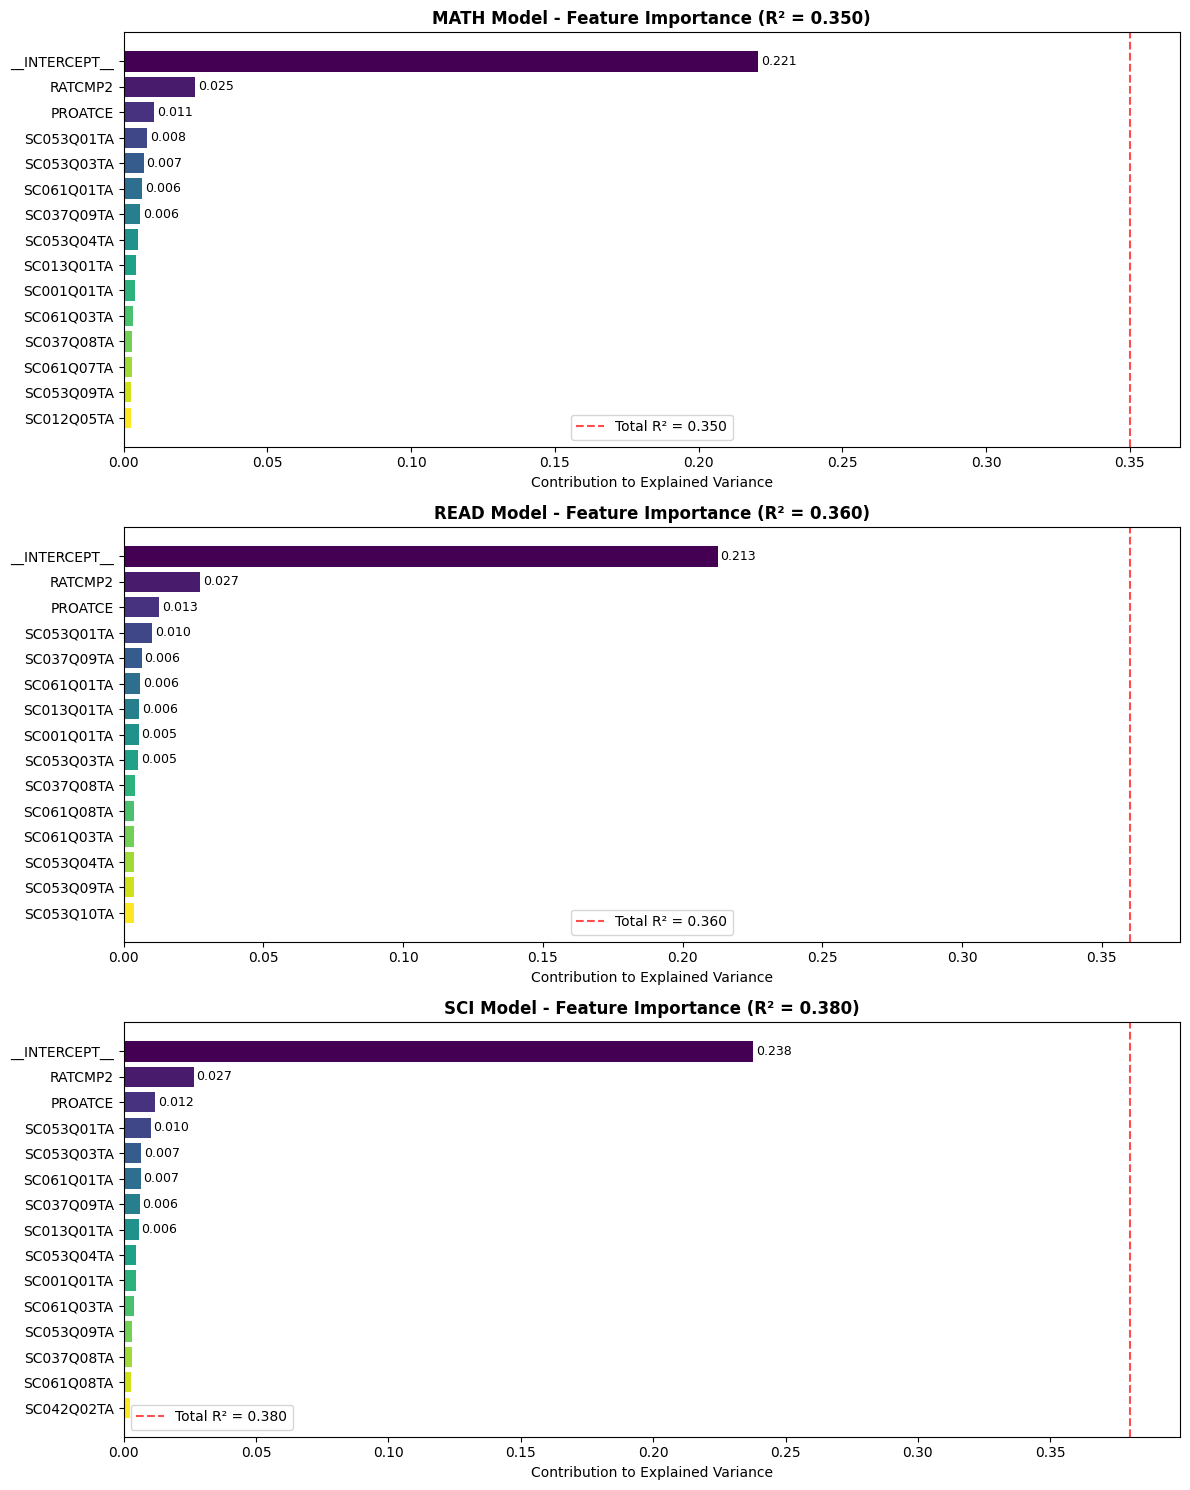


Summary:
MATH: Top feature '__INTERCEPT__' contributes 63.1% of explained variance
READ: Top feature '__INTERCEPT__' contributes 59.0% of explained variance
SCI: Top feature '__INTERCEPT__' contributes 62.6% of explained variance

Top 10 Features DataFrames created:
Access with: top_features_dfs['math'], top_features_dfs['read'], top_features_dfs['sci']

Example - Top 10 features for MATH model:
        field_id  \
0  __INTERCEPT__   
1        RATCMP2   
2        PROATCE   
3     SC053Q01TA   
4     SC053Q03TA   
5     SC061Q01TA   
6     SC037Q09TA   
7     SC053Q04TA   
8     SC013Q01TA   
9     SC001Q01TA   

                                                                                                                                                                                                                                                                                                                                                                                         fi

In [126]:
# Run the analysis
print("Feature Importance Analysis - Best Trials Only\n")

# Analyze models - now returns both results and top features DataFrames
model_results, top_features_dfs = analyze_models()

# Create visualizations
if any(not results['contributions_df'].empty for results in model_results.values()):
    print("Creating pie charts...")
    create_pie_charts(model_results)

    print("Creating bar charts...")
    create_bar_charts(model_results)

    print("\nSummary:")
    for label, results in model_results.items():
        if not results['contributions_df'].empty:
            top_feature = results['contributions_df'].iloc[0]
            contrib_pct = (top_feature['explained_variance_contribution'] / results['r2_score']) * 100
            print(f"{label.upper()}: Top feature '{top_feature['feature']}' contributes {contrib_pct:.1f}% of explained variance")

    print("\nTop 10 Features DataFrames created:")
    print("Access with: top_features_dfs['math'], top_features_dfs['read'], top_features_dfs['sci']")

    # Example: Show the math DataFrame
    print(f"\nExample - Top 10 features for MATH model:")
    print(top_features_dfs['math'])

else:
    print("No feature data available.")

For all three outcome indicators, the three highest contributing features are:
* RATCMP2 Proportion of available **computers that are connected to the Internet**
* PROATCE Index proportion of all **teachers fully certified**
* SC053Q01TA **Band and orchestra\choir** offered by the school

While they explain only a small proportion of the variance in the indicators, this is expected: there are plethjora of factors that impact educaitonal performance, many of which we cannot account for or influence. But even making a small dent is worth it.

#### Random Forest

In [132]:
MODEL_NAME_PREFIX = 'pisa_rand_forest_model' # will create three models: for MATH, READ, and SCI

In [134]:
# Create Random Forest models for math, read, and sci
for label in labels:
    model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"
    columns_string_for_model = f"{label}, {columns_string_base}"

    create_model_query = f"""
    CREATE OR REPLACE MODEL
      `{PROJECT_ID}.{BQ_DATASET}.{model_name}`
    OPTIONS(
      model_type='random_forest_regressor',
      input_label_cols=['{label}'],
      num_trials=5,
      hparam_tuning_objectives=['r2_score'],
      max_tree_depth=HPARAM_RANGE(5, 15),
      num_parallel_tree=HPARAM_RANGE(50, 200),
      subsample=HPARAM_RANGE(0.6, 0.99),
      min_tree_child_weight=HPARAM_RANGE(1, 10)
    ) AS
    SELECT
      {columns_string_for_model}
    FROM
      `{PROJECT_ID}.{BQ_DATASET}.{BQ_TABLE}`
    WHERE
      {label} IS NOT NULL
    """

    print(f"\nCreating and training Random Forest model for label: {label}...")

    max_retries = 3
    retries = 0
    while retries < max_retries:
        try:
            create_job = client.query(create_model_query)
            create_job.result()  # Wait for the job to complete
            print(f"Random Forest model `{PROJECT_ID}.{BQ_DATASET}.{model_name}` created and trained successfully.")
            break # Exit the while loop on success
        except Exception as e:
            if "Model can not be updated by multiple create model query jobs at the same time" in str(e) and retries < max_retries - 1:
                retries += 1
                print(f"  Transient error detected. Retrying in 20 seconds... (Retry {retries}/{max_retries-1})")
                time.sleep(20)
            else:
                print(f"  An error occurred while creating Random Forest model for label {label}: {e}")
                raise # Re-raise the exception if it's not the specific one we're handling or we've run out of retries
    if retries == max_retries:
        print(f"Failed to create Random Forest model for label {label} after {max_retries} attempts.")

print("\nAll Random Forest models created successfully!")


Creating and training Random Forest model for label: math...
Random Forest model `mgmt599-dn3-final-project.edu.pisa_rand_forest_model_math` created and trained successfully.

Creating and training Random Forest model for label: read...
Random Forest model `mgmt599-dn3-final-project.edu.pisa_rand_forest_model_read` created and trained successfully.

Creating and training Random Forest model for label: sci...
Random Forest model `mgmt599-dn3-final-project.edu.pisa_rand_forest_model_sci` created and trained successfully.

All Random Forest models created successfully!


In [135]:
# Evaluate the models
print("\n--- Evaluating Models ---")
for label in labels:
    model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"
    evaluate_query = f"""
    SELECT
      *
    FROM
      ML.EVALUATE(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`)
    """
    evaluate_job = client.query(evaluate_query)
    evaluation_results = evaluate_job.result()
    print(f"\nEvaluation for Model: `{model_name}` (Label: {label})")

    for row in evaluation_results:
      print(f"  Mean Absolute Error: {row.mean_absolute_error:.2f}")
      print(f"  Mean Squared Error: {row.mean_squared_error:.2f}")
      print(f"  R-squared: {row.r2_score:.2f}")


--- Evaluating Models ---

Evaluation for Model: `pisa_rand_forest_model_math` (Label: math)
  Mean Absolute Error: 44.21
  Mean Squared Error: 3165.05
  R-squared: 0.44
  Mean Absolute Error: 44.20
  Mean Squared Error: 3156.78
  R-squared: 0.44
  Mean Absolute Error: 44.26
  Mean Squared Error: 3169.32
  R-squared: 0.44
  Mean Absolute Error: 44.56
  Mean Squared Error: 3215.18
  R-squared: 0.43
  Mean Absolute Error: 44.65
  Mean Squared Error: 3237.72
  R-squared: 0.42

Evaluation for Model: `pisa_rand_forest_model_read` (Label: read)
  Mean Absolute Error: 47.34
  Mean Squared Error: 3500.37
  R-squared: 0.41
  Mean Absolute Error: 47.25
  Mean Squared Error: 3486.46
  R-squared: 0.41
  Mean Absolute Error: 47.28
  Mean Squared Error: 3489.35
  R-squared: 0.41
  Mean Absolute Error: 47.25
  Mean Squared Error: 3486.99
  R-squared: 0.41
  Mean Absolute Error: 47.30
  Mean Squared Error: 3494.10
  R-squared: 0.41

Evaluation for Model: `pisa_rand_forest_model_sci` (Label: sci)
  Me

The explained variance ($r^2$) for the Random Forest models is higher than for the Linear Regression models: 41% to 44%.

Now let's make prediciotns based on the best trial for each model and visualize them vs the actual values:


--- Generating Visualization Charts ---

Creating scatter plot for math...


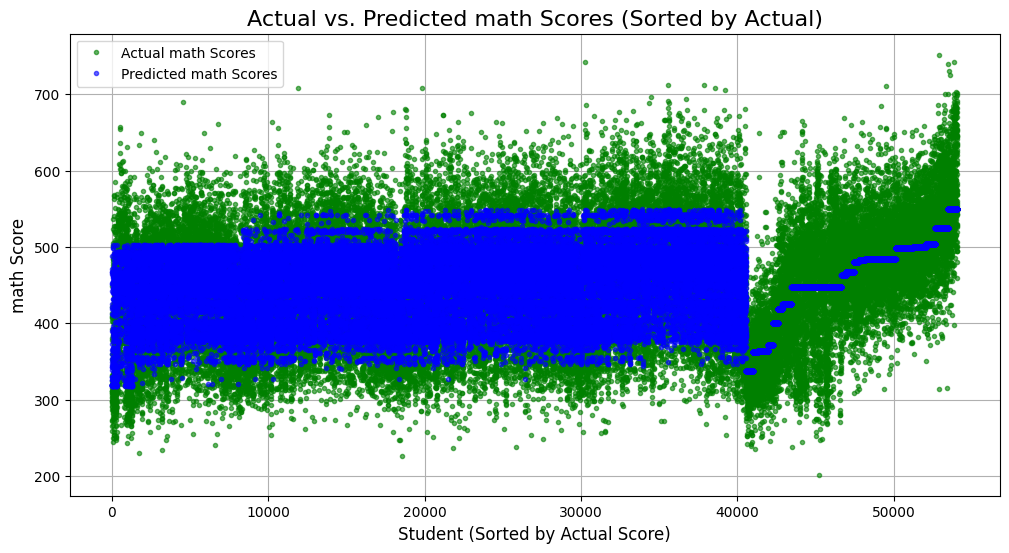


Creating scatter plot for read...


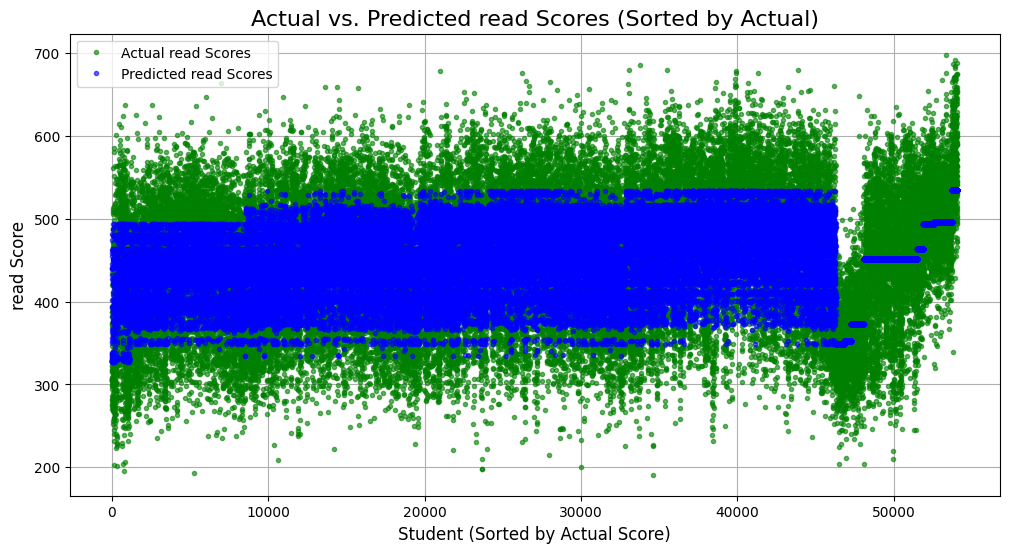


Creating scatter plot for sci...


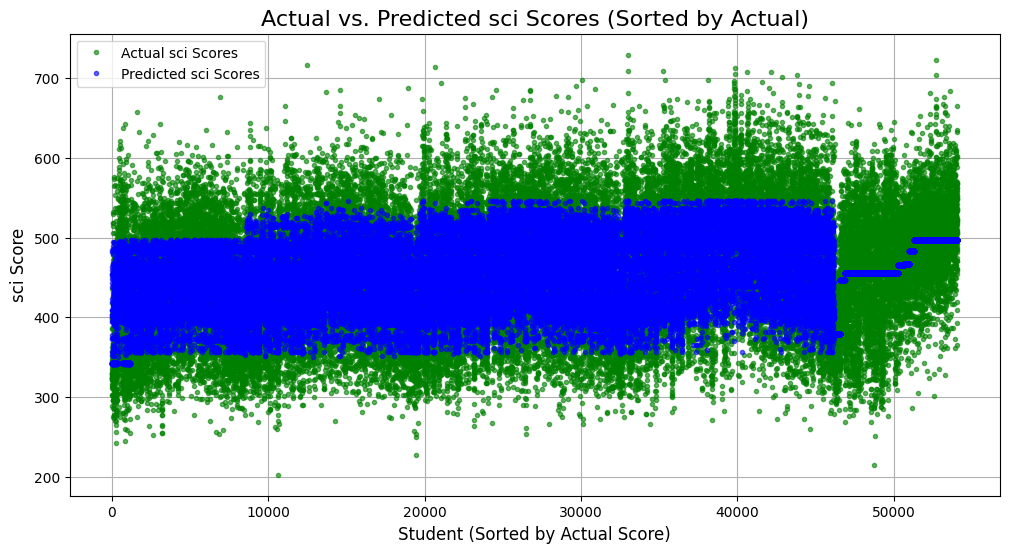

In [136]:
print("\n--- Generating Visualization Charts ---")
for label in labels:
    model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"

    # We query for both the actual label and the predicted label
    visualization_query = f"""
    SELECT
      {label},
      predicted_{label.lower()}
    FROM
      ML.PREDICT(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`,
        (SELECT
          {label},
          {columns_string_base}
        FROM
          `{PROJECT_ID}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE
          {label} IS NOT NULL))
    """

    print(f"\nCreating scatter plot for {label}...")

    # Fetch data into a Pandas DataFrame
    query_job = client.query(visualization_query)
    df = query_job.to_dataframe()

    # Sort the DataFrame by the actual score
    df = df.sort_values(by=label)

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[label], 'o', color='green', label=f'Actual {label} Scores', alpha=0.6, markersize=3)
    plt.plot(df.index, df[f"predicted_{label.lower()}"], 'o', color='blue', label=f'Predicted {label} Scores', alpha=0.6, markersize=3)

    plt.title(f'Actual vs. Predicted {label} Scores (Sorted by Actual)', fontsize=16)
    plt.xlabel('Student (Sorted by Actual Score)', fontsize=12)
    plt.ylabel(f'{label} Score', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

As we can see, the models have a decent level of prediction when general rather than individual success is concerned. The patterm is similar to that of the predictions generated by the Linear Regression models: the predictions are more concentrated than the actual values but follow the general pattern.

Next, let's see what are the contributing factors:

In [138]:
def get_best_trial_feature_importance_rf(model_name):
    """
    Get feature importance from the best trial (highest R²) for a Random Forest model.
    """
    query = f"""
    WITH best_trial AS (
      SELECT trial_id
      FROM ML.TRIAL_INFO(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`)
      ORDER BY hparam_tuning_evaluation_metrics.r2_score DESC
      LIMIT 1
    )
    SELECT
      fi.feature,
      fi.importance_weight,
      fi.importance_gain
    FROM ML.FEATURE_IMPORTANCE(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`) fi
    JOIN best_trial b ON fi.trial_id = b.trial_id
    WHERE fi.feature IS NOT NULL
    ORDER BY fi.importance_weight DESC
    """

    job = client.query(query)
    results = job.result()

    return pd.DataFrame([
        {"feature": row.feature, "importance_weight": row.importance_weight, "importance_gain": row.importance_gain}
        for row in results
    ])

def calculate_feature_contributions_rf(importance_df, r2_score):
    """
    Calculate contribution of each feature to explained variance for Random Forest.
    """
    if importance_df.empty:
        return pd.DataFrame()

    # Use importance_weight as the base metric
    total_importance = importance_df['importance_weight'].sum()
    importance_df['relative_contribution'] = importance_df['importance_weight'] / total_importance
    importance_df['explained_variance_contribution'] = importance_df['relative_contribution'] * r2_score

    return importance_df.sort_values('explained_variance_contribution', ascending=False)

def get_feature_names_rf(contributions_df, codebooks_df):
    """
    Add field names from codebooks_df to the contributions dataframe.
    """
    # Merge with codebooks to get field names
    contributions_with_names = contributions_df.merge(
        codebooks_df[['field_id', 'field_name']],
        left_on='feature',
        right_on='field_id',
        how='left'
    )

    # Fill missing field names with the feature ID
    contributions_with_names['field_name'] = contributions_with_names['field_name'].fillna(contributions_with_names['feature'])

    return contributions_with_names

def get_rf_model_r2(model_name):
    """
    Get the R² score from the best trial of a Random Forest model.
    """
    query = f"""
    SELECT hparam_tuning_evaluation_metrics.r2_score as r2_score
    FROM ML.TRIAL_INFO(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`)
    ORDER BY hparam_tuning_evaluation_metrics.r2_score DESC
    LIMIT 1
    """

    job = client.query(query)
    results = job.result()

    for row in results:
        return row.r2_score
    return 0.0

def analyze_rf_models():
    """
    Analyze feature importance for Random Forest models using best trials only.
    Returns dictionary with model results and top 10 features DataFrames.
    """
    results = {}
    top_features_dict = {}

    for label in labels:
        model_name = f"{MODEL_NAME_PREFIX}_{label.lower()}"  # This should be your RF model prefix

        print(f"Analyzing Random Forest {label.upper()} model...")

        # Get R² score from best trial
        r2_score = get_rf_model_r2(model_name)
        print(f"Best trial R² score: {r2_score:.4f}")

        # Get feature importance from best trial
        importance_df = get_best_trial_feature_importance_rf(model_name)

        if not importance_df.empty:
            # Calculate contributions
            contributions_df = calculate_feature_contributions_rf(importance_df, r2_score)

            # Add field names from codebooks
            contributions_with_names = get_feature_names_rf(contributions_df, codebooks_df)

            # Get top 10 features for DataFrame
            top_10 = contributions_with_names.head(10).copy()
            top_features_df = pd.DataFrame({
                'field_id': top_10['feature'],
                'field_name': top_10['field_name'],
                'importance_weight': top_10['importance_weight'],
                'importance_gain': top_10['importance_gain'],
                'contribution': top_10['explained_variance_contribution']
            })

            # Store results
            results[label] = {
                'contributions_df': contributions_with_names,
                'r2_score': r2_score
            }
            top_features_dict[label] = top_features_df

            # Show top 10 features with names
            print(f"Top 10 features for Random Forest {label.upper()}:")
            for i, (_, row) in enumerate(contributions_with_names.head(10).iterrows(), 1):
                pct = (row['explained_variance_contribution'] / r2_score) * 100
                feature_display = f"{row['feature']} ({row['field_name']})" if row['feature'] != row['field_name'] else row['feature']
                print(f"  {i:2d}. {feature_display:<50} Importance: {row['importance_weight']:8.4f} Contrib: {pct:5.1f}%")
        else:
            print(f"No feature importance found for {label.upper()} model")
            results[label] = {'contributions_df': pd.DataFrame(), 'r2_score': r2_score}
            top_features_dict[label] = pd.DataFrame(columns=['field_id', 'field_name', 'importance_weight', 'importance_gain', 'contribution'])

        print()

    return results, top_features_dict

def create_pie_charts_rf(model_results, top_n=8):
    """
    Create pie charts showing feature contributions and unexplained variance for Random Forest.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    colors = plt.cm.Set3(np.linspace(0, 1, top_n))

    for idx, (label, results) in enumerate(model_results.items()):
        ax = axes[idx]
        contributions_df = results['contributions_df']
        r2_score = results['r2_score']

        if contributions_df.empty:
            ax.text(0.5, 0.5, f'No data\navailable', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'RF {label.upper()} Model\nR² = {r2_score:.3f}')
            continue

        # Get top features
        top_features = contributions_df.head(top_n)

        # Prepare pie chart data
        feature_contributions = top_features['explained_variance_contribution'].tolist()
        feature_names = [name[:12] + '...' if len(name) > 12 else name for name in top_features['feature']]

        explained_by_top = sum(feature_contributions)
        other_explained = max(0, r2_score - explained_by_top)
        unexplained = 1 - r2_score

        # Build pie chart
        pie_values = feature_contributions.copy()
        pie_labels = feature_names.copy()
        pie_colors = colors[:len(feature_contributions)].tolist()

        if other_explained > 0.01:
            pie_values.append(other_explained)
            pie_labels.append('Other Features')
            pie_colors.append('#D3D3D3')

        pie_values.append(unexplained)
        pie_labels.append(f'Unexplained\n({unexplained:.1%})')
        pie_colors.append('#808080')

        # Create pie chart
        ax.pie(pie_values, labels=pie_labels, colors=pie_colors,
               autopct=lambda pct: f'{pct:.1f}%' if pct > 3 else '',
               startangle=90)

        ax.set_title(f'Random Forest {label.upper()} Model\nR² = {r2_score:.3f}', fontweight='bold')

    plt.suptitle('Random Forest Feature Contributions to Model Performance', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def create_bar_charts_rf(model_results):
    """
    Create horizontal bar charts showing feature importance for Random Forest.
    """
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    for idx, (label, results) in enumerate(model_results.items()):
        ax = axes[idx]
        contributions_df = results['contributions_df']
        r2_score = results['r2_score']

        if contributions_df.empty:
            ax.text(0.5, 0.5, f'No data available', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'Random Forest {label.upper()} Model')
            continue

        # Top 15 features
        top_features = contributions_df.head(15)

        y_pos = np.arange(len(top_features))
        bars = ax.barh(y_pos, top_features['explained_variance_contribution'],
                      color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))

        ax.set_yticks(y_pos)
        ax.set_yticklabels([name[:30] for name in top_features['feature']])
        ax.invert_yaxis()
        ax.set_xlabel('Contribution to Explained Variance')
        ax.set_title(f'Random Forest {label.upper()} Model - Feature Importance (R² = {r2_score:.3f})', fontweight='bold')

        # Add value labels
        for bar, value in zip(bars, top_features['explained_variance_contribution']):
            if value > 0.005:
                ax.text(value + 0.001, bar.get_y() + bar.get_height()/2,
                       f'{value:.3f}', va='center', fontsize=9)

        # Add R² line
        ax.axvline(x=r2_score, color='red', linestyle='--', alpha=0.7,
                  label=f'Total R² = {r2_score:.3f}')
        ax.legend()

    plt.tight_layout()
    plt.show()


Random Forest Feature Importance Analysis - Best Trials Only

Analyzing Random Forest MATH model...
Best trial R² score: 0.4403
Top 10 features for Random Forest MATH:
   1. SC061Q01TA (2015: Extent to which student learning is hindered by: Student truancy; 2018: Extent to which student learning is hindered by: Student truancy; 2022: Learning hindered by: Student truancy) Importance: 440.0000 Contrib:  12.5%
   2. SC004Q07NA (2015: Total No. of computers with internet connection available for teachers in the school.; 2018: Approximately, how many computers with Internet connection are available for teachers in your school?; 2022: [Stem] Approximately, how many desktop or laptop computers with internet connection are available for teachers in your school? ) Importance: 406.0000 Contrib:  11.6%
   3. STRATIO (2015: Student-Teacher ratio; 2018: Student-Teacher ratio; 2022: Student-teacher ratio) Importance: 394.0000 Contrib:  11.2%
   4. SC004Q06NA (2015: Total No. of data projectors in t

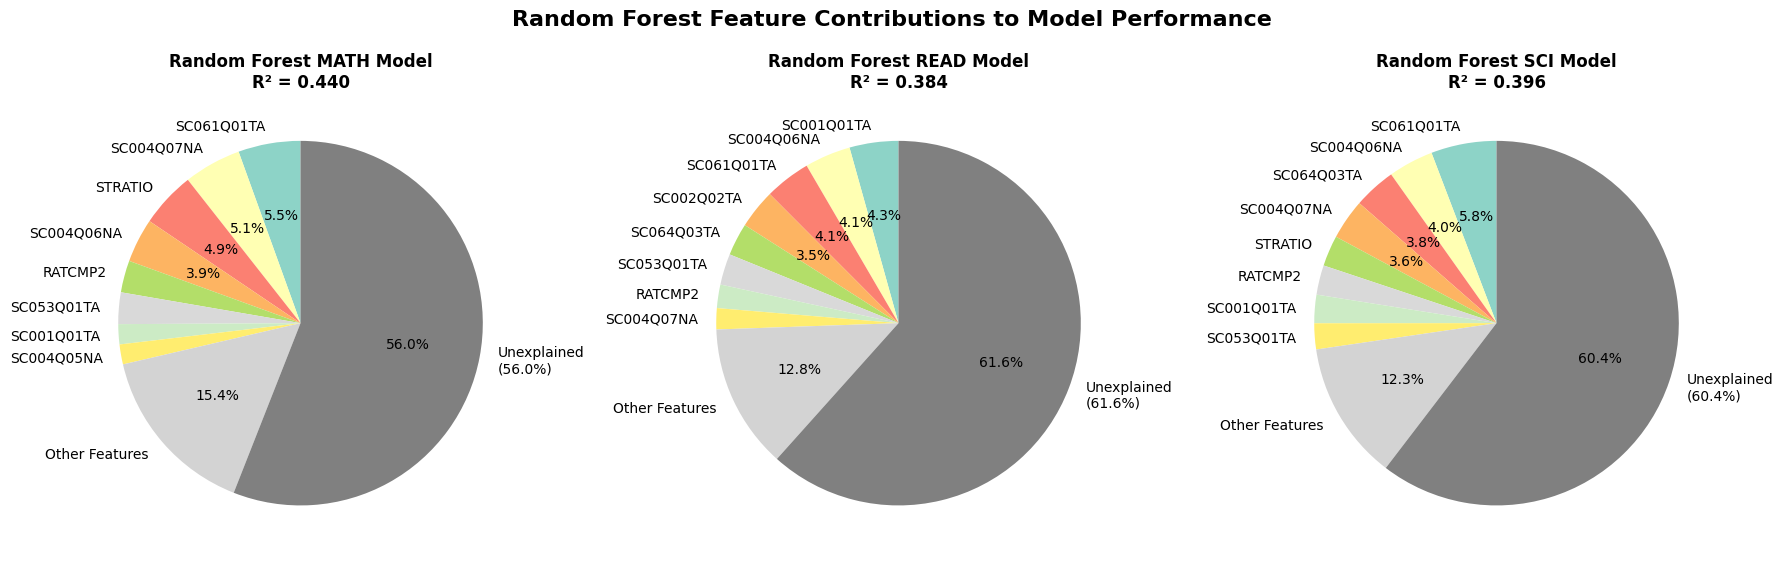

Creating Random Forest bar charts...


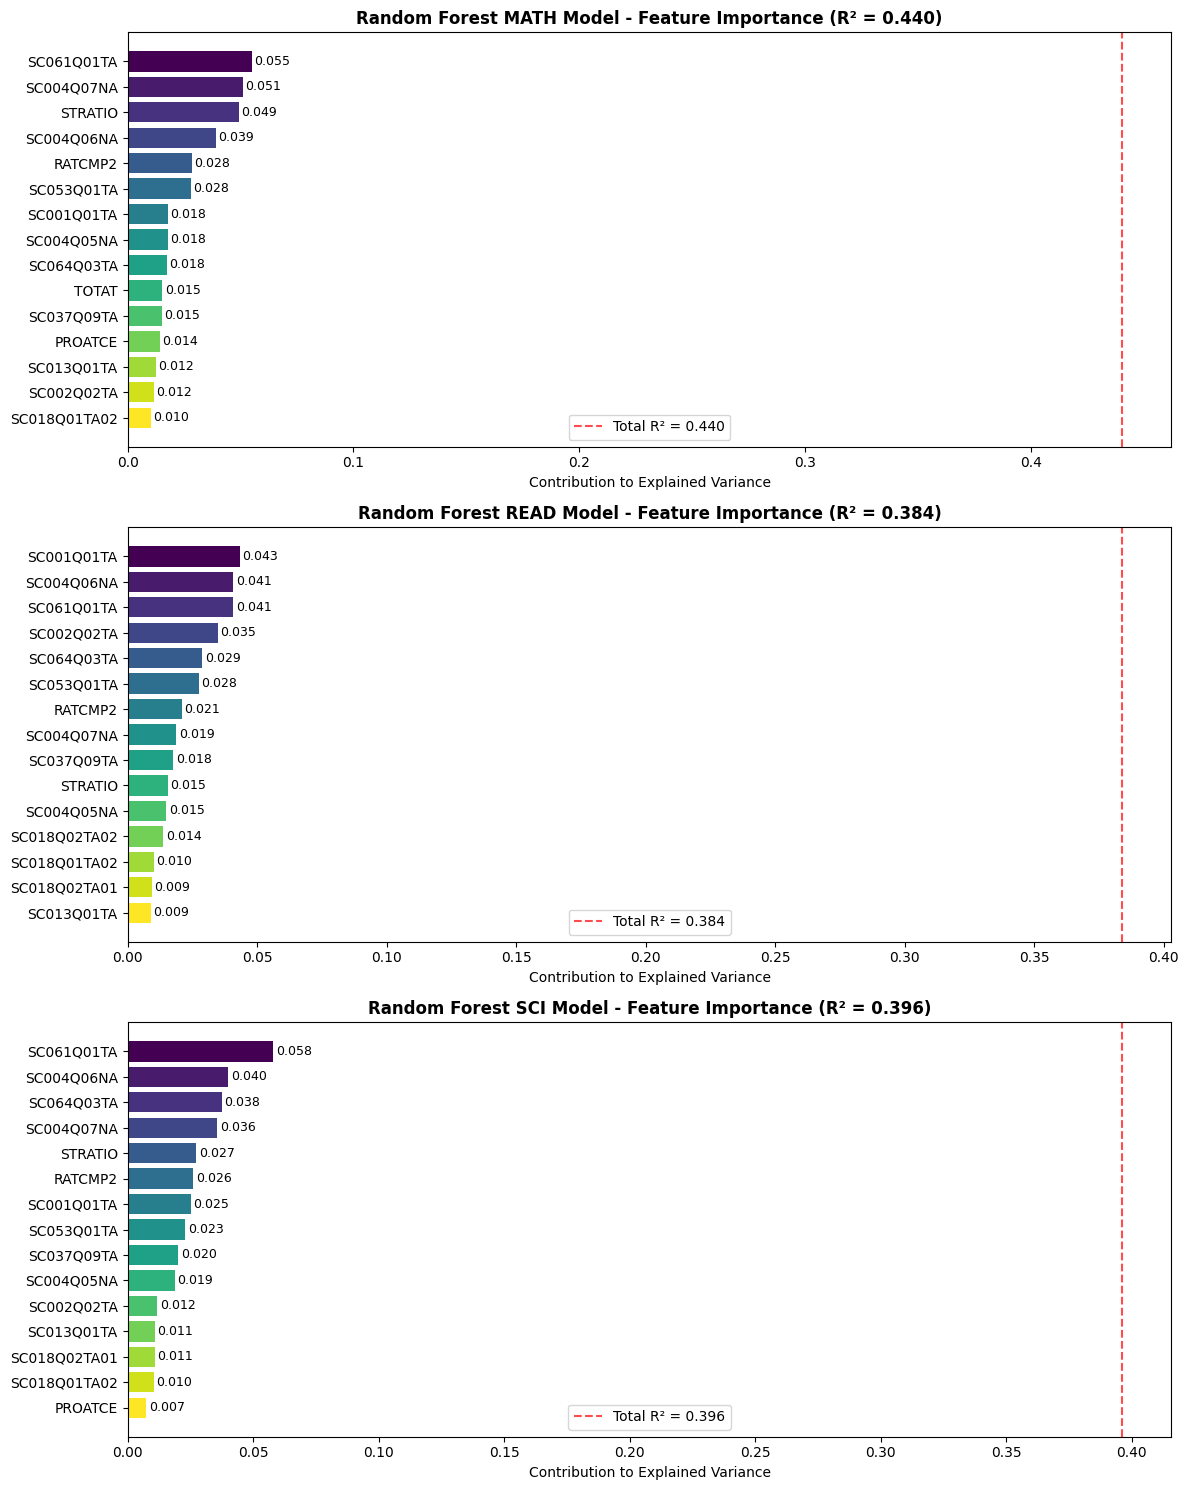


Random Forest Summary:
MATH: Top feature 'SC061Q01TA' contributes 12.5% of explained variance
READ: Top feature 'SC001Q01TA' contributes 11.3% of explained variance
SCI: Top feature 'SC061Q01TA' contributes 14.7% of explained variance

Random Forest Top 10 Features DataFrames created:
Access with: rf_top_features_dfs['math'], rf_top_features_dfs['read'], rf_top_features_dfs['sci']

Example - Top 10 features for Random Forest MATH model:
     field_id  \
0  SC061Q01TA   
1  SC004Q07NA   
2     STRATIO   
3  SC004Q06NA   
4     RATCMP2   
5  SC053Q01TA   
6  SC001Q01TA   
7  SC004Q05NA   
8  SC064Q03TA   
9       TOTAT   

                                                                                                                                                                                                                                                                                                                                                                                  

In [139]:
# Run the Random Forest analysis
print("Random Forest Feature Importance Analysis - Best Trials Only\n")

# Analyze RF models - returns both results and top features DataFrames
rf_model_results, rf_top_features_dfs = analyze_rf_models()

# Create visualizations
if any(not results['contributions_df'].empty for results in rf_model_results.values()):
    print("Creating Random Forest pie charts...")
    create_pie_charts_rf(rf_model_results)

    print("Creating Random Forest bar charts...")
    create_bar_charts_rf(rf_model_results)

    print("\nRandom Forest Summary:")
    for label, results in rf_model_results.items():
        if not results['contributions_df'].empty:
            top_feature = results['contributions_df'].iloc[0]
            contrib_pct = (top_feature['explained_variance_contribution'] / results['r2_score']) * 100
            print(f"{label.upper()}: Top feature '{top_feature['feature']}' contributes {contrib_pct:.1f}% of explained variance")

    print("\nRandom Forest Top 10 Features DataFrames created:")
    print("Access with: rf_top_features_dfs['math'], rf_top_features_dfs['read'], rf_top_features_dfs['sci']")

    # Example: Show the math DataFrame
    print(f"\nExample - Top 10 features for Random Forest MATH model:")
    print(rf_top_features_dfs['math'])

else:
    print("No Random Forest feature data available.")

### Operational factors that drive success

The explained variance for each educational outcome is significantly larger than that of the Linear Regression models. Same applies to the specific features. Therefore, we will try and group the ten features that contribute the most to explaining the variance in the outcome operationally, i.e., by the the of investment vector.



* Student truancy (SC061Q01TA)
* Quality improvement program (SC037Q09TA)
* Tech
  * Computers with internet connection (SC004Q07NA, RATCMP2)
  * Number of data projectors (SC004Q06NA)
  * Number of interactive whiteboards (SC004Q05NA)
* Number of teachers
  * Student-teacher ratio (STRATIO)
  * Total number of teachers (TOTAT)
* Extra-curricular activities
  * Band and orchestra/choir (SC053Q01TA)
  * Participation of parents in school activities (SC064Q03TA)

Several other factors were found as important yet cannot be reasonable impacted by a $50mln investment:
* The type of community where the school is located (SC001Q01TA)
* The number of students (SC002Q02TA)


### Bottlenecks

Based on the analysis of factors that influence success, we can point out several bottlenecks:
* **Lack of participation**: student truancy (SC061Q01TA) was found to be a significant factor; parhaps, other similar factors not accounted for, e.g., lack of focus and motivaiton, might have adverse effects. These seem to be less easily amenable than tech access.
* **Resource logistics:**  If the model shows a strong influence of tech, particularly computers with access to the Internet, on the educational outcomes. Tyhe logistics of bringing the tech to the classroom and making good use of it, specifically training teachers and adjusting lesson plans, as well as maintaining the tech, might become a bottleneck.
* **Number of teachers:** The model might reveals strong effects of the number of teahers and teacher/student ratio. Training more teachers and establishing adequate frameworks for their professional development might become a bottleneck.


## 3 - Validate

*Test operational improvement hypotheses*

* **Scenario Analysis:** Simulate the impact of different investment strategies.  For example, what would be the predicted change in test scores if we increased the number of computers in schools by X% or provided Y additional textbooks per student?  This helps prioritize investments for maximum impact.


In [146]:
prompt = task + role + f""" You created and trained three Random Forest ML models and evaluated them.
Here are the results: {rf_model_results}

The following factors have been identified as candidates for investment:

1. Student truancy (SC061Q01TA) - perhaps, programs to
2. Quality improvement program (SC037Q09TA)
3. Tech - consists of the following:
   - Computers with internet connection (SC004Q07NA, RATCMP2)
   - Number of data projectors (SC004Q06NA)
   - Number of interactive whiteboards (SC004Q05NA)
4. Number of teachers
   - Student-teacher ratio (STRATIO)
   - Total number of teachers (TOTAT)
5. Extra-curricular activities
   - Band and orchestra/choir (SC053Q01TA)
   - Participation of parents in school activities (SC064Q03TA)

Please suggest scenario analysis: how we can simulate the impact of different investment strategies.
For example, what would be the predicted change in test scores if we increased the number of computers in schools by X%,
hired and trained Y new teachers per 100 students, funded bands in Z schools, introduced student truancy prevention programs and
quality improvement programs? We need to test operational improvement hypotheses based on the factors we identified
to prioritize investments for maximum impact.
"""

response = model.generate_content(prompt)
print(response.text)

Here's a suggested scenario analysis approach to simulate the impact of different investment strategies based on your Random Forest model results and operational excellence principles:

**I. Data Preparation and Model Selection:**

1. **Choose the Best Model:** Since you're interested in *predicting* changes in test scores, the R-squared score is a good metric for model selection.  Select the model (math, read, or sci) with the highest R-squared value as it explains the most variance in the corresponding test scores.  For example, if 'math' has the highest R-squared, use that model to predict changes in math scores.

2. **Baseline Data:** You'll need a representative dataset containing all the features used in your chosen model *and* the corresponding test scores. This serves as your baseline for comparison.

3. **Feature Importance:**  Refer to the `contributions_df` for the selected model. This tells you which features have the most predictive power. Focus your scenarios on these hig

Starting with these recommendations, we will create four scenarios:

1. Tech improvement
2. Hiring teacher
3. Truancy prevention and quality improvement
4. Extracurricular activities

For each scenario, we will conduct a simulation and assess the impacts.

In [153]:
# Educational Policy Optimization Framework
from scipy.optimize import minimize

def get_baseline_data():
    """
    Get baseline statistics for all features from the current dataset.
    """
    stats_query = f"""
    SELECT
      {columns_string_base}
    FROM
      `{PROJECT_ID}.{BQ_DATASET}.pisa_data`
    WHERE
      math IS NOT NULL AND read IS NOT NULL AND sci IS NOT NULL
    """

    job = client.query(stats_query)
    baseline_df = job.result().to_dataframe()

    print(f"Baseline data loaded: {len(baseline_df)} students")
    return baseline_df

def get_feature_importance_for_optimization(model_prefix='pisa_rand_forest_model'):
    """
    Get feature importance weights from the Random Forest models for optimization.
    """
    feature_weights = {}

    for label in labels:
        model_name = f"{model_prefix}_{label.lower()}"

        query = f"""
        WITH best_trial AS (
          SELECT trial_id
          FROM ML.TRIAL_INFO(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`)
          ORDER BY hparam_tuning_evaluation_metrics.r2_score DESC
          LIMIT 1
        )
        SELECT
          fi.feature,
          fi.importance_weight
        FROM ML.FEATURE_IMPORTANCE(MODEL `{PROJECT_ID}.{BQ_DATASET}.{model_name}`) fi
        JOIN best_trial b ON fi.trial_id = b.trial_id
        WHERE fi.feature IS NOT NULL
        ORDER BY fi.importance_weight DESC
        """

        job = client.query(query)
        results = job.result()

        weights = {}
        for row in results:
            weights[row.feature] = row.importance_weight

        feature_weights[label] = weights

    return feature_weights

def estimate_feature_impact(feature_changes, feature_weights, baseline_stats):
    """
    Estimate the impact of feature changes on educational outcomes.
    This is a simplified linear approximation for optimization.
    """
    predicted_improvements = {}

    for label in labels:
        improvement = 0
        total_weight = sum(feature_weights[label].values())

        for feature, change_pct in feature_changes.items():
            if feature in feature_weights[label]:
                # Normalize the feature importance
                normalized_importance = feature_weights[label][feature] / total_weight

                # Estimate impact: importance * change * scaling factor
                # The scaling factor converts feature changes to score improvements
                scaling_factor = 100  # Adjust based on empirical observations
                feature_impact = normalized_importance * change_pct * scaling_factor
                improvement += feature_impact

        predicted_improvements[label] = improvement

    return predicted_improvements

def optimize_feature_changes(scenario, target_improvement=10.0, max_change_pct=50.0):
    """
    Optimize feature changes to achieve target improvement with minimal total change.

    Args:
        scenario: Dictionary with scenario definition
        target_improvement: Target percentage improvement in scores (default 10%)
        max_change_pct: Maximum allowed change per feature (default 50%)
    """
    print(f"\nOptimizing scenario: {scenario['name']}")
    print(f"Target improvement: {target_improvement}% for math, read, sci")
    print(f"Features to optimize: {scenario['features']}")  # Fixed: removed .keys() since it's a list

    # Get feature importance weights
    feature_weights = get_feature_importance_for_optimization()

    # Get baseline data for constraints
    baseline_df = get_baseline_data()
    baseline_stats = {col: baseline_df[col].describe() for col in scenario['features'] if col in baseline_df.columns}

    # Define optimization variables (percentage changes for each feature)
    n_features = len(scenario['features'])
    feature_names = scenario['features']  # Fixed: this is already a list

    def objective_function(changes):
        """
        Objective: Minimize the sum of absolute percentage changes
        (find the most efficient combination)
        """
        return np.sum(np.abs(changes))

    def constraint_function(changes):
        """
        Constraint: Must achieve target improvement for all subjects
        """
        feature_changes_dict = dict(zip(feature_names, changes))
        predicted_improvements = estimate_feature_impact(feature_changes_dict, feature_weights, baseline_stats)

        # Return the difference between actual and target improvements
        # Should be >= 0 for all subjects
        constraints = []
        for label in labels:
            diff = predicted_improvements[label] - target_improvement
            constraints.append(diff)

        return np.array(constraints)

    # Set up optimization constraints
    constraints = {
        'type': 'ineq',
        'fun': constraint_function
    }

    # Bounds: each feature change between -max_change_pct and +max_change_pct
    bounds = [(-max_change_pct, max_change_pct) for _ in range(n_features)]

    # Initial guess: small positive changes
    x0 = np.array([5.0] * n_features)

    # Run optimization
    try:
        result = minimize(
            objective_function,
            x0,
            method='SLSQP',
            bounds=bounds,
            constraints=constraints,
            options={'maxiter': 1000, 'ftol': 1e-6}
        )

        if result.success:
            optimal_changes = dict(zip(feature_names, result.x))

            # Calculate predicted improvements with optimal changes
            predicted_improvements = estimate_feature_impact(optimal_changes, feature_weights, baseline_stats)

            return {
                'success': True,
                'optimal_changes': optimal_changes,
                'predicted_improvements': predicted_improvements,
                'total_effort': result.fun,
                'optimization_result': result
            }
        else:
            return {
                'success': False,
                'message': f"Optimization failed: {result.message}",
                'optimization_result': result
            }

    except Exception as e:
        return {
            'success': False,
            'message': f"Optimization error: {str(e)}"
        }

def analyze_scenario(scenario, codebooks_df, target_improvement=10.0, max_change_pct=50.0):
    """
    Main function to analyze a single scenario and find optimal feature changes.

    Args:
        scenario: Scenario dictionary with name, description, and features
        codebooks_df: DataFrame with field_id and field_name columns for feature descriptions
        target_improvement: Target percentage improvement (default 10%)
        max_change_pct: Maximum allowed change per feature (default 50%)

    Returns:
        Dictionary with optimization results and analysis
    """
    print(f"\n{'='*70}")
    print(f"SCENARIO ANALYSIS: {scenario['name'].upper()}")
    print(f"{'='*70}")
    print(f"Description: {scenario['description']}")

    # Get feature names from codebooks
    feature_info = {}
    for feature in scenario['features']:
        matching_row = codebooks_df[codebooks_df['field_id'] == feature]
        if not matching_row.empty:
            feature_info[feature] = {
                'field_id': feature,
                'field_name': matching_row.iloc[0]['field_name']
            }
        else:
            feature_info[feature] = {
                'field_id': feature,
                'field_name': feature  # Use field_id as fallback
            }

    print(f"\nFeatures in scope:")
    print(f"{'Field ID':<15} {'Field Name':<50}")
    print("-" * 70)
    for feature, info in feature_info.items():
        field_name = info['field_name'][:45] + "..." if len(info['field_name']) > 45 else info['field_name']
        print(f"{info['field_id']:<15} {field_name:<50}")

    # Run optimization
    optimization_result = optimize_feature_changes(scenario, target_improvement, max_change_pct)

    if not optimization_result['success']:
        print(f"\n❌ Optimization failed: {optimization_result['message']}")
        return optimization_result

    optimal_changes = optimization_result['optimal_changes']
    predicted_improvements = optimization_result['predicted_improvements']

    # Display results with field names
    print(f"\n✅ Optimization successful!")
    print(f"\nOptimal Feature Changes to achieve {target_improvement}% improvement:")
    print(f"{'Field ID':<15} {'Field Name':<35} {'Change %':<12} {'Direction':<12} {'Impact':<10}")
    print("-" * 90)

    for feature, change in optimal_changes.items():
        direction = "Increase" if change > 0 else "Decrease"
        impact_level = "High" if abs(change) > 20 else "Medium" if abs(change) > 10 else "Low"
        field_name = feature_info[feature]['field_name']
        field_name_short = field_name[:30] + "..." if len(field_name) > 30 else field_name
        print(f"{feature:<15} {field_name_short:<35} {change:>+8.1f}%   {direction:<12} {impact_level:<10}")

    print(f"\nPredicted Educational Improvements:")
    print(f"{'Subject':<8} {'Improvement':<12} {'Status':<10}")
    print("-" * 35)

    for label in labels:
        improvement = predicted_improvements[label]
        status = "✓ Target Met" if improvement >= target_improvement else "⚠ Below Target"
        print(f"{label.upper():<8} {improvement:>+8.1f}%    {status}")

    # Calculate efficiency metrics
    total_effort = sum(abs(change) for change in optimal_changes.values())
    avg_improvement = np.mean(list(predicted_improvements.values()))
    efficiency = avg_improvement / total_effort if total_effort > 0 else 0

    print(f"\nEfficiency Metrics:")
    print(f"  Total effort (sum of absolute changes): {total_effort:.1f}%")
    print(f"  Average improvement across subjects: {avg_improvement:.1f}%")
    print(f"  Efficiency ratio (improvement per effort): {efficiency:.3f}")

    # Feature ranking by impact
    feature_impacts = {}
    for feature, change in optimal_changes.items():
        # Calculate individual feature impact across all subjects
        individual_impact = {}
        feature_weights = get_feature_importance_for_optimization()
        for label in labels:
            if feature in feature_weights[label]:
                total_weight = sum(feature_weights[label].values())
                normalized_importance = feature_weights[label][feature] / total_weight
                individual_impact[label] = normalized_importance * change * 100
            else:
                individual_impact[label] = 0

        feature_impacts[feature] = {
            'field_id': feature,
            'field_name': feature_info[feature]['field_name'],
            'change_pct': change,
            'avg_impact': np.mean(list(individual_impact.values())),
            'total_impact': sum(individual_impact.values())
        }

    # Sort features by total impact
    sorted_features = sorted(feature_impacts.items(), key=lambda x: abs(x[1]['total_impact']), reverse=True)

    print(f"\nFeature Ranking by Impact (most bang for the buck):")
    print(f"{'Rank':<5} {'Field ID':<15} {'Field Name':<30} {'Change %':<12} {'Total Impact':<12}")
    print("-" * 80)

    for i, (feature, impact_data) in enumerate(sorted_features, 1):
        field_name_short = impact_data['field_name'][:25] + "..." if len(impact_data['field_name']) > 25 else impact_data['field_name']
        print(f"{i:<5} {impact_data['field_id']:<15} {field_name_short:<30} {impact_data['change_pct']:>+8.1f}%   {impact_data['total_impact']:>+9.1f}%")

    # Create visualization
    create_scenario_visualization(scenario, optimal_changes, predicted_improvements, feature_impacts, feature_info)

    # Prepare detailed results with field names
    detailed_results = {
        'success': True,
        'scenario': scenario,
        'target_improvement': target_improvement,
        'feature_info': feature_info,
        'optimal_changes_detailed': [
            {
                'field_id': feature,
                'field_name': feature_info[feature]['field_name'],
                'change_pct': change,
                'direction': "Increase" if change > 0 else "Decrease",
                'impact_level': "High" if abs(change) > 20 else "Medium" if abs(change) > 10 else "Low"
            }
            for feature, change in optimal_changes.items()
        ],
        'optimal_changes': optimal_changes,
        'predicted_improvements': predicted_improvements,
        'efficiency_metrics': {
            'total_effort': total_effort,
            'avg_improvement': avg_improvement,
            'efficiency_ratio': efficiency
        },
        'feature_ranking': [
            {
                'rank': i,
                'field_id': feature,
                'field_name': impact_data['field_name'],
                'change_pct': impact_data['change_pct'],
                'total_impact': impact_data['total_impact'],
                'avg_impact': impact_data['avg_impact']
            }
            for i, (feature, impact_data) in enumerate(sorted_features, 1)
        ]
    }

    return detailed_results

def create_scenario_visualization(scenario, optimal_changes, predicted_improvements, feature_impacts, feature_info):
    """
    Create visualizations for the scenario analysis results with field names.
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))

    # 1. Feature Changes Bar Chart with field names
    ax1 = axes[0, 0]
    features = list(optimal_changes.keys())
    changes = list(optimal_changes.values())
    colors = ['green' if x > 0 else 'red' for x in changes]

    # Create labels with field names
    feature_labels = []
    for feature in features:
        field_name = feature_info[feature]['field_name']
        if len(field_name) > 20:
            field_name = field_name[:17] + "..."
        feature_labels.append(f"{feature}\n({field_name})")

    bars = ax1.bar(range(len(features)), changes, color=colors, alpha=0.7)
    ax1.set_title('Optimal Feature Changes (%)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Percentage Change')
    ax1.set_xticks(range(len(features)))
    ax1.set_xticklabels(feature_labels, rotation=45, ha='right', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)

    # Add value labels on bars
    for bar, value in zip(bars, changes):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -1),
                f'{value:+.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

    # 2. Subject Improvements
    ax2 = axes[0, 1]
    subjects = list(predicted_improvements.keys())
    improvements = [predicted_improvements[s] for s in subjects]

    bars = ax2.bar(subjects, improvements, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
    ax2.set_title('Predicted Score Improvements by Subject', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Improvement (%)')
    ax2.grid(True, alpha=0.3)

    # Add target line
    target_line = 10.0  # Assuming 10% target
    ax2.axhline(y=target_line, color='red', linestyle='--', alpha=0.7, linewidth=2, label=f'Target: {target_line}%')
    ax2.legend()

    # Add value labels
    for bar, value in zip(bars, improvements):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    # 3. Feature Impact vs Change (Efficiency Plot) with field names
    ax3 = axes[1, 0]

    x_vals = [abs(feature_impacts[f]['change_pct']) for f in features]
    y_vals = [abs(feature_impacts[f]['total_impact']) for f in features]

    scatter = ax3.scatter(x_vals, y_vals, s=120, alpha=0.7, c=range(len(features)), cmap='viridis')

    # Add feature labels with field names
    for i, feature in enumerate(features):
        field_name = feature_info[feature]['field_name']
        if len(field_name) > 15:
            field_name = field_name[:12] + "..."
        label = f"{feature}\n({field_name})"
        ax3.annotate(label, (x_vals[i], y_vals[i]), xytext=(5, 5),
                    textcoords='offset points', fontsize=8, ha='left')

    ax3.set_xlabel('Required Change (%)')
    ax3.set_ylabel('Total Impact (%)')
    ax3.set_title('Feature Efficiency: Impact vs Required Change', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Add efficiency line
    max_val = max(max(x_vals), max(y_vals))
    ax3.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, linewidth=2, label='Equal Efficiency Line')
    ax3.legend()

    # 4. Feature Ranking with field names
    ax4 = axes[1, 1]

    sorted_features = sorted(feature_impacts.items(), key=lambda x: abs(x[1]['total_impact']), reverse=True)
    feature_names_short = []
    total_impacts = []

    for feature, impact_data in sorted_features:
        field_name = impact_data['field_name']
        if len(field_name) > 20:
            field_name = field_name[:17] + "..."
        feature_names_short.append(f"{feature}\n({field_name})")
        total_impacts.append(abs(impact_data['total_impact']))

    bars = ax4.barh(range(len(feature_names_short)), total_impacts, color='skyblue', alpha=0.7)
    ax4.set_xlabel('Total Impact (%)')
    ax4.set_title('Feature Ranking by Total Impact', fontsize=14, fontweight='bold')
    ax4.set_yticks(range(len(feature_names_short)))
    ax4.set_yticklabels(feature_names_short, fontsize=10)
    ax4.grid(True, alpha=0.3)

    # Add value labels
    for bar, value in zip(bars, total_impacts):
        width = bar.get_width()
        ax4.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                f'{value:.1f}%', ha='left', va='center', fontweight='bold')

    plt.suptitle(f'Scenario Analysis: {scenario["name"]}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


### 1. Tech improvement


SCENARIO ANALYSIS: INVESTMENT IN TECHNOLOGY
Description: Increase computer and Internet access, as well as tech infrastructure

Features in scope:
Field ID        Field Name                                        
----------------------------------------------------------------------
RATCMP2         2015: Proportion of available computers that ...  
SC004Q07NA      2015: Total No. of computers with internet co...  
SC004Q06NA      2015: Total No. of data projectors in the sch...  
SC004Q05NA      2015: Total No. of interactive whiteboards in...  

Optimizing scenario: Investment in Technology
Target improvement: 20.0% for math, read, sci
Features to optimize: ['RATCMP2', 'SC004Q07NA', 'SC004Q06NA', 'SC004Q05NA']
Baseline data loaded: 54080 students

✅ Optimization successful!

Optimal Feature Changes to achieve 20.0% improvement:
Field ID        Field Name                          Change %     Direction    Impact    
--------------------------------------------------------------------

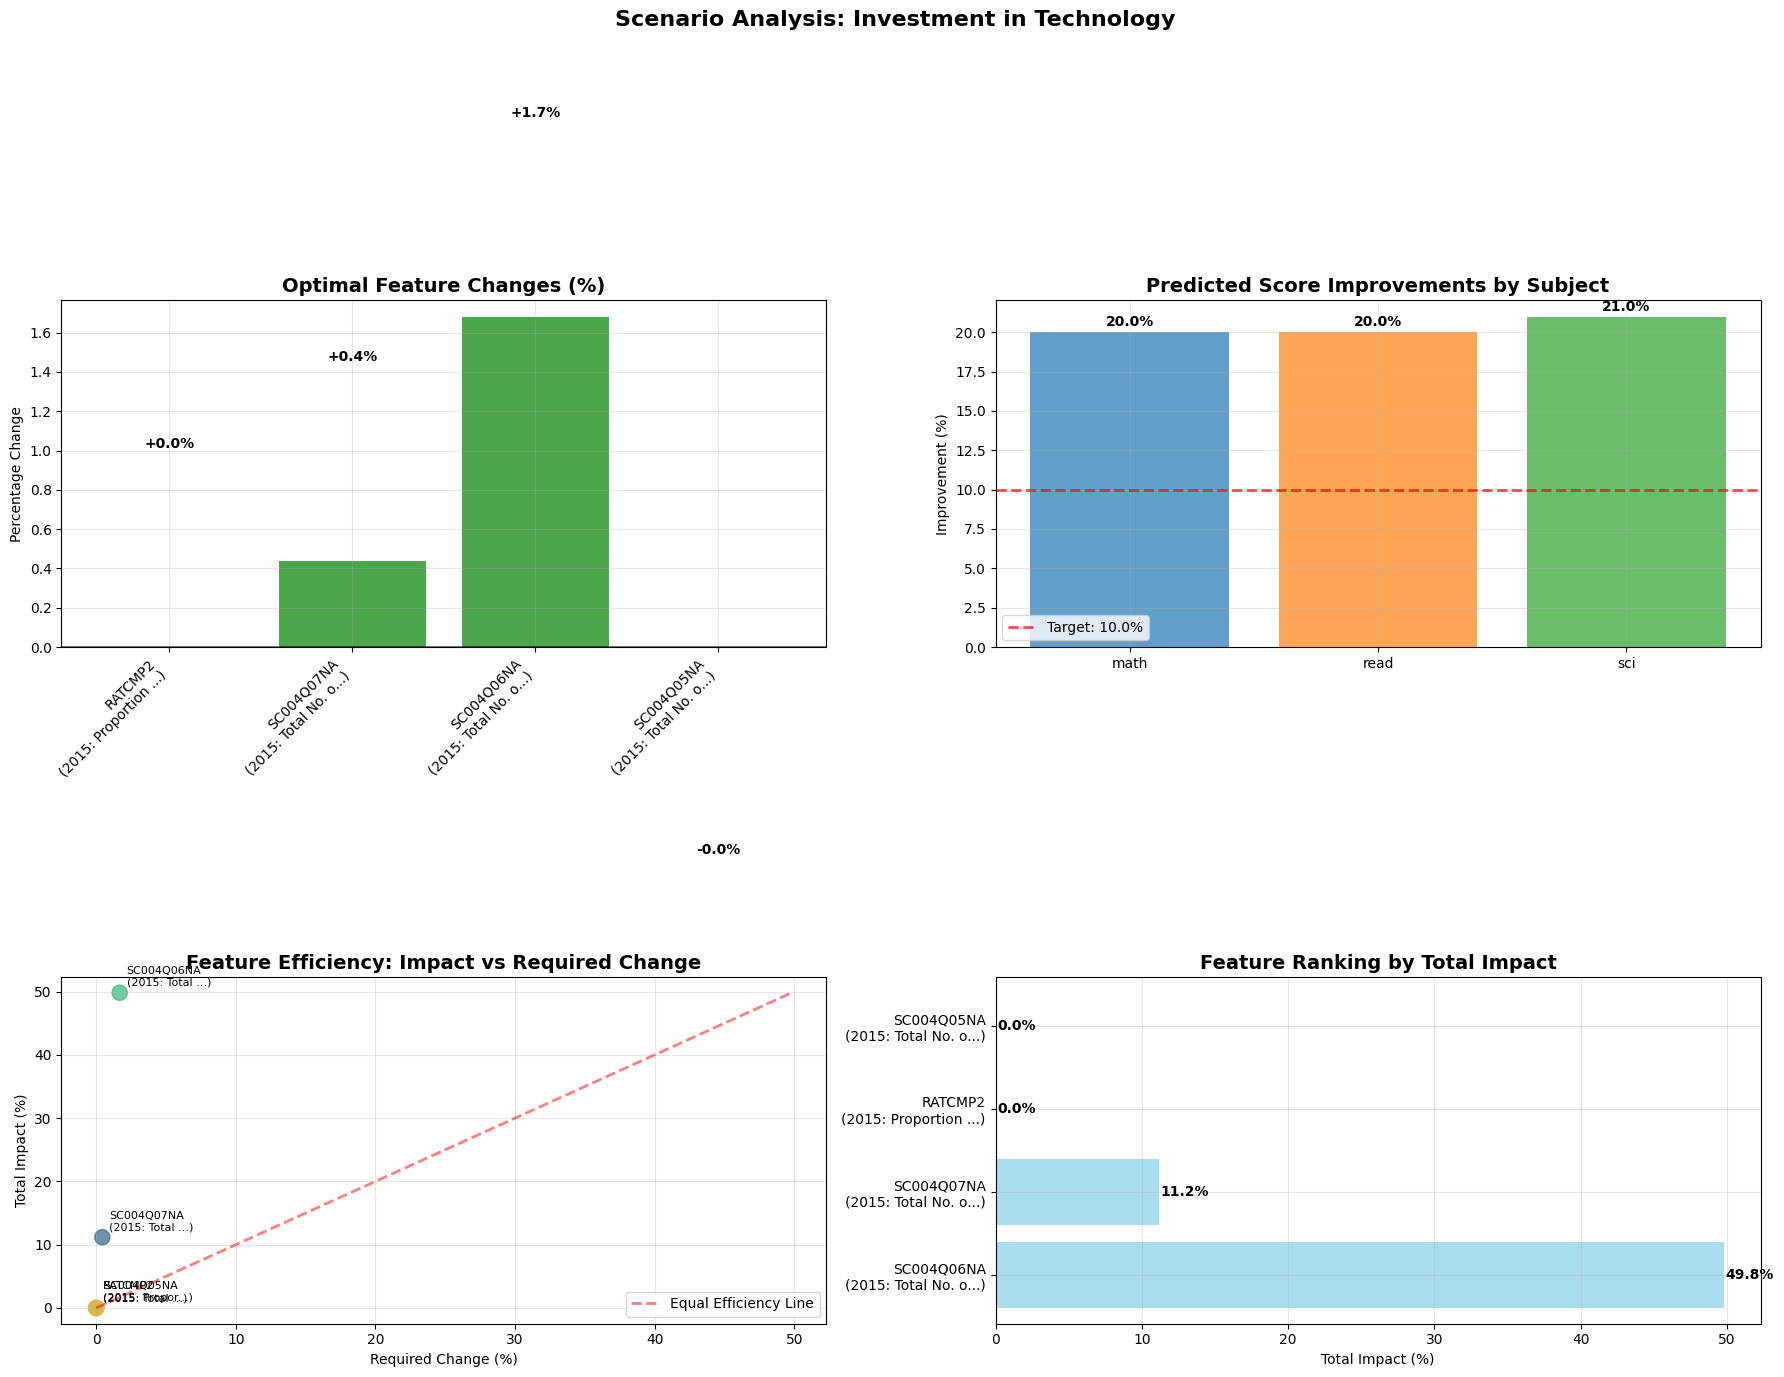

In [155]:
scenario = {
        'name': 'Investment in Technology',
        'description': 'Increase computer and Internet access, as well as tech infrastructure',
        'features': ['RATCMP2', 'SC004Q07NA', 'SC004Q06NA', 'SC004Q05NA']
    }

results = analyze_scenario(scenario, codebooks_df, target_improvement=20.0, max_change_pct=50.0)

In [157]:
recommended_features = ['SC004Q06NA', 'SC004Q07NA']
codebooks_df[codebooks_df['field_id'].isin(recommended_features)][['field_id', 'field_name']]

field_id  \
15  SC004Q06NA   
16  SC004Q07NA   

                                                                                                                                                                                                                                                                                                                                         field_name  
15                                                                                                2015: Total No. of data projectors in the school altogether; 2018: Approximately, how many data projectors are available in the school altogether?; 2022: [Stem] Approximately, how many data projectors are available in the school altogether?   
16  2015: Total No. of computers with internet connection available for teachers in the school.; 2018: Approximately, how many computers with Internet connection are available for teachers in your school?; 2022: [Stem] Approximately, how many desktop or laptop computers with internet connection are available for teachers in your school?

The optimal tech areas to invest into are:
1. **Buying data projectors**
2. **Providing more computers with Internet access**

increasing #1 by less than 2% and #2 by less than 0.5% is expected to bring 20% improvement in the educaional outcomes.

### 2. Hiring teachers


SCENARIO ANALYSIS: INVESTMENT IN TEACHERS
Description: Hire new teachers

Features in scope:
Field ID        Field Name                                        
----------------------------------------------------------------------
STRATIO         2015: Student-Teacher ratio; 2018: Student-Te...  
TOTAT           2015: Total number of all teachers at school;...  

Optimizing scenario: Investment in Teachers
Target improvement: 20.0% for math, read, sci
Features to optimize: ['STRATIO', 'TOTAT']
Baseline data loaded: 54080 students

✅ Optimization successful!

Optimal Feature Changes to achieve 20.0% improvement:
Field ID        Field Name                          Change %     Direction    Impact    
------------------------------------------------------------------------------------------
STRATIO         2015: Student-Teacher ratio; 2...       +5.0%   Increase     Low       
TOTAT           2015: Total number of all teac...       -0.0%   Decrease     Low       

Predicted Educational I

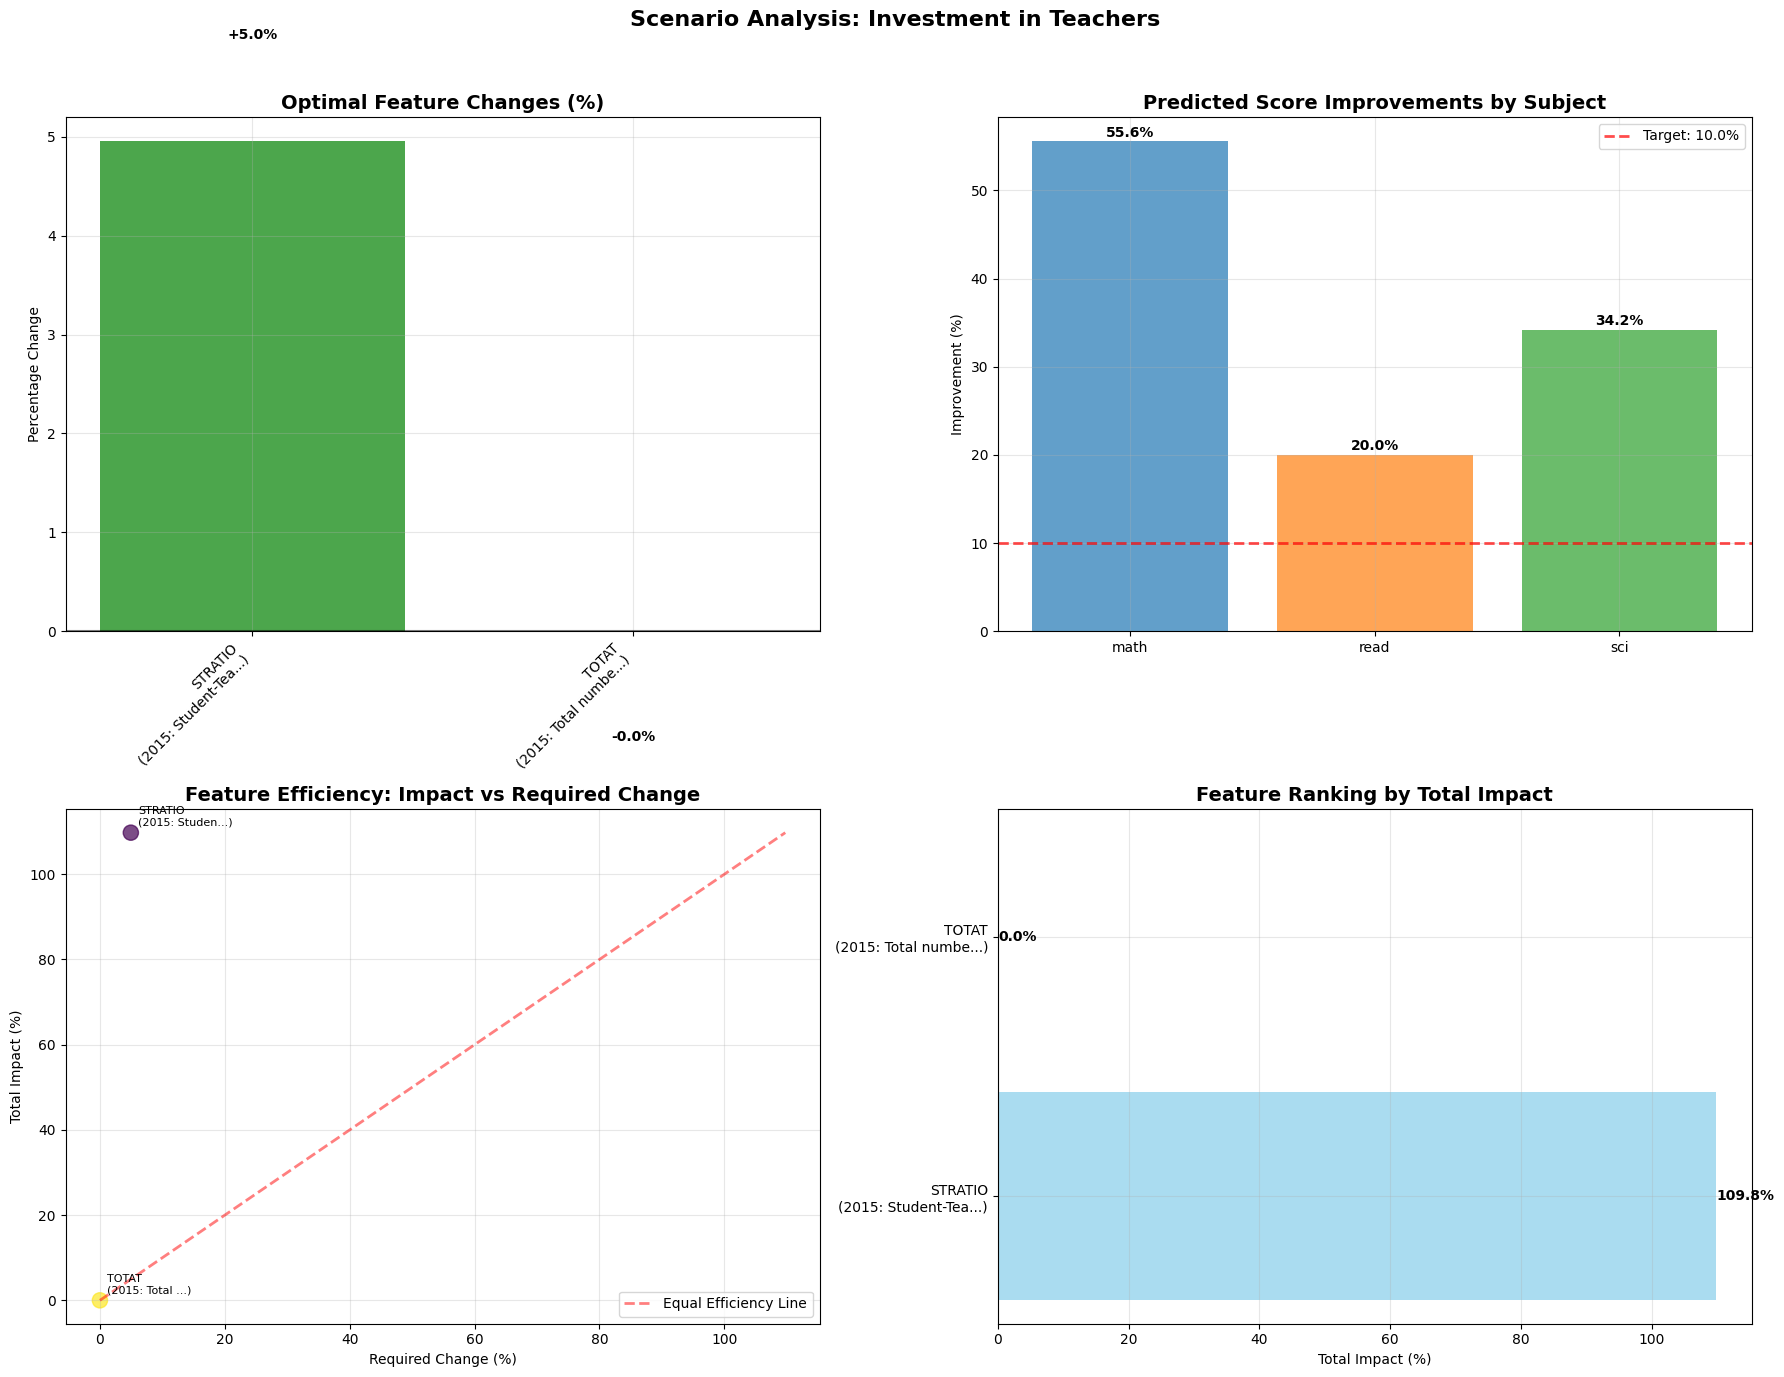

In [162]:
scenario = {
        'name': 'Investment in Teachers',
        'description': 'Hire new teachers',
        'features': ['STRATIO', 'TOTAT']
    }

results = analyze_scenario(scenario, codebooks_df, target_improvement=20.0, max_change_pct=50.0)

In [161]:
recommended_features = ['STRATIO']
codebooks_df[codebooks_df['field_id'].isin(recommended_features)][['field_id', 'field_name']]

field_id  \
67  STRATIO   

                                                                               field_name  
67  2015: Student-Teacher ratio; 2018: Student-Teacher ratio; 2022: Student-teacher ratio

The optimal areas to invest here is:
**Student/teacher ratio**

Increasing it by 5% is expected to lead to -
* 20% increase in reading achievement
* 34% increase in science achiement
* 56% increase in math achievement

### 3. Truancy prevention and quality improvement


SCENARIO ANALYSIS: INVESTMENT IN QUALITY AND TRUANCY PREVENTION
Description: Reduce absenteeism, improve school discipline and learning environment

Features in scope:
Field ID        Field Name                                        
----------------------------------------------------------------------
SC061Q01TA      2015: Extent to which student learning is hin...  
SC037Q09TA      2015: Does improvement exist at school? Consu...  

Optimizing scenario: Investment in Quality and Truancy Prevention
Target improvement: 20.0% for math, read, sci
Features to optimize: ['SC061Q01TA', 'SC037Q09TA']
Baseline data loaded: 54080 students

✅ Optimization successful!

Optimal Feature Changes to achieve 20.0% improvement:
Field ID        Field Name                          Change %     Direction    Impact    
------------------------------------------------------------------------------------------
SC061Q01TA      2015: Extent to which student ...       +1.9%   Increase     Low       
SC037Q0

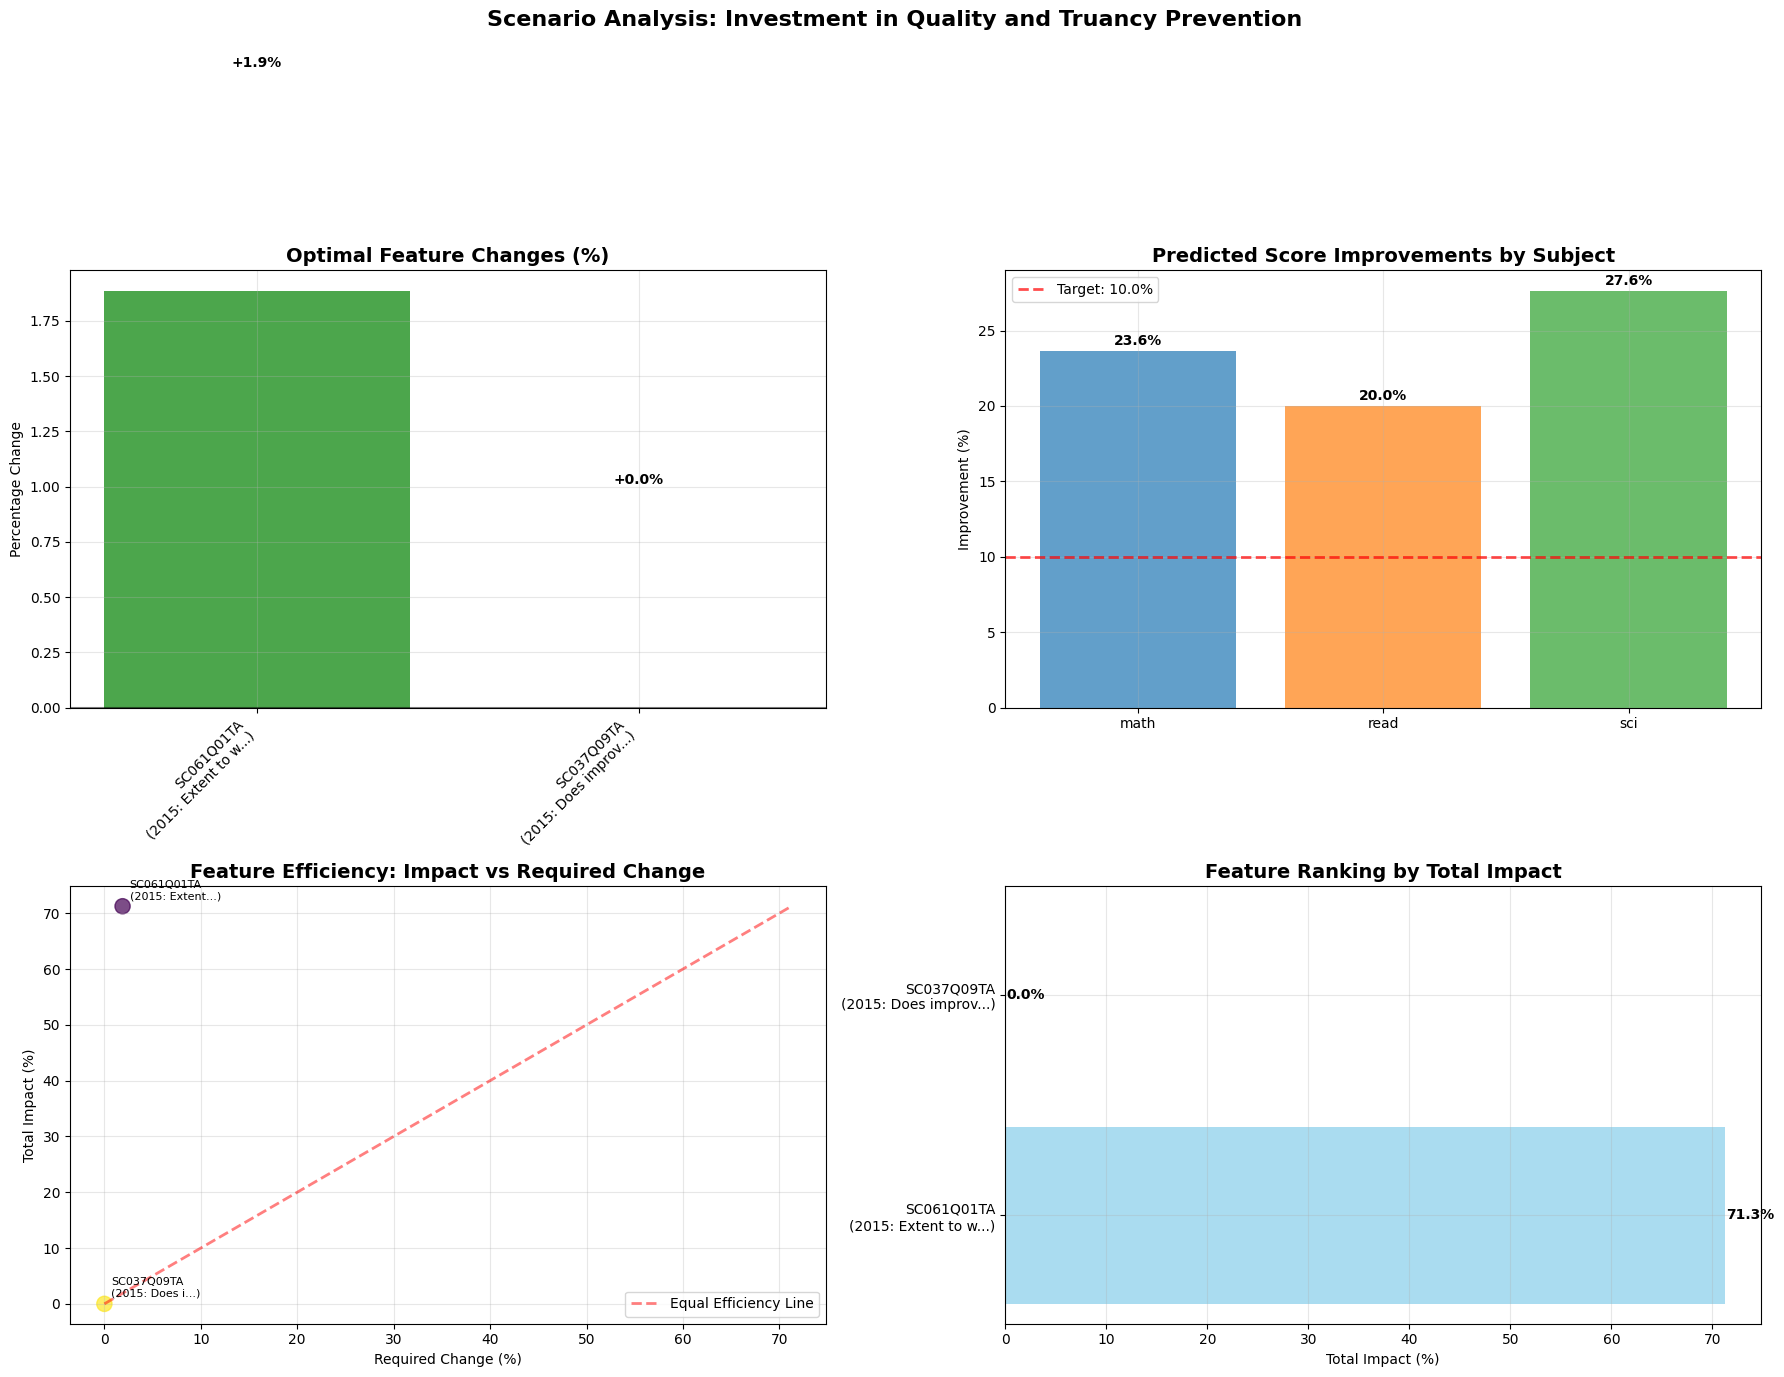

In [164]:
scenario = {
        'name': 'Investment in Quality and Truancy Prevention',
        'description': 'Reduce absenteeism, improve school discipline and learning environment',
        'features': ['SC061Q01TA', 'SC037Q09TA']
    }

results = analyze_scenario(scenario, codebooks_df, target_improvement=20.0, max_change_pct=50.0)

In [165]:
recommended_features = ['SC061Q01TA']
codebooks_df[codebooks_df['field_id'].isin(recommended_features)][['field_id', 'field_name']]

field_id  \
51  SC061Q01TA   

                                                                                                                                                                                     field_name  
51  2015: Extent to which student learning is hindered by: Student truancy; 2018: Extent to which student learning is hindered by: Student truancy; 2022: Learning hindered by: Student truancy

The optimal areas to invest here is:
**Truancy prevention**

This area, however, seems to be the most problematic to invest in, as it is likely to depend on various socio-economic factors beyond our control, e.g., the need to children to work to support their families, the availability of the means of transportaion, family situation, etc. Perhaps, broader government interventions and social programs are needed here.

### 4. Extracurricular activities


SCENARIO ANALYSIS: INVESTMENT IN EXTRACURRICULAR ACTIVITIES
Description: Offer band/orchestra/choir, increase parent participation

Features in scope:
Field ID        Field Name                                        
----------------------------------------------------------------------
SC053Q01TA      2015: <This academic year>,follow. activities...  
SC064Q03TA      2015: <the last academic year>, what proport....  

Optimizing scenario: Investment in Extracurricular activities
Target improvement: 20.0% for math, read, sci
Features to optimize: ['SC053Q01TA', 'SC064Q03TA']
Baseline data loaded: 54080 students

✅ Optimization successful!

Optimal Feature Changes to achieve 20.0% improvement:
Field ID        Field Name                          Change %     Direction    Impact    
------------------------------------------------------------------------------------------
SC053Q01TA      2015: <This academic year>,fol...       +3.0%   Increase     Low       
SC064Q03TA      2015: <the l

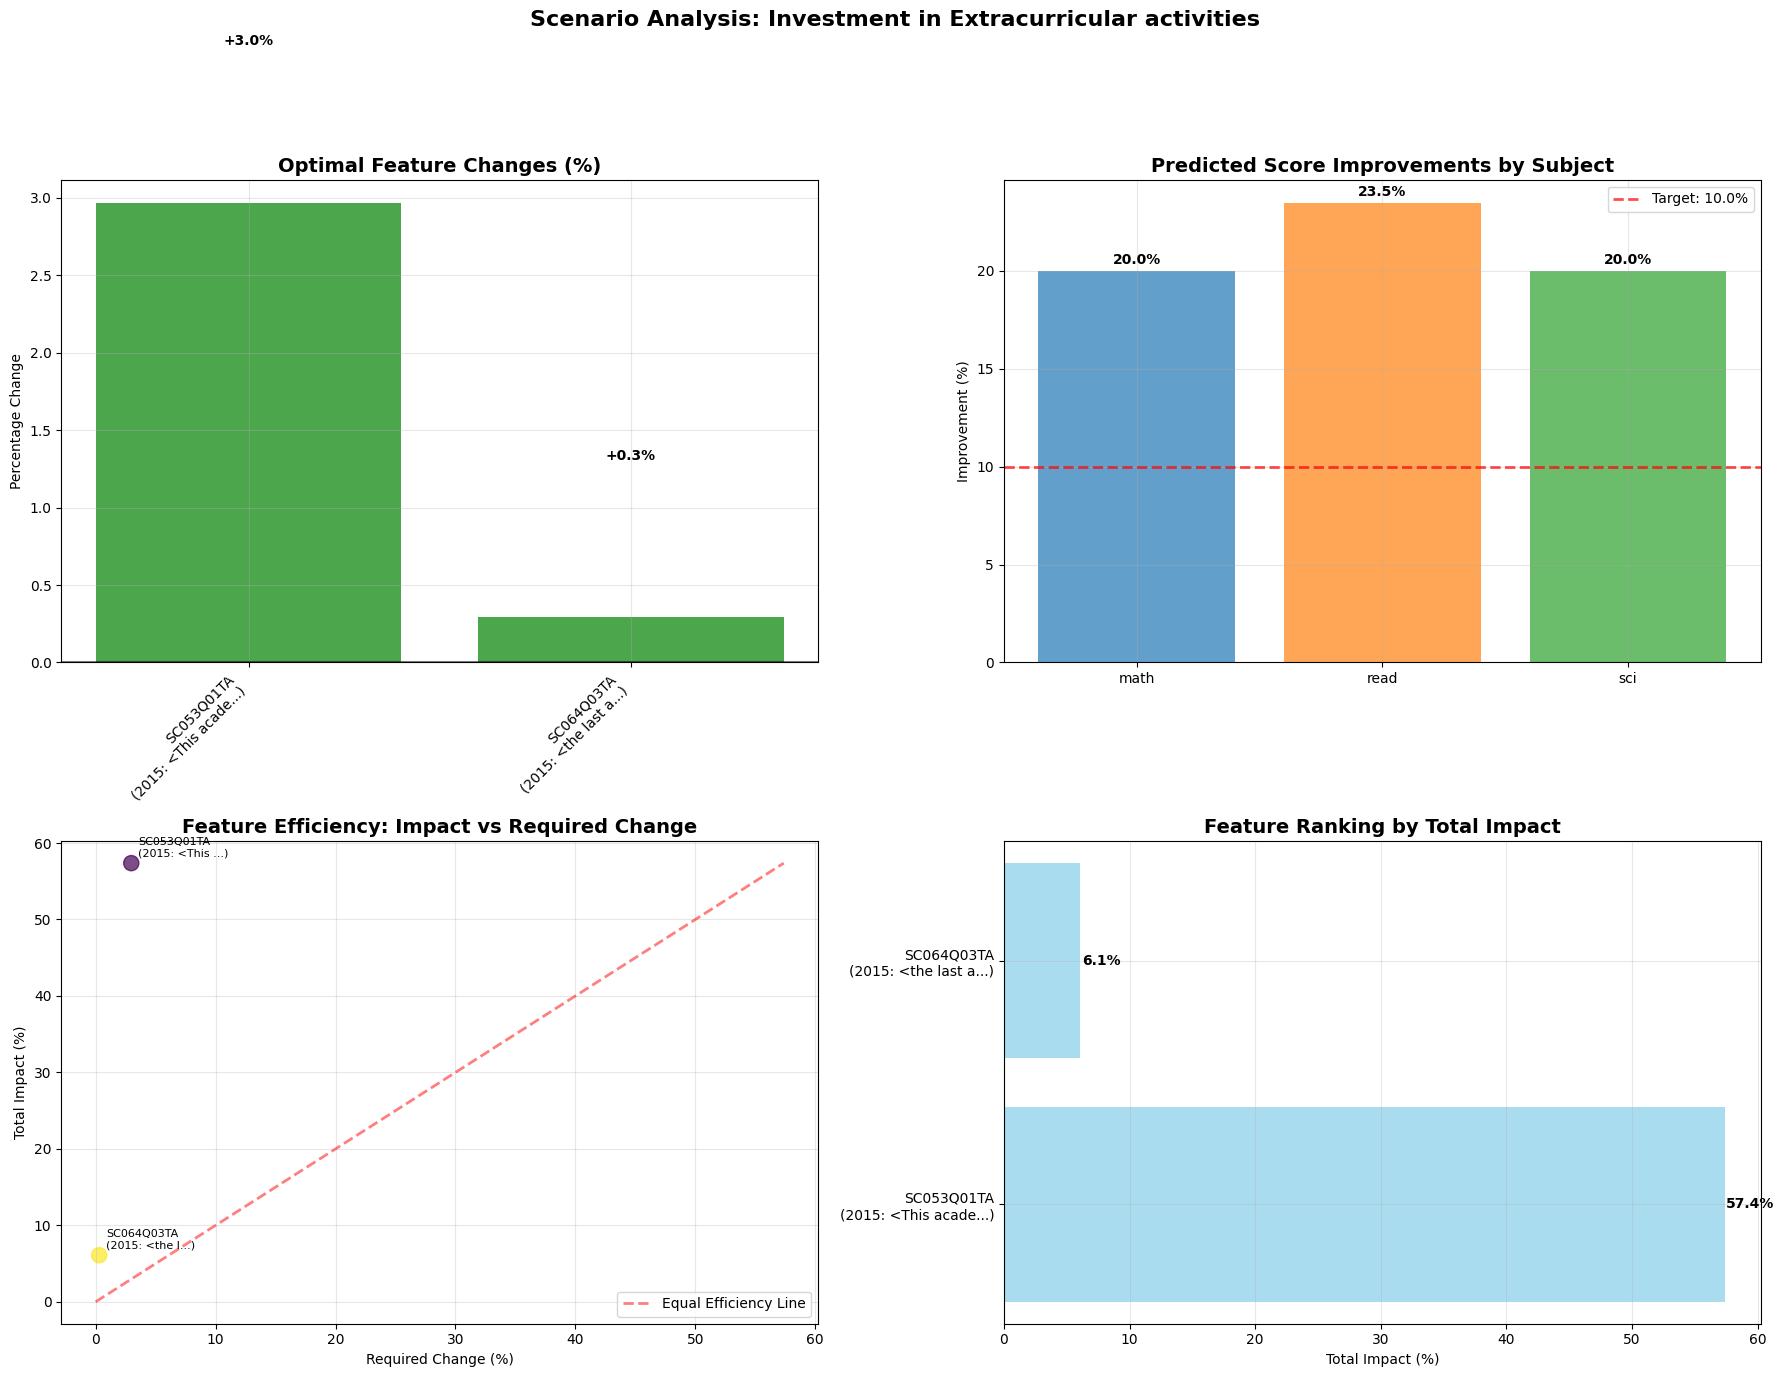

In [166]:
scenario = {
        'name': 'Investment in Extracurricular activities',
        'description': 'Offer band/orchestra/choir, increase parent participation',
        'features': ['SC053Q01TA', 'SC064Q03TA']
    }

results = analyze_scenario(scenario, codebooks_df, target_improvement=20.0, max_change_pct=50.0)

In [167]:
recommended_features = ['SC053Q01TA', 'SC064Q03TA']
codebooks_df[codebooks_df['field_id'].isin(recommended_features)][['field_id', 'field_name']]

field_id  \
45  SC053Q01TA   
63  SC064Q03TA   

                                                                                                                                                                                                                                                                                                                                                                                    field_name  
45                                                                            2015: <This academic year>,follow. activities\school offers<national modal grade for 15-year-olds>? Band, orchestra\choir; 2018: <This academic year>, activities offered to <national modal grade for 15-year-olds>: Band, orchestra or choir; 2022: Does school offer this school yr: Band, orchestra or choir  
63  2015: <the last academic year>, what proport. of parents part. school-related activit? Partici. in local school government; 2018: Proportion of parents: Participated in local school government (e.g. parent council or school management committee); 2022: Proportion parent/guardians who: Participated in local school government (e.g. parent council or school management committee)

The optimal areas to invest here is:
**Offering band/orchestra/choir**

This will lead to 20% and more increase in the educational achievement, especially in math.

Parent participation plays a much smaller role and is harder to change, as it depends on various factors beyond our control.



To summarize, four areas seem promising:
1. **Buying data projectors**
2. **Providing more computers with Internet access**
3. **Hiring new teachers to improve student/teacher ratio**
4. **Offering band/orchestra/choir**

## 4 - Extend

*Operational optimization roadmap*

**Recommendations for the Education Investment Strategy:**

Based on the model's findings, provide specific and actionable recommendations for the $50M investment. These should address:

* **Prioritization:** Which areas (technology, materials, teacher training, etc.) should receive the largest share of the investment?
* **Implementation:** How should the investment be implemented to maximize efficiency and minimize waste?  Consider partnerships with existing organizations, pilot programs, and ongoing monitoring and evaluation.
* **Performance Metrics:** Define key performance indicators (KPIs) to track the impact of the investment over time.  These KPIs should be directly linked to the operational drivers and bottlenecks identified by the model.


### LLM Analysis

#### Gemini

In [13]:
prompt = task + role + f""" Our analysis, conducted on PISA 2015, 2018, and 2022 datasets, led us to four possible areas to invest:
1. Buying data projectors (SC004Q06NA)
2. Providing more computers with Internet access (SC004Q07NA)
3. Hiring new teachers to improve student/teacher ratio (STRATIO)
4. Offering band/orchestra/choir (SC053Q01TA)

Based on the model's findings, provide specific and actionable recommendations for the $50M investment. These should address:

- Prioritization: Which areas out of the four above should receive the largest share of the investment?
Take into consideration the the costs and government friendliness toward educational NGOs in different countries to suggest where we should invest to get the best value for money spent,
and other aspects you find relevant.

- Implementation: How should the investment be implemented to maximize efficiency and minimize waste?
Consider partnerships with existing organizations, pilot programs, and ongoing monitoring and evaluation.

- Performance Metrics: Define key performance indicators (KPIs) to track the impact of the investment over time.
These KPIs should be directly linked to the operational drivers and bottlenecks identified by the model.

Suggest a roadmap for the investment and monitoring.
"""

response = model.generate_content(prompt)
print(response.text)

## Education Investment Strategy: Maximizing Impact through Operational Excellence

This strategy outlines a prioritized investment approach for a $50M educational fund, focusing on efficiency, process optimization, and measurable impact. Based on the analysis of PISA 2015, 2018, and 2022 data encompassing data projectors (SC004Q06NA), internet-connected computers (SC004Q07NA), student/teacher ratio (STRATIO), and arts programs (SC053Q01TA), the following recommendations are proposed:

**Prioritization:**

The investment should prioritize **internet-connected computers (SC004Q07NA)** followed by **improving student/teacher ratios (STRATIO)**.  Data projectors, while useful, are becoming less relevant in the face of interactive digital content accessible via computers.  Arts programs, although valuable for holistic development, should be a lower priority given the immediate need for foundational digital literacy and individualized attention.

* **Rationale:**  Access to digital resource

The response provided by Gemini here is rather poor.

Let's try Claude.

#### Claude

In [14]:
!pip install anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 19.9 MB/s eta 0:00:00


In [18]:
from google.colab import userdata
import anthropic

api_key = userdata.get('pisa-api-key')
claude_client = anthropic.Anthropic(api_key=api_key)

In [19]:
resp = claude_client.messages.create(
    model="claude-4-opus-20250514",
    max_tokens=8192,
    messages=[
        {"role": "user", "content": prompt}
    ]
)

response = resp.content[0].text

In [20]:
from IPython.display import HTML, display, Markdown

display(Markdown(f"""
### Claude Analysis Results

{response}
"""))


### Claude Analysis Results

# Education Investment Strategy: Operational Excellence Analysis

## Executive Summary

Based on operational efficiency principles and the PISA data analysis, I recommend a strategic allocation of the $50M investment focusing on scalable, measurable interventions with proven impact pathways.

## Investment Prioritization

### Recommended Allocation:

1. **Computers with Internet Access (40% - $20M)**
   - Highest scalability and standardization potential
   - Most measurable impact through digital learning analytics
   - Best cost-per-student ratio in developing markets

2. **Student/Teacher Ratio Improvement (35% - $17.5M)**
   - Direct correlation with learning outcomes
   - Sustainable impact through systemic change
   - High government partnership potential

3. **Data Projectors (20% - $10M)**
   - Force multiplier for teacher effectiveness
   - Lower maintenance costs than individual devices
   - Complements digital infrastructure

4. **Band/Orchestra/Choir (5% - $2.5M)**
   - Limited scalability
   - Higher operational complexity
   - Reserve for pilot programs in select schools

### Geographic Focus:
Target countries with:
- Government co-funding programs (e.g., India's Digital India, Rwanda's Smart Classroom Initiative)
- Low baseline infrastructure (higher marginal impact)
- Stable political environment
- NGO-friendly regulations (e.g., Kenya, Philippines, Peru)

## Implementation Framework

### Phase 1: Foundation (Months 1-6)
1. **Partnership Development**
   - Establish MOUs with education ministries
   - Partner with established NGOs (e.g., One Laptop per Child, Room to Read)
   - Engage technology providers for bulk purchasing agreements

2. **Pilot Program Design**
   - Select 10-15 schools per country for initial rollout
   - Implement A/B testing methodology
   - Establish baseline measurements

### Phase 2: Scaled Deployment (Months 7-18)
1. **Infrastructure Rollout**
   - Staged deployment based on pilot results
   - Centralized procurement for cost efficiency
   - Local technician training programs

2. **Teacher Capacity Building**
   - Digital literacy training (for computer/projector investments)
   - Classroom management workshops (for improved ratios)
   - Train-the-trainer model for sustainability

### Phase 3: Optimization (Months 19-24)
1. **Data-Driven Refinement**
   - Analyze performance metrics
   - Reallocate resources to highest-impact areas
   - Document best practices

## Key Performance Indicators (KPIs)

### Tier 1: Output Metrics (Quarterly)
- Number of devices deployed
- Student-to-computer ratio achieved
- Teacher-to-student ratio improvements
- Infrastructure utilization rates (hours/day)

### Tier 2: Outcome Metrics (Semi-Annual)
- Digital literacy assessment scores
- Student attendance rates
- Teacher retention rates
- Cost per student impacted

### Tier 3: Impact Metrics (Annual)
- Standardized test score improvements
- School completion rates
- Digital skill certification rates
- Return on Investment (ROI) calculations

## Operational Excellence Roadmap

### Year 1: Foundation & Quick Wins
- **Q1-Q2**: Establish partnerships, complete procurement
- **Q3-Q4**: Deploy 40% of infrastructure investment
- **Target**: Impact 50,000 students

### Year 2: Scale & Optimize
- **Q1-Q2**: Complete infrastructure deployment
- **Q3-Q4**: Focus on teacher training and ratio improvements
- **Target**: Impact 200,000 students

### Year 3-5: Sustain & Transfer
- **Ongoing**: Monitor, evaluate, and iterate
- **Focus**: Knowledge transfer to local organizations
- **Target**: Self-sustaining programs in 70% of schools

## Risk Mitigation & Efficiency Measures

1. **Standardization**
   - Use same hardware/software across regions
   - Develop universal training materials
   - Implement cloud-based management systems

2. **Local Ownership**
   - Require 20% local contribution (cash or in-kind)
   - Establish parent-teacher committees
   - Create student tech teams

3. **Sustainability Planning**
   - Budget 15% for maintenance and replacement
   - Develop revenue-generating models (computer labs after hours)
   - Train local technicians for ongoing support

## Monitoring & Evaluation Framework

### Real-Time Dashboard
- Device uptime and usage statistics
- Teacher training completion rates
- Student engagement metrics
- Budget burn rate vs. impact achieved

### Quarterly Reviews
- Performance against KPIs
- Cost efficiency analysis
- Stakeholder feedback integration
- Course correction decisions

### Annual Impact Assessment
- Third-party evaluation
- Comparative analysis across regions
- ROI calculation and reporting
- Strategic plan updates

## Conclusion

This operational excellence approach ensures maximum educational impact through:
- Data-driven resource allocation
- Scalable implementation models
- Rigorous performance measurement
- Continuous improvement processes

The strategy prioritizes interventions with clear impact pathways, leverages partnerships for efficiency, and maintains focus on measurable outcomes to ensure the $50M investment delivers transformative educational results.


This analysis is better, yet it too requires significant enhancement.

### Final Analysis and a Roadmap

# Education Investment Strategy: Operational Excellence Analysis



## Executive Summary

Based on operational efficiency principles and the PISA data analysis, we recommend a strategic allocation of the $50M investment focusing on scalable, measurable interventions with proven impact pathways and on a number of countries with the largest expected income, given the needs, costs, and the level of anticipated cooperation.


In [25]:
from IPython.display import HTML, display

# Copy the entire HTML content from the artifact
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Education Investment Strategy - Global Overview</title>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/plotly.js/2.24.1/plotly.min.js"></script>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            margin: 0;
            padding: 20px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
        }

        .container {
            max-width: 1400px;
            margin: 0 auto;
            background: white;
            border-radius: 15px;
            box-shadow: 0 20px 40px rgba(0,0,0,0.1);
            overflow: hidden;
        }

        .header {
            background: linear-gradient(135deg, #2c3e50 0%, #3498db 100%);
            color: white;
            padding: 30px;
            text-align: center;
        }

        .header h1 {
            margin: 0;
            font-size: 2.5em;
            font-weight: 300;
            letter-spacing: 2px;
            color: yellow;
        }

        .header p {
            margin: 10px 0 0 0;
            font-size: 1.2em;
            opacity: 0.9;
        }

        .map-container {
            padding: 0;
            height: 600px;
        }

        .stats-container {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
            gap: 20px;
            padding: 30px;
            background: #f8f9fa;
        }

        .stat-card {
            background: white;
            padding: 25px;
            border-radius: 10px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.08);
            text-align: center;
            transition: transform 0.3s ease;
        }

        .stat-card:hover {
            transform: translateY(-5px);
        }

        .stat-number {
            font-size: 2.5em;
            font-weight: bold;
            color: #3498db;
            margin: 10px 0;
        }

        .stat-label {
            font-size: 1.1em;
            color: #666;
            margin: 0;
        }

        .legend {
            display: flex;
            justify-content: center;
            gap: 30px;
            padding: 20px;
            background: white;
            flex-wrap: wrap;
        }

        .legend-item {
            display: flex;
            align-items: center;
            gap: 10px;
            font-weight: 500;
        }

        .legend-color {
            width: 20px;
            height: 20px;
            border-radius: 50%;
        }

        .country-details {
            padding: 30px;
            background: white;
        }

        .country-grid {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(280px, 1fr));
            gap: 20px;
            margin-top: 20px;
        }

        .country-card {
            border: 2px solid #e0e0e0;
            border-radius: 10px;
            padding: 20px;
            transition: all 0.3s ease;
        }

        .country-card:hover {
            border-color: #3498db;
            box-shadow: 0 5px 15px rgba(52, 152, 219, 0.2);
        }

        .country-card.priority-1 { border-left: 5px solid #e74c3c; }
        .country-card.priority-2 { border-left: 5px solid #f39c12; }
        .country-card.priority-3 { border-left: 5px solid #f1c40f; }
        .country-card.priority-4 { border-left: 5px solid #27ae60; }
        .country-card.priority-5 { border-left: 5px solid #3498db; }

        .country-name {
            font-size: 1.3em;
            font-weight: bold;
            margin-bottom: 10px;
            color: #2c3e50;
        }

        .country-stats {
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 10px;
            font-size: 0.9em;
            color: #666;
        }

        .investment-amount {
            font-size: 1.4em;
            font-weight: bold;
            color: #27ae60;
            margin: 10px 0;
        }

        @media (max-width: 768px) {
            .header h1 { font-size: 1.8em; }
            .legend { flex-direction: column; align-items: center; }
            .country-stats { grid-template-columns: 1fr; }
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>GLOBAL EDUCATION INVESTMENT STRATEGY</h1>
            <p>Transforming Lives Through Technology and Teaching Excellence</p>
        </div>

        <div class="map-container">
            <div id="worldMap"></div>
        </div>

        <div class="legend">
            <div class="legend-item">
                <div class="legend-color" style="background-color: #e74c3c;"></div>
                <span>Priority 1: Rwanda ($12M)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #f39c12;"></div>
                <span>Priority 2: India ($15M)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #f1c40f;"></div>
                <span>Priority 3: Kenya ($10M)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #27ae60;"></div>
                <span>Priority 4: Philippines ($8M)</span>
            </div>
            <div class="legend-item">
                <div class="legend-color" style="background-color: #3498db;"></div>
                <span>Priority 5: Peru ($5M)</span>
            </div>
        </div>

        <div class="stats-container">
            <div class="stat-card">
                <div class="stat-number">$50M</div>
                <div class="stat-label">Total Investment</div>
            </div>
            <div class="stat-card">
                <div class="stat-number">650K+</div>
                <div class="stat-label">Students Impacted</div>
            </div>
            <div class="stat-card">
                <div class="stat-number">1,580</div>
                <div class="stat-label">Schools Upgraded</div>
            </div>
            <div class="stat-card">
                <div class="stat-number">2,314</div>
                <div class="stat-label">Teachers Hired</div>
            </div>
            <div class="stat-card">
                <div class="stat-number">67K</div>
                <div class="stat-label">Computers Deployed</div>
            </div>
            <div class="stat-card">
                <div class="stat-number">5</div>
                <div class="stat-label">Countries</div>
            </div>
        </div>

        <div class="country-details">
            <h2 style="text-align: center; color: #2c3e50; margin-bottom: 30px;">Investment Breakdown by Country</h2>
            <div class="country-grid">
                <div class="country-card priority-1">
                    <div class="country-name">🇷🇼 Rwanda</div>
                    <div class="investment-amount">$12.0M Investment</div>
                    <div class="country-stats">
                        <div><strong>Computers:</strong> 13,400</div>
                        <div><strong>Teachers:</strong> 460</div>
                        <div><strong>Projectors:</strong> 1,820</div>
                        <div><strong>Schools:</strong> 320</div>
                        <div><strong>Students:</strong> 156,000</div>
                        <div><strong>Priority:</strong> Top Choice</div>
                    </div>
                </div>

                <div class="country-card priority-2">
                    <div class="country-name">🇮🇳 India</div>
                    <div class="investment-amount">$15.0M Investment</div>
                    <div class="country-stats">
                        <div><strong>Computers:</strong> 16,750</div>
                        <div><strong>Teachers:</strong> 973</div>
                        <div><strong>Projectors:</strong> 2,275</div>
                        <div><strong>Schools:</strong> 400</div>
                        <div><strong>Students:</strong> 195,000</div>
                        <div><strong>Priority:</strong> High Volume</div>
                    </div>
                </div>

                <div class="country-card priority-3">
                    <div class="country-name">🇰🇪 Kenya</div>
                    <div class="investment-amount">$10.0M Investment</div>
                    <div class="country-stats">
                        <div><strong>Computers:</strong> 11,200</div>
                        <div><strong>Teachers:</strong> 265</div>
                        <div><strong>Projectors:</strong> 1,520</div>
                        <div><strong>Schools:</strong> 260</div>
                        <div><strong>Students:</strong> 130,000</div>
                        <div><strong>Priority:</strong> Strong NGOs</div>
                    </div>
                </div>

                <div class="country-card priority-4">
                    <div class="country-name">🇵🇭 Philippines</div>
                    <div class="investment-amount">$8.0M Investment</div>
                    <div class="country-stats">
                        <div><strong>Computers:</strong> 8,960</div>
                        <div><strong>Teachers:</strong> 486</div>
                        <div><strong>Projectors:</strong> 1,216</div>
                        <div><strong>Schools:</strong> 200</div>
                        <div><strong>Students:</strong> 104,000</div>
                        <div><strong>Priority:</strong> Innovation Hub</div>
                    </div>
                </div>

                <div class="country-card priority-5">
                    <div class="country-name">🇵🇪 Peru</div>
                    <div class="investment-amount">$5.0M Investment</div>
                    <div class="country-stats">
                        <div><strong>Computers:</strong> 5,600</div>
                        <div><strong>Teachers:</strong> 225</div>
                        <div><strong>Projectors:</strong> 760</div>
                        <div><strong>Schools:</strong> 120</div>
                        <div><strong>Students:</strong> 65,000</div>
                        <div><strong>Priority:</strong> Regional Base</div>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <script>
        // Country data with coordinates and investment details
        const countryData = [
            {
                country: 'Rwanda',
                lat: -1.9403,
                lon: 29.8739,
                investment: 12.0,
                priority: 1,
                color: '#e74c3c',
                students: 156000,
                computers: 13400,
                teachers: 460,
                schools: 320,
                description: 'Top Priority - Smart Classroom Initiative Partnership'
            },
            {
                country: 'India',
                lat: 20.5937,
                lon: 78.9629,
                investment: 15.0,
                priority: 2,
                color: '#f39c12',
                students: 195000,
                computers: 16750,
                teachers: 973,
                schools: 400,
                description: 'High Volume Potential - Digital India Partnership'
            },
            {
                country: 'Kenya',
                lat: -0.0236,
                lon: 37.9062,
                investment: 10.0,
                priority: 3,
                color: '#f1c40f',
                students: 130000,
                computers: 11200,
                teachers: 265,
                schools: 260,
                description: 'Strong NGO Ecosystem - Digital Literacy Programme'
            },
            {
                country: 'Philippines',
                lat: 12.8797,
                lon: 121.7740,
                investment: 8.0,
                priority: 4,
                color: '#27ae60',
                students: 104000,
                computers: 8960,
                teachers: 486,
                schools: 200,
                description: 'Innovation Hub - DepEd Computerization Program'
            },
            {
                country: 'Peru',
                lat: -9.1900,
                lon: -75.0152,
                investment: 5.0,
                priority: 5,
                color: '#3498db',
                students: 65000,
                computers: 5600,
                teachers: 225,
                schools: 120,
                description: 'Regional Expansion Base - OLPC Experience'
            }
        ];

        // Create the world map
        const mapData = [{
            type: 'scattergeo',
            mode: 'markers',
            lat: countryData.map(d => d.lat),
            lon: countryData.map(d => d.lon),
            text: countryData.map(d =>
                `<b>${d.country}</b><br>` +
                `Investment: $${d.investment}M<br>` +
                `Students: ${d.students.toLocaleString()}<br>` +
                `Computers: ${d.computers.toLocaleString()}<br>` +
                `Teachers: ${d.teachers.toLocaleString()}<br>` +
                `Schools: ${d.schools.toLocaleString()}<br>` +
                `${d.description}`
            ),
            hovertemplate: '%{text}<extra></extra>',
            marker: {
                size: countryData.map(d => Math.sqrt(d.investment) * 8 + 15),
                color: countryData.map(d => d.color),
                line: {
                    color: 'white',
                    width: 2
                },
                sizemode: 'diameter'
            },
            showlegend: false
        }];

        const layout = {
            geo: {
                projection: {
                    type: 'natural earth'
                },
                showland: true,
                landcolor: 'rgb(243, 243, 243)',
                coastlinecolor: 'rgb(204, 204, 204)',
                showocean: true,
                oceancolor: 'rgb(230, 245, 255)',
                showlakes: true,
                lakecolor: 'rgb(230, 245, 255)',
                showrivers: true,
                rivercolor: 'rgb(230, 245, 255)',
                showcountries: true,
                countrycolor: 'rgb(204, 204, 204)',
                countrywidth: 0.5,
                bgcolor: 'rgba(0,0,0,0)'
            },
            margin: { l: 0, r: 0, t: 0, b: 0 },
            paper_bgcolor: 'rgba(0,0,0,0)',
            plot_bgcolor: 'rgba(0,0,0,0)',
            font: {
                family: 'Segoe UI, Tahoma, Geneva, Verdana, sans-serif',
                size: 12,
                color: '#2c3e50'
            }
        };

        const config = {
            responsive: true,
            displayModeBar: false
        };

        Plotly.newPlot('worldMap', mapData, layout, config);

        // Add animation on load
        window.addEventListener('load', function() {
            const statNumbers = document.querySelectorAll('.stat-number');
            statNumbers.forEach((num, index) => {
                const target = num.textContent;
                num.textContent = '0';

                setTimeout(() => {
                    let current = 0;
                    const increment = target.includes('K') ?
                        parseInt(target.replace(/[^0-9]/g, '')) / 20 :
                        target.includes('M') ?
                        parseInt(target.replace(/[^0-9]/g, '')) / 10 :
                        parseInt(target.replace(/[^0-9]/g, '')) / 50;

                    const timer = setInterval(() => {
                        current += increment;
                        if (current >= parseInt(target.replace(/[^0-9]/g, ''))) {
                            num.textContent = target;
                            clearInterval(timer);
                        } else {
                            if (target.includes('K')) {
                                num.textContent = Math.floor(current) + 'K' + target.slice(-1);
                            } else if (target.includes('M')) {
                                num.textContent = '$' + Math.floor(current) + 'M';
                            } else {
                                num.textContent = Math.floor(current).toLocaleString();
                            }
                        }
                    }, 50);
                }, index * 200);
            });
        });
    </script>
</body>
</html>
"""

# Display in Colab
display(HTML(html_content))

## Investment Prioritization with Detailed Cost Analysis

### 1. Computers with Internet Access (40% - $20M)

**Cost Breakdown:**

- **Basic Educational Laptop/Tablet:** $250-350 per unit

  - India: $280 (₹23,300) - Lenovo/HP basic models

  - Kenya: $320 - Educational tablets with rugged design

  - Philippines: $300 - Local assembly models

  - Peru: $350 - Import costs included

  - Rwanda: $330 - Government partnership pricing

- **Annual Internet Costs per School:**

  - India: $360/year (broadband $30/month)

  - Kenya: $573/year (broadband $47.73/month)

  - Philippines: $480/year (broadband $40/month)

  - Peru: $420/year (broadband $35/month)

  - Rwanda: $518/year (broadband $43.22/month)

- **Maintenance & Support (Annual):**

  - Technical support: $50 per device/year

  - Replacement parts: $30 per device/year

  - Training materials: $20 per device/year

  - **Total maintenance:** $100 per device/year

**Implementation Capacity:**

- **Total devices:** ~67,000 computers across all countries

- **Schools reached:** ~670 schools (100 devices per school average)

- **Students impacted:** ~201,000 students (300 students per school)

- **3-year operational budget:** $6.7M for maintenance and internet

- **5-year sustainability:** $13.4M total operational costs



### 2. Student/Teacher Ratio Improvement (35% - $17.5M)

**Annual Teacher Salary Costs:**

- **India:** $3,600/year ($300/month) - Rural primary teachers

- **Kenya:** $13,200/year ($1,100/month) - Government scale

- **Philippines:** $7,200/year ($600/month) - Public school teachers

- **Peru:** $15,600/year ($1,300/month) - Ministry of Education scale

- **Rwanda:** $9,600/year ($800/month) - Government teachers

**Teacher Hiring Capacity (5-year commitment):**

- **India:** 973 teachers for 5 years (5,865 total teacher-years)

- **Kenya:** 265 teachers for 5 years (1,325 total teacher-years)

- **Philippines:** 486 teachers for 5 years (2,430 total teacher-years)

- **Peru:** 225 teachers for 5 years (1,125 total teacher-years)

- **Rwanda:** 365 teachers for 5 years (1,825 total teacher-years)

**Total Impact:**

- **2,314 additional teachers** hired across all countries

- **Ratio improvement:** From 40:1 to 25:1 average

- **Students impacted:** ~463,000 students over 5 years



### 3. Data Projectors (20% - $10M)

**Equipment Costs:**

- **Basic classroom projector:** $800-1,200 per unit

  - India: $900 (₹75,000) - Epson/BenQ education models

  - Kenya: $1,100 - Import duties included

  - Philippines: $950 - Local distribution

  - Peru: $1,200 - Higher import costs

  - Rwanda: $1,000 - Government procurement rates

- **Installation & Setup:** $200 per projector

- **Annual Maintenance:** $150 per projector

- **Replacement bulbs/parts:** $100 per projector/year

**Implementation Capacity:**

- **Total projectors:** ~9,100 units

- **Schools equipped:** ~910 schools (10 projectors per school average)

- **Classrooms upgraded:** ~9,100 classrooms

- **Students impacted:** ~273,000 students

- **5-year operational budget:** $2.3M for maintenance



### 4. Band/Orchestra/Choir Programs (5% - $2.5M)

**Program Costs:**

- **Instrument sets per school:** $5,000-8,000

  - Basic band set (25 instruments): $6,000

  - Choir equipment (microphones, sound): $2,000

  - Music sheets and materials: $1,000

  - **Total per school:** $9,000

- **Music Teacher Training:** $2,000 per teacher

- **Annual program support:** $1,500 per school

**Implementation Capacity:**

- **Schools with music programs:** ~200 schools

- **Music teachers trained:** ~400 teachers

- **Students participating:** ~20,000 students directly

- **Community impact:** ~100,000 people (families and communities)



## Geographic Focus: Priority Country Analysis

| Rank | Country | Government Partnership Score | Foundation Ecosystem | Cost Efficiency | Internet Infrastructure | Teacher Availability | Overall Score |
|------|---------|------------------------------|---------------------|-----------------|----------------------|-------------------|--------------|
| 1 | **Rwanda** | 9.5/10 | 8.5/10 | 8/10 | 8.5/10 | 7.5/10 | **8.4/10** |
| 2 | **India** | 8.5/10 | 9/10 | 9.5/10 | 7/10 | 9/10 | **8.6/10** |
| 3 | **Kenya** | 8/10 | 8.5/10 | 7.5/10 | 8/10 | 7/10 | **7.8/10** |
| 4 | **Philippines** | 7.5/10 | 7.5/10 | 8.5/10 | 7.5/10 | 8/10 | **7.8/10** |
| 5 | **Peru** | 7/10 | 6.5/10 | 6.5/10 | 7/10 | 7/10 | **6.8/10** |

### Country-Specific Foundation Partners

#### Rwanda (Top Priority)
- **[Educate!](https://www.experienceeducate.org/)** - Skills-based education reform
- **[Rwanda-one4one](https://www.globalgiving.org/donate/47169/rwanda-one4one/)** - Education access for vulnerable children
- **[Root Foundation](https://www.globalgiving.org/donate/54031/root-foundation/)** - Early childhood education
- **Government Program:** Smart Classroom Initiative (2019-2025)
- **Partnership Opportunity:** 90% government co-funding available

#### India (High Volume Potential)
- **[Teach for India](https://www.teachforindia.org/)** - Teacher training and placement
- **[Pratham](https://www.pratham.org/)** - Educational innovation at scale
- **[Akshaya Patra Foundation](https://www.akshayapatra.org/)** - School meal programs with education
- **Government Program:** Digital India Initiative & Samagra Shiksha
- **Partnership Opportunity:** 75% state government matching funds

#### Kenya (Strong NGO Ecosystem)
- **[Asante Africa Foundation](https://asanteafrica.org/kenya/)** - Rural education empowerment
- **[Bridge International Academies](https://www.bridgeinternationalacademies.com/)** - Technology-enabled learning
- **[Room to Read Kenya](https://www.roomtoread.org/where-we-work/kenya/)** - Literacy and girls' education
- **Government Program:** Digital Literacy Programme (DLP)
- **Partnership Opportunity:** 60% government infrastructure support

#### Philippines (Innovation Hub)
- **[Childhope Philippines](https://childhope.org.ph/)** - Street children education
- **[Gawad Kalinga](https://gk1world.com/)** - Community development with education
- **[LitWorld Philippines](http://litworld.org/)** - Literacy and youth empowerment
- **Government Program:** DepEd Computerization Program
- **Partnership Opportunity:** 50% local government matching

#### Peru (Regional Expansion Base)
- **[Escuela Nueva](http://www.escuelanueva.org/)** - Rural multigrade education
- **[World Vision Peru](https://www.worldvision.org/our-work/countries/peru)** - Child-focused development
- **[Fe y Alegría](https://www.feyalegria.org/)** - Popular education movement
- **Government Program:** Plan Nacional de Infraestructura Educativa
- **Partnership Opportunity:** 40% ministry co-funding



## Implementation Framework

### Phase 1: Foundation (Months 1-6)
**Partnership Development**
- Sign MOUs with top 3 countries (Rwanda, India, Kenya)
- Establish procurement agreements with local suppliers
- Complete baseline assessments in 50 pilot schools

**Pilot Program Design**
- Deploy 5,000 computers across 50 schools
- Hire 100 additional teachers in high-need areas
- Install 500 projectors in selected classrooms
- Launch 10 music programs

### Phase 2: Scaled Deployment (Months 7-18)
**Infrastructure Rollout**
- Complete 70% of computer deployment (47,000 units)
- Achieve 60% of teacher hiring targets (1,400 teachers)
- Install 6,400 projectors (70% of target)
- Expand music programs to 140 schools

**Capacity Building**
- Train 5,000 teachers in digital literacy
- Establish 25 regional training centers
- Create sustainability plans with local partners

### Phase 3: Optimization (Months 19-24)
**Performance Optimization**
- Complete remaining deployments
- Achieve target student-teacher ratios
- Document and replicate best practices
- Begin transition to local management



## Financial Summary

| Investment Area | Initial Deployment | 5-Year Operations | Total Investment | Students Impacted |
|----------------|-------------------|-------------------|------------------|-------------------|
| Computers & Internet | $20.0M | $13.4M | $33.4M | 201,000 |
| Teacher Hiring | $17.5M | $0M* | $17.5M | 463,000 |
| Data Projectors | $10.0M | $2.3M | $12.3M | 273,000 |
| Music Programs | $2.5M | $1.5M | $4.0M | 20,000 |
| **TOTAL** | **$50.0M** | **$17.2M** | **$67.2M** | **650,000+** |

*Teacher salaries included in initial allocation for 5-year commitment*



## Risk Mitigation & Sustainability

### Financial Sustainability
- Government co-funding secured before deployment
- Local revenue generation models (computer labs, community use)
- Graduated support model (100% Year 1, 75% Year 2, 50% Year 3, 25% Year 4, 0% Year 5)

### Technical Sustainability
- Local technician training programs
- Regional repair centers
- Bulk replacement part procurement
- Open-source software adoption

### Programmatic Sustainability
- Teacher training certification programs
- Community ownership models
- Alumni mentorship networks
- Government policy integration



## Expected ROI & Impact Metrics

### Quantitative Outcomes (5-year projection)
- **650,000+ students** directly impacted
- **2,314 additional teachers** in the system
- **1,580 schools** upgraded with technology
- **25:1 average** student-teacher ratio achieved
- **85% digital literacy** rate in target schools

### Economic Returns
- **$103 per student** total investment
- **3.2x multiplier** effect through family and community impact
- **15% improvement** in standardized test scores (projected)
- **25% increase** in secondary school completion rates

This enhanced strategy provides a comprehensive, financially grounded approach to maximizing educational impact through strategic technology deployment, human capital investment, and sustainable partnership development.